## Felix Emmanuel 
### Road-Safety-Accidents-Casualities-and-Vehicles2019


In [1]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn import svm
import warnings; warnings.simplefilter('ignore')
plt.style.use('ggplot')
plt.style.use
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn import svm


In [2]:
 #pip install scipy

In [3]:
#!pip install missingno

In [4]:
#!pip install plotly.express

In [5]:
#import plotly.express as px

In [6]:
#!pip install pandas_profiling

In [7]:
#loading in the dataset as a dataframe
Vehicles=pd.read_csv("Road Safety Data- Vehicles 2019.csv")

In [8]:
#inspecting the dataframe
Vehicles

Accident_Index  Vehicle_Reference  Vehicle_Type  \
0       2019010128300                  1             9   
1       2019010128300                  2             9   
2       2019010152270                  1             9   
3       2019010152270                  2             9   
4       2019010155191                  1             9   
...               ...                ...           ...   
216376  2019984107019                  4            19   
216377  2019984107219                  1             9   
216378  2019984107219                  2             9   
216379  2019984107419                  1             9   
216380  201998QC01004                  1             5   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
0                             0                 -1   
1                             0                 -1   
2                             0                 18   
3                             0                 18   
4                             0                  3   
...                         ...                ...   
216376                        0                 18   
216377                        0                 18   
216378                        0                 18   
216379                        0                  7   
216380                        0                 16   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
0                                     -1                 -1   
1                                     -1                 -1   
2                                     -1                  0   
3                                     -1                  0   
4                                      0                  1   
...                                  ...                ...   
216376                                 0                  0   
216377                                 0                  1   
216378                                 0                  1   
216379                                 0                  6   
216380                                 0                  0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                             -1                         -1   
1                             -1                         -1   
2                             -1                         -1   
3                             -1                         -1   
4                              0                          0   
...                          ...                        ...   
216376                         0                          0   
216377                         0                          0   
216378                         0                          0   
216379                         0                          0   
216380                         0                          0   

        Vehicle_Leaving_Carriageway  ...  Journey_Purpose_of_Driver  \
0                                -1  ...                          6   
1                                -1  ...                          6   
2                                -1  ...                          6   
3                                -1  ...                          6   
4                                 0  ...                          6   
...                             ...  ...                        ...   
216376                            0  ...                          1   
216377                            0  ...                          6   
216378                            0  ...                          6   
216379                            3  ...                          5   
216380                            1  ...                          6   

        Sex_of_Driver  Age_of_Driver  Age_Band_of_Driver  \
0                   1             58                   9   
1                   3             -1                  -1   
2                   2             24                   5   
3                   3             -1                  

In [9]:
Vehicles.shape

(216381, 23)

In [10]:
Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

In [11]:
#inspecting the unique age of drivers
Vehicles["Age_of_Driver"].unique()

array([ 58,  -1,  24,  45,  33,  32,  47,  25,  20,  65,  81,  34,  43,
        28,  42,  30,  29,  26,  35,  19,  54,  63,  52,  23,  12,  31,
        41,  49,  44,  55,  17,  48,  39,  40,  38,  22,  66,  37,  16,
        50,  60,  18,  27,  51,  71,  57,  21,  70,  59,  36,  53,  62,
        13,  76,  82,  64,  46,  56,  69,  68,  75,  78,  73,  11,  72,
        61,  88,  74,  84,  80,  83,  79,  85,   7,  67,  95,  77,  15,
        91,  10,  86,  87,   9,  14,  90,  92,   8,  89,   5,  94,  99,
        93,   4,  98,   6,  96,   1,   3,   2,  97, 101, 102], dtype=int64)

In [12]:
Vehicles["Accident_Index"].unique()

array([2019010128300, 2019010152270, 2019010155191, ..., '2019984107219',
       '2019984107419', '201998QC01004'], dtype=object)

In [13]:
Vehicles["Vehicle_Type"].unique()

array([ 9,  1,  8, 19,  4,  3, 11,  5,  2, 10, 22, 97, 23, 21, 90, 98, -1,
       20, 16, 17, 18], dtype=int64)

In [14]:
Vehicles["Towing_and_Articulation"].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
216376    0
216377    0
216378    0
216379    0
216380    0
Name: Towing_and_Articulation, Length: 216381, dtype: int64>

In [15]:
Vehicles["Vehicle_Manoeuvre"].unique

<bound method Series.unique of 0         -1
1         -1
2         18
3         18
4          3
          ..
216376    18
216377    18
216378    18
216379     7
216380    16
Name: Vehicle_Manoeuvre, Length: 216381, dtype: int64>

In [16]:
Vehicles["Vehicle_Location-Restricted_Lane"].unique

<bound method Series.unique of 0        -1
1        -1
2        -1
3        -1
4         0
         ..
216376    0
216377    0
216378    0
216379    0
216380    0
Name: Vehicle_Location-Restricted_Lane, Length: 216381, dtype: int64>

In [17]:
Vehicles["Sex_of_Driver"].unique

<bound method Series.unique of 0         1
1         3
2         2
3         3
4         1
         ..
216376    1
216377    1
216378    1
216379    1
216380    1
Name: Sex_of_Driver, Length: 216381, dtype: int64>

In [18]:
Vehicles.describe()

Vehicle_Reference   Vehicle_Type  Towing_and_Articulation  \
count      216381.000000  216381.000000            216381.000000   
mean            1.557618       9.706730                 0.008591   
std             0.740160       9.701081                 0.343620   
min             1.000000      -1.000000                -1.000000   
25%             1.000000       9.000000                 0.000000   
50%             1.000000       9.000000                 0.000000   
75%             2.000000       9.000000                 0.000000   
max            21.000000      98.000000                 5.000000   

       Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
count      216381.000000                     216381.000000      216381.000000   
mean           11.994898                          0.124345           2.072562   
std             6.830942                          1.198804           2.984719   
min            -1.000000                         -1.000000          -1.000000   
25%             5.000000                          0.000000           0.000000   
50%            17.000000                          0.000000           1.000000   
75%            18.000000                          0.000000           3.000000   
max            18.000000                          9.000000           8.000000   

       Skidding_and_Overturning  Hit_Object_in_Carriageway  \
count             216381.000000              216381.000000   
mean                   0.143367                   0.259588   
std                    0.857616                   1.630934   
min                   -1.000000                  -1.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                   0.000000   
75%                    0.000000                   0.000000   
max                    5.000000                  12.000000   

       Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  ...  \
count                216381.000000               216381.000000  ...   
mean                      0.252397                    0.345409  ...   
std                       1.305908                    1.855046  ...   
min                      -1.000000                   -1.000000  ...   
25%                       0.000000                    0.000000  ...   
50%                       0.000000                    0.000000  ...   
75%                       0.000000                    0.000000  ...   
max                       8.000000                   11.000000  ...   

       Journey_Purpose_of_Driver  Sex_of_Driver  Age_of_Driver  \
count              216381.000000  216381.000000  216381.000000   
mean                    4.660053       1.486133      35.094745   
std                     1.954003       0.682759      21.002679   
min                    -1.000000      -1.000000      -1.000000   
25%                     2.000000       1.000000      23.000000   
50%                     6.000000       1.000000      35.000000   
75%                     6.000000       2.000000      50.000000   
max                     6.000000       3.000000     102.000000   

       Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  \
count       216381.000000         216381.000000    216381.000000   
mean             5.850107           1378.949589         0.978029   
std              3.196823           1593.463569         1.556321   
min             -1.000000             -1.000000        -1.000000   
25%              5.000000             -1.000000        -1.000000   
50%              6.000000           1390.000000         1.000000   
75%              8.000000           1910.000000         2.000000   
max             11.000000          29980.000000        12.000000   

       Age_of_Vehicle  Driver_IMD_Decile  Driver_Home_Area_Type  \
count   216381.000000      216381.000000          216381.000000   
mean         5.597275           3.922322               0.832069   
std          6.202585           3.490764               1

In [19]:
#Inspecting the null values
Vehicles.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

In [20]:
#inspecting the columns in the dataset
Vehicles.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'],
      dtype='object')

In [21]:
#from pandas_profiling import ProfileReport

In [22]:
#ProfileReport(Vehicles)

In [23]:
Vehicles.head()

Accident_Index  Vehicle_Reference  Vehicle_Type  Towing_and_Articulation  \
0  2019010128300                  1             9                        0   
1  2019010128300                  2             9                        0   
2  2019010152270                  1             9                        0   
3  2019010152270                  2             9                        0   
4  2019010155191                  1             9                        0   

   Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
0                 -1                                -1                 -1   
1                 -1                                -1                 -1   
2                 18                                -1                  0   
3                 18                                -1                  0   
4                  3                                 0                  1   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                        -1                         -1   
1                        -1                         -1   
2                        -1                         -1   
3                        -1                         -1   
4                         0                          0   

   Vehicle_Leaving_Carriageway  ...  Journey_Purpose_of_Driver  Sex_of_Driver  \
0                           -1  ...                          6              1   
1                           -1  ...                          6              3   
2                           -1  ...                          6              2   
3                           -1  ...                          6              3   
4                            0  ...                          6              1   

   Age_of_Driver  Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  \
0             58                   9                    -1               -1   
1             -1                  -1                    -1               -1   
2             24                   5                    -1               -1   
3             -1                  -1                    -1               -1   
4             45                   7                    -1               -1   

   Age_of_Vehicle  Driver_IMD_Decile  Driver_Home_Area_Type  \
0              -1                  2                      1   
1              -1                  2                      1   
2              -1                  3                      1   
3              -1                  6                      1   
4              -1                  4                      1   

   Vehicle_IMD_Decile  
0                   2  
1                   2  
2                   3  
3                   6  
4                   4  

[5 rows x 23 columns]

# EDA for Casualties

In [24]:
#Loading the Casualties dataset as a dataframe
Casualties=pd.read_csv("Road Safety Data - Casualties 2019.csv")

In [25]:
#inspecting the Casualties dataframe
Casualties

Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0       2019010128300                  1                   1               1   
1       2019010128300                  1                   2               2   
2       2019010128300                  1                   3               2   
3       2019010152270                  1                   1               1   
4       2019010155191                  2                   1               2   
...               ...                ...                 ...             ...   
153153  2019984106919                  1                   1               1   
153154  2019984107019                  1                   1               1   
153155  2019984107219                  2                   1               1   
153156  2019984107419                  1                   1               3   
153157  201998QC01004                  1                   1               1   

        Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  \
0                     1               58                     9   
1                     2               -1                    -1   
2                     2               -1                    -1   
3                     2               24                     5   
4                     2               21                     5   
...                 ...              ...                   ...   
153153                1               24                     5   
153154                1               22                     5   
153155                1               61                     9   
153156                1               54                     8   
153157                1               55                     8   

        Casualty_Severity  Pedestrian_Location  Pedestrian_Movement  \
0                       3                    0                    0   
1                       3                    0                    0   
2                       3                    0                    0   
3                       3                    0                    0   
4                       3                    0                    0   
...                   ...                  ...                  ...   
153153                  3                    0                    0   
153154                  3                    0                    0   
153155                  3                    0                    0   
153156                  3                    5                    3   
153157                  2                    0                    0   

        Car_Passenger  Bus_or_Coach_Passenger  \
0                   0                       0   
1                   1                       0   
2                   2                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
153153              0                       0   
153154              0                       0   
153155              0                       0   
153156              0                       0   
153157              0                       0   

        Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
0                                        0              9   
1                                        0              9   
2                                        0              9   
3                                        0              9   
4                                        0              1   
...                                    ...            ...   
153153                                   0             19   
153154                                   0             19   
153155                                   0              9   
153156                                   0              0   
153157                                   0              5   

        Casualty_Home_Area_Type  Casualty_IMD_Decile  
0                      

In [26]:
Casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

In [27]:
Casualties.shape

(153158, 16)

In [28]:
Casualties.describe()

Vehicle_Reference  Casualty_Reference  Casualty_Class  Sex_of_Casualty  \
count      153158.000000       153158.000000   153158.000000    153158.000000   
mean            1.464840            1.393933        1.493856         1.389754   
std             0.608019            2.820059        0.730922         0.516297   
min             1.000000            1.000000        1.000000        -1.000000   
25%             1.000000            1.000000        1.000000         1.000000   
50%             1.000000            1.000000        1.000000         1.000000   
75%             2.000000            1.000000        2.000000         2.000000   
max            20.000000          991.000000        3.000000         2.000000   

       Age_of_Casualty  Age_Band_of_Casualty  Casualty_Severity  \
count    153158.000000         153158.000000      153158.000000   
mean         36.932612              6.322347           2.807721   
std          19.686892              2.468329           0.422122   
min          -1.000000             -1.000000           1.000000   
25%          22.000000              5.000000           3.000000   
50%          34.000000              6.000000           3.000000   
75%          50.000000              8.000000           3.000000   
max         102.000000             11.000000           3.000000   

       Pedestrian_Location  Pedestrian_Movement  Car_Passenger  \
count        153158.000000        153158.000000  153158.000000   
mean              0.760711             0.599929       0.239321   
std               2.121485             1.919874       0.568378   
min              -1.000000             0.000000      -1.000000   
25%               0.000000             0.000000       0.000000   
50%               0.000000             0.000000       0.000000   
75%               0.000000             0.000000       0.000000   
max              10.000000             9.000000       2.000000   

       Bus_or_Coach_Passenger  Pedestrian_Road_Maintenance_Worker  \
count           153158.000000                       153158.000000   
mean                 0.062661                            0.016584   
std                  0.480056                            0.183869   
min                 -1.000000                           -1.000000   
25%                  0.000000                            0.000000   
50%                  0.000000                            0.000000   
75%                  0.000000                            0.000000   
max                  4.000000                            2.000000   

       Casualty_Type  Casualty_Home_Area_Type  Casualty_IMD_Decile  
count  153158.000000            153158.000000        153158.000000  
mean        7.141148                 1.036126             4.382435  
std         7.862942                 0.950608             3.203405  
min        -1.000000                -1.000000            -1.000000  
25%         1.000000                 1.000000             2.000000  
50%         9.000000                 1.000000             4.000000  
75%         9.000000                 1.000000             7.000000  
max        98.000000                 3.000000            10.000000

In [29]:
#inspecting the null values in the dataset
Casualties.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [30]:
#Inspecting Unique columns
Casualties.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')

In [31]:
#inspecting the first five rows of the dataframe
Casualties.head()

Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0  2019010128300                  1                   1               1   
1  2019010128300                  1                   2               2   
2  2019010128300                  1                   3               2   
3  2019010152270                  1                   1               1   
4  2019010155191                  2                   1               2   

   Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  Casualty_Severity  \
0                1               58                     9                  3   
1                2               -1                    -1                  3   
2                2               -1                    -1                  3   
3                2               24                     5                  3   
4                2               21                     5                  3   

   Pedestrian_Location  Pedestrian_Movement  Car_Passenger  \
0                    0                    0              0   
1                    0                    0              1   
2                    0                    0              2   
3                    0                    0              0   
4                    0                    0              0   

   Bus_or_Coach_Passenger  Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
0                       0                                   0              9   
1                       0                                   0              9   
2                       0                                   0              9   
3                       0                                   0              9   
4                       0                                   0              1   

   Casualty_Home_Area_Type  Casualty_IMD_Decile  
0                        1                    2  
1                        1                    5  
2                        1                    5  
3                        1                    3  
4                        1                    1

# EDA FOR ACCIDENTS

In [32]:
#Loading in 'Accidents' dataset as a dataframe
Accidents =pd.read_csv("Road Safety Data - Accidents 2019.csv")

In [33]:
Accidents

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010152270               530219.0                172463.0   
2       2019010155191               530222.0                182543.0   
3       2019010155192               525531.0                184605.0   
4       2019010155194               524920.0                184004.0   
...               ...                    ...                     ...   
117531  2019984106919               312635.0                573392.0   
117532  2019984107019               337522.0                591682.0   
117533  2019984107219               318544.0                567087.0   
117534  2019984107419               336525.0                584226.0   
117535  201998QC01004               291367.0                608364.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057             1                  3   
1       -0.127949  51.436208             1                  3   
2       -0.124193  51.526795             1                  3   
3       -0.191044  51.546387             1                  2   
4       -0.200064  51.541121             1                  3   
...           ...        ...           ...                ...   
117531  -3.368899  55.047323            98                  3   
117532  -2.983499  55.215407            98                  3   
117533  -3.274645  54.991685            98                  3   
117534  -2.997491  55.148292            98                  3   
117535  -3.715064  55.357237            98                  2   

        Number_of_Vehicles  Number_of_Casualties        Date  ...  \
0                        2                     3  18/02/2019  ...   
1                        2                     1  15/01/2019  ...   
2                        2                     1  01/01/2019  ...   
3                        1                     1  01/01/2019  ...   
4                        2                     2  01/01/2019  ...   
...                    ...                   ...         ...  ...   
117531                   1                     1  18/05/2019  ...   
117532                   4                     1  30/05/2019  ...   
117533                   2                     1  21/06/2019  ...   
117534                   1                     1  29/06/2019  ...   
117535                   1                     1  21/04/2019  ...   

        Pedestrian_Crossing-Human_Control  \
0                                       0   
1                                      -1   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
117531                                  0   
117532                                  0   
117533                                  0   
117534                                  0   
117535                                  0   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                            5                 1   
1                                           -1                 4   
2                                            0                 4   
3                                            0                 4   
4                                            0                 4   
...                                        ...               ...   
117531                                       0                 1   
117532                                       0                 1   
117533                                       0                 1   
117534                                       0                 1   
117535                                       0                 1   

       Weather_Conditions  Road_Surface_Conditions  \
0                       1                        1   
1                       1                        1   
2           

In [34]:
#Duplicating the dataset for use in modelling
Accidents_modelled = Accidents.copy()

In [35]:
Accidents.shape

(117536, 32)

In [36]:
Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [37]:
#Inspecting the null values
Accidents.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [38]:
Accidents.columns
#calling out the columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [39]:
Accidents.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2019010128300               528218.0                180407.0  -0.153842   
1  2019010152270               530219.0                172463.0  -0.127949   
2  2019010155191               530222.0                182543.0  -0.124193   
3  2019010155192               525531.0                184605.0  -0.191044   
4  2019010155194               524920.0                184004.0  -0.200064   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.508057             1                  3                   2   
1  51.436208             1                  3                   2   
2  51.526795             1                  3                   2   
3  51.546387             1                  2                   1   
4  51.541121             1                  3                   2   

   Number_of_Casualties        Date  ...  Pedestrian_Crossing-Human_Control  \
0                     3  18/02/2019  ...                                  0   
1                     1  15/01/2019  ...                                 -1   
2                     1  01/01/2019  ...                                  0   
3                     1  01/01/2019  ...                                  0   
4                     2  01/01/2019  ...                                  0   

  Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                       5                 1   
1                                      -1                 4   
2                                       0                 4   
3                                       0                 4   
4                                       0                 4   

  Weather_Conditions  Road_Surface_Conditions  Special_Conditions_at_Site  \
0                  1                        1                           0   
1                  1                        1                           0   
2                  1                        1                           0   
3                  1                        1                           0   
4                  1                        1                           0   

   Carriageway_Hazards  Urban_or_Rural_Area  \
0                    0                    1   
1                    0                    1   
2                    0                    1   
3                    0                    1   
4                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  
0                                            3                  E01004762  
1                                            3                  E01003117  
2                                            1                  E01000943  
3                                            1                  E01000973  
4                                            1                  E01000546  

[5 rows x 32 columns]

In [40]:
#Importing the cas_Adjustment lookup

Cas_lookup = pd.read_csv('cas_adjustment_lookup_2019.csv')

## Data Cleaning

<AxesSubplot:>

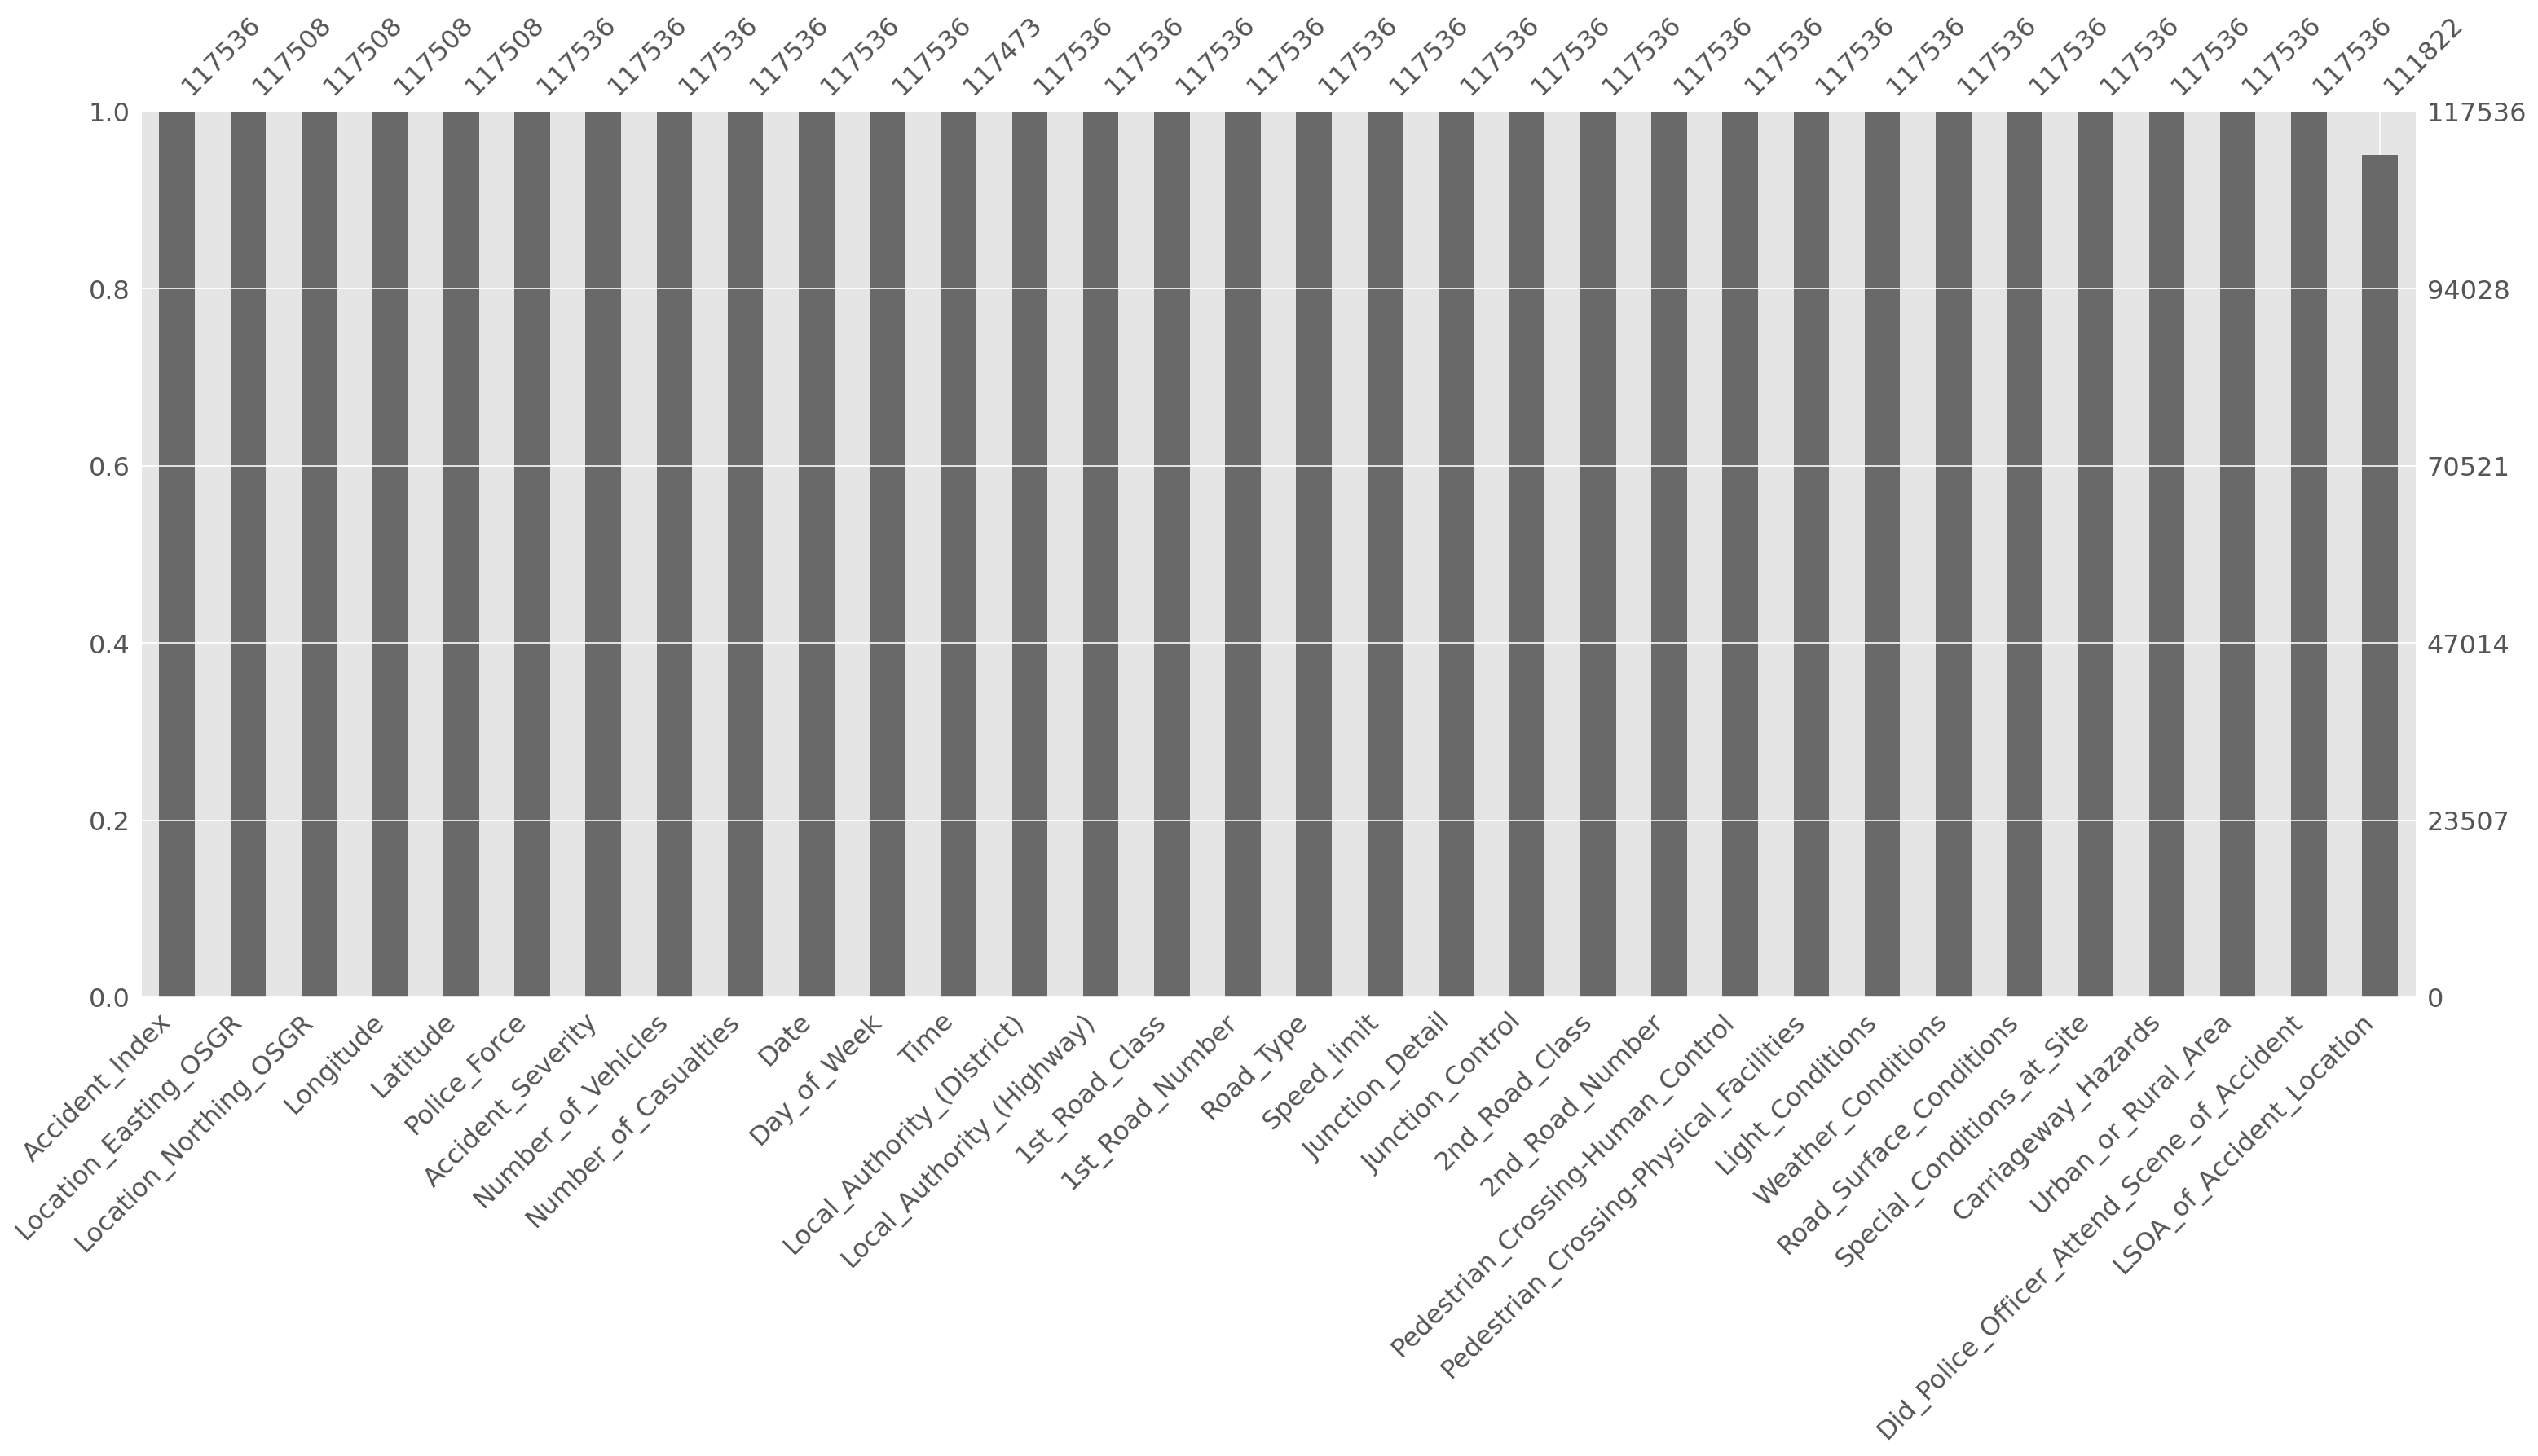

In [41]:
msno.bar(Accidents)
#visualizing missing data

In [42]:
Accidents[Accidents['Location_Easting_OSGR'].isnull()]
#calling out the null values in the column

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
27337   2019040854828                    NaN                     NaN   
29369   2019051910615                    NaN                     NaN   
30791   2019051912864                    NaN                     NaN   
34816   2019070003662                    NaN                     NaN   
35505   2019070275916                    NaN                     NaN   
36347   2019070700923                    NaN                     NaN   
39798   2019121900341                    NaN                     NaN   
39919   2019121900485                    NaN                     NaN   
39933   2019121900505                    NaN                     NaN   
40179   2019121900771                    NaN                     NaN   
40399   2019121901033                    NaN                     NaN   
40451   2019121901096                    NaN                     NaN   
40659   2019121901327                    NaN                     NaN   
40723   2019121901399                    NaN                     NaN   
40885   2019121901582                    NaN                     NaN   
40891   2019121901588                    NaN                     NaN   
40946   2019122000042                    NaN                     NaN   
40976   2019122000077                    NaN                     NaN   
41049   2019122000278                    NaN                     NaN   
42953   20191367G1635                    NaN                     NaN   
48320   2019160864733                    NaN                     NaN   
59724   2019230919173                    NaN                     NaN   
90918   2019460853756                    NaN                     NaN   
97271   2019471902378                    NaN                     NaN   
107114  2019551900980                    NaN                     NaN   
107755  201960X043729                    NaN                     NaN   
109965  2019621900922                    NaN                     NaN   
111821  201963D115219                    NaN                     NaN   

        Longitude  Latitude  Police_Force  Accident_Severity  \
27337         NaN       NaN             4                  3   
29369         NaN       NaN             5                  3   
30791         NaN       NaN             5                  2   
34816         NaN       NaN             7                  3   
35505         NaN       NaN             7                  3   
36347         NaN       NaN             7                  3   
39798         NaN       NaN            12                  2   
39919         NaN       NaN            12                  3   
39933         NaN       NaN            12                  3   
40179         NaN       NaN            12                  3   
40399         NaN       NaN            12                  3   
40451         NaN       NaN            12                  3   
40659         NaN       NaN            12                  3   
40723         NaN       NaN            12                  3   
40885         NaN       NaN            12                  3   
40891         NaN       NaN            12                  3   
40946         NaN       NaN            12                  3   
40976         NaN       NaN            12                  3   
41049         NaN       NaN            12                  3   
42953         NaN       NaN            13                  3   
48320         NaN       NaN            16                  3   
59724         NaN       NaN            23                  3   
90918         NaN       NaN            46                  2   
97271         NaN       NaN            47                  3   
107114        NaN       NaN            55                  3   
107755        NaN       NaN            60                  2   
109965        NaN       NaN            62                  3   
111821        NaN       NaN            63                  3   

        Number_of_Vehicles  Number_of_Casualties        Date 

In [43]:
# creating a function for cleaning the Accidents dataframe
def Accidents_new(Accidents):
  Accidents.interpolate(method ='ffill', limit_direction ='forward', inplace=True) 
  #accident.interpolate(method="polynomial", order=2, inplace=True)
  Accidents['Time'].fillna(method='backfill', axis=None,inplace=True)
  Accidents['Time'].replace('', None,method='ffill', inplace=True)
  Accidents['LSOA_of_Accident_Location'].fillna(method='ffill', axis=None,inplace=True)
  # converting the date and  into datetime format
  Accidents['Date'] = pd.to_datetime(Accidents['Date'], errors = 'coerce')
  Accidents['Time'] = pd.to_datetime(Accidents['Time']).dt.strftime('%H:%M')
  Accidents['Converted_Time'] = pd.DatetimeIndex(Accidents['Time'])
  Accidents['decimal_time'] = Accidents['Converted_Time'].dt.hour + Accidents['Converted_Time'].dt.minute/60
  return Accidents

In [44]:
AccidentS = Accidents_new(Accidents)

In [45]:
Accidents.isnull().sum()
#cross checking if the null values have been cleaned

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [46]:
Accidents.head()
#Inspecting the cleaned data

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2019010128300               528218.0                180407.0  -0.153842   
1  2019010152270               530219.0                172463.0  -0.127949   
2  2019010155191               530222.0                182543.0  -0.124193   
3  2019010155192               525531.0                184605.0  -0.191044   
4  2019010155194               524920.0                184004.0  -0.200064   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.508057             1                  3                   2   
1  51.436208             1                  3                   2   
2  51.526795             1                  3                   2   
3  51.546387             1                  2                   1   
4  51.541121             1                  3                   2   

   Number_of_Casualties       Date  ...  Light_Conditions Weather_Conditions  \
0                     3 2019-02-18  ...                 1                  1   
1                     1 2019-01-15  ...                 4                  1   
2                     1 2019-01-01  ...                 4                  1   
3                     1 2019-01-01  ...                 4                  1   
4                     2 2019-01-01  ...                 4                  1   

   Road_Surface_Conditions Special_Conditions_at_Site  Carriageway_Hazards  \
0                        1                          0                    0   
1                        1                          0                    0   
2                        1                          0                    0   
3                        1                          0                    0   
4                        1                          0                    0   

   Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
0                    1                                            3   
1                    1                                            3   
2                    1                                            1   
3                    1                                            1   
4                    1                                            1   

   LSOA_of_Accident_Location      Converted_Time  decimal_time  
0                  E01004762 2022-05-16 17:50:00     17.833333  
1                  E01003117 2022-05-16 21:45:00     21.750000  
2                  E01000943 2022-05-16 01:50:00      1.833333  
3                  E01000973 2022-05-16 01:20:00      1.333333  
4                  E01000546 2022-05-16 00:40:00      0.666667  

[5 rows x 34 columns]

#### Cleaning for Casualties

In [47]:
Casualties.isnull().sum()
#the Casualties dataset has no null values

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

<AxesSubplot:>

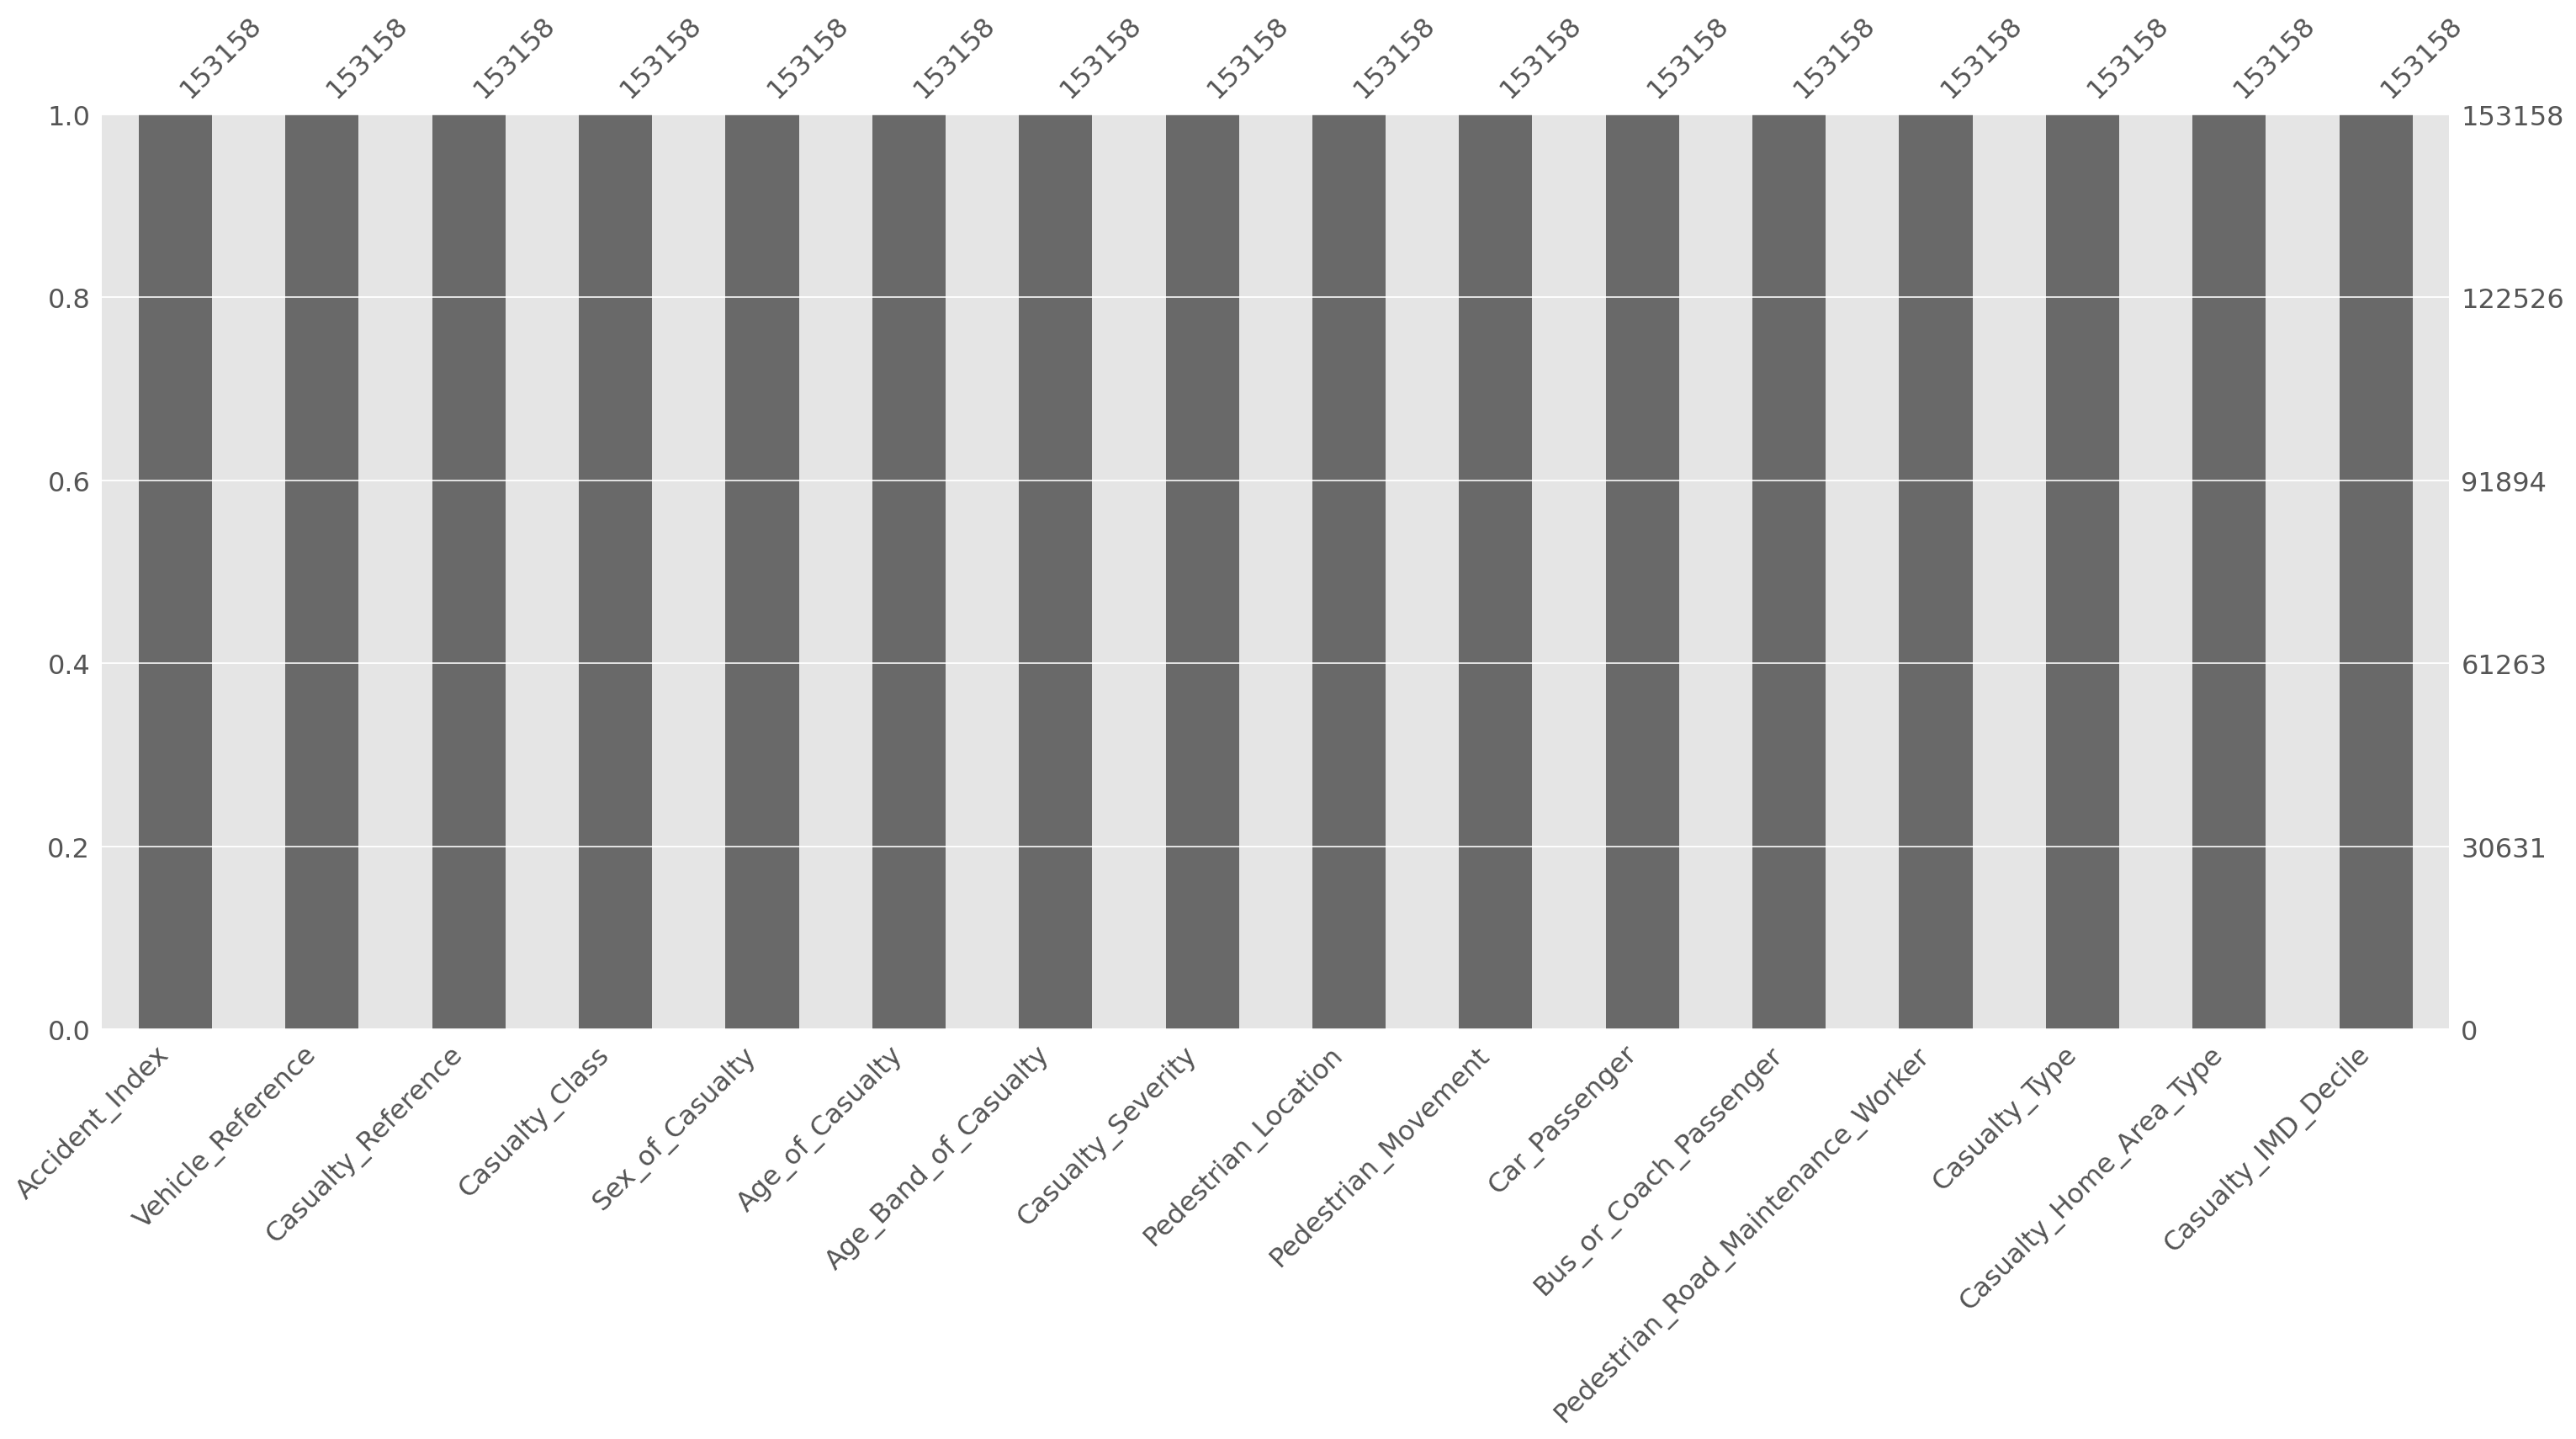

In [48]:
msno.bar(Casualties)

In [49]:
#Inspecting to know the gender spread in Casualties
Casualties['Sex_of_Casualty'].value_counts().head(50)
#the 'Sex_of_Casualty' column has a '-1' entry

 1    91265
 2    61160
-1      733
Name: Sex_of_Casualty, dtype: int64

In [50]:
#Inspecting for the anomally in the gender, there are -1 values this need to be cleaned
casualties_sex = Casualties[Casualties['Sex_of_Casualty']==-1]
casualties_sex

Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
383     2019010156414                  1                   2               2   
1742    2019010159930                  1                   2               2   
3745    2019010164961                  1                   3               2   
3746    2019010164961                  1                   4               2   
3747    2019010164961                  1                   5               2   
...               ...                ...                 ...             ...   
147990  2019950000422                  2                   2               1   
148048  2019950000472                  2                   1               1   
148221  2019950000635                  2                   2               1   
148308  2019950000712                  1                   1               3   
149055  2019950898057                  1                   1               1   

        Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  \
383                  -1                4                     1   
1742                 -1               -1                    -1   
3745                 -1               -1                    -1   
3746                 -1               -1                    -1   
3747                 -1               -1                    -1   
...                 ...              ...                   ...   
147990               -1               -1                    -1   
148048               -1               -1                    -1   
148221               -1               -1                    -1   
148308               -1               -1                    -1   
149055               -1               22                     5   

        Casualty_Severity  Pedestrian_Location  Pedestrian_Movement  \
383                     3                    0                    0   
1742                    3                    0                    0   
3745                    3                    0                    0   
3746                    3                    0                    0   
3747                    3                    0                    0   
...                   ...                  ...                  ...   
147990                  3                    0                    0   
148048                  3                    0                    0   
148221                  3                    0                    0   
148308                  3                    7                    9   
149055                  3                    0                    0   

        Car_Passenger  Bus_or_Coach_Passenger  \
383                 2                       0   
1742                1                       0   
3745               -1                       0   
3746               -1                       0   
3747               -1                       0   
...               ...                     ...   
147990              0                       0   
148048              0                       0   
148221              0                       0   
148308              0                       0   
149055              0                       0   

        Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
383                                      0              9   
1742                                     0              9   
3745                                     0              9   
3746                                     0              9   
3747                                     0              9   
...                                    ...            ...   
147990                                   0              9   
148048                                   0              9   
148221                                   0             19   
148308                                   0              0   
149055                                   0              1   

        Casualty_Home_Area_Type  Casualty_IMD_Decile  
383                    

#### Cleaning of Casualties Dataset

In [51]:
#cleaning of the dataset
def Casualties_new(Casualties):
  Casualties['Sex_of_Casualty'].replace(-1,Casualties['Sex_of_Casualty'].median(), inplace = True)
  Casualties['Age_of_Casualty'].replace(-1,Casualties['Age_of_Casualty'].median(), inplace=True)
  Casualties['Age_Band_of_Casualty'].replace(-1,Casualties['Age_Band_of_Casualty'].median(), inplace=True)
  Casualties['Pedestrian_Location'].replace(-1,0, inplace=True)
  Casualties['Pedestrian_Movement'].replace(-1,0, inplace=True)
  Casualties['Car_Passenger'].replace(-1,0, inplace=True)
  Casualties['Bus_or_Coach_Passenger'].replace(-1,0, inplace=True)
  Casualties['Pedestrian_Road_Maintenance_Worker'].replace(-1,0, inplace=True)
  Casualties['Casualty_Home_Area_Type'].replace(-1,0, inplace=True)
  Casualties['Casualty_IMD_Decile'].replace(-1,0, inplace=True)
  return Casualties

In [52]:
Casualties = Casualties_new(Casualties)

In [53]:
Casualties['Sex_of_Casualty'].value_counts()

1    91998
2    61160
Name: Sex_of_Casualty, dtype: int64

In [54]:
#Cross checking if all -1 values are gone
Casualties[Casualties['Age_of_Casualty']==-1]


Empty DataFrame
Columns: [Accident_Index, Vehicle_Reference, Casualty_Reference, Casualty_Class, Sex_of_Casualty, Age_of_Casualty, Age_Band_of_Casualty, Casualty_Severity, Pedestrian_Location, Pedestrian_Movement, Car_Passenger, Bus_or_Coach_Passenger, Pedestrian_Road_Maintenance_Worker, Casualty_Type, Casualty_Home_Area_Type, Casualty_IMD_Decile]
Index: []

#### Vehicles cleaning

<AxesSubplot:>

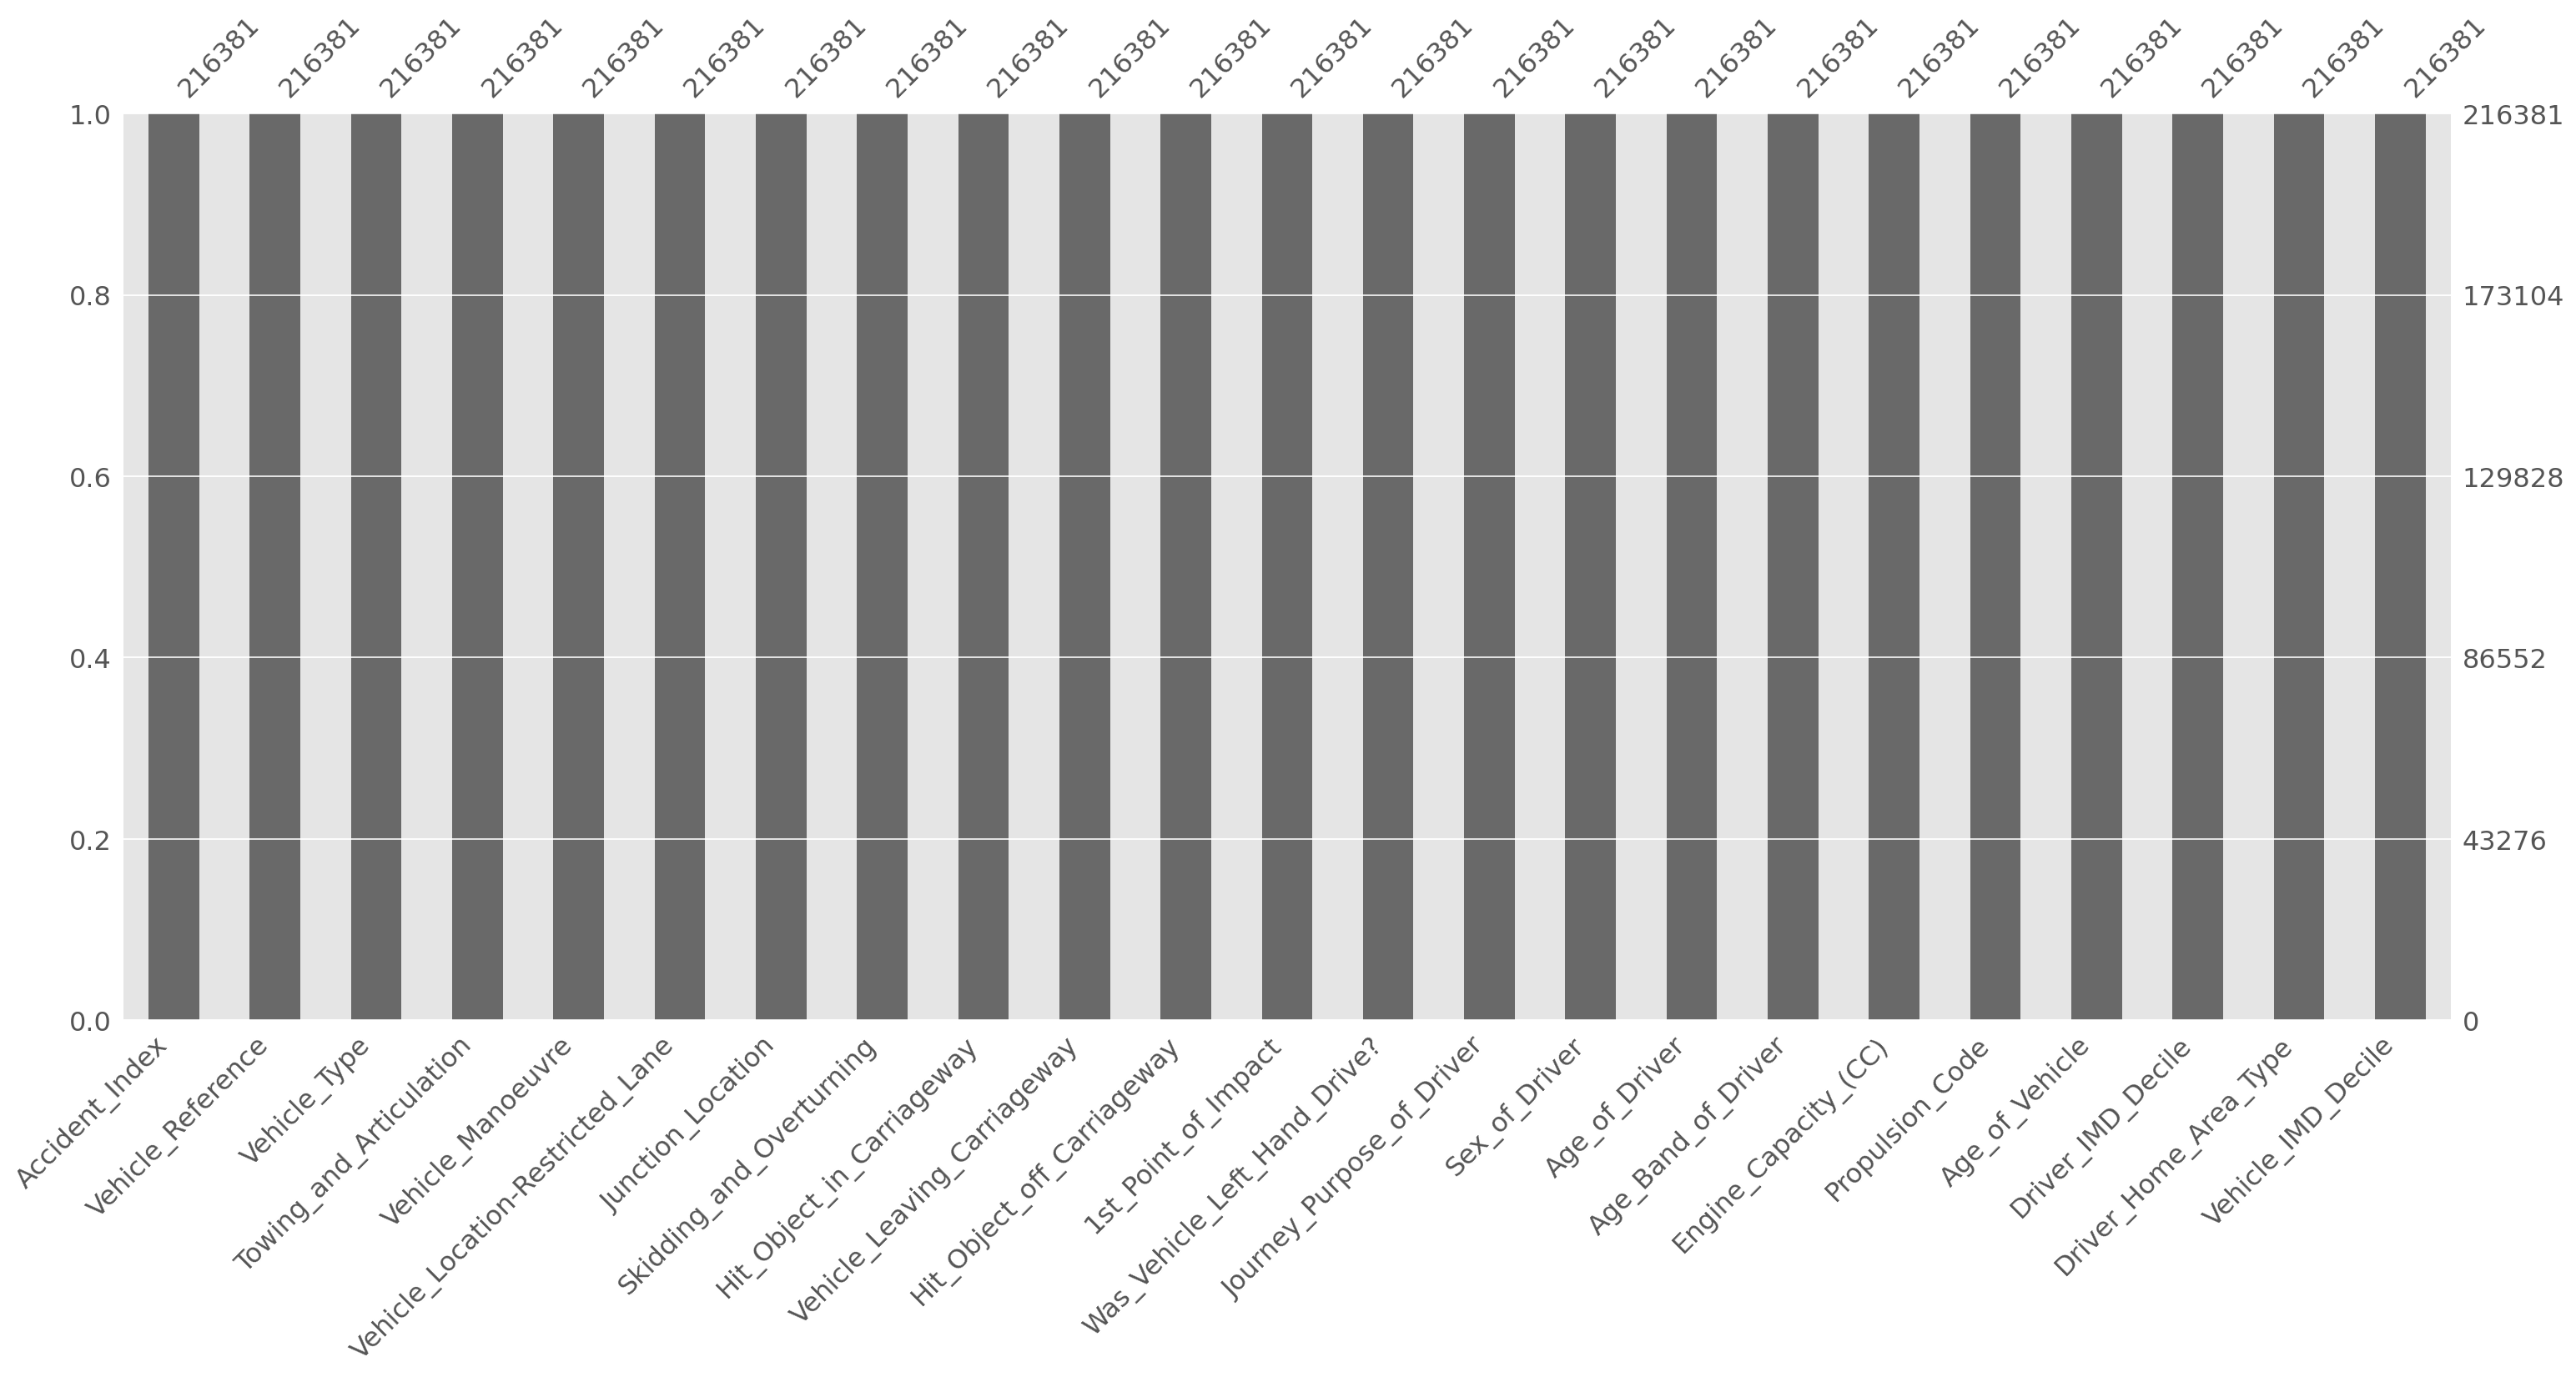

In [55]:
msno.bar(Vehicles)
#inspecting the Vehicles dataset for missing values

In [56]:
Vehicles[Vehicles['Age_of_Vehicle']==-1]
#though the dataset has no missing values but it is full of -1, this needs to be cleaned

Accident_Index  Vehicle_Reference  Vehicle_Type  \
0       2019010128300                  1             9   
1       2019010128300                  2             9   
2       2019010152270                  1             9   
3       2019010152270                  2             9   
4       2019010155191                  1             9   
...               ...                ...           ...   
216339  2019984101719                  2            21   
216354  2019984105419                  1             9   
216360  2019984105619                  3             9   
216366  2019984106619                  1             9   
216369  2019984106819                  1             9   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
0                             0                 -1   
1                             0                 -1   
2                             0                 18   
3                             0                 18   
4                             0                  3   
...                         ...                ...   
216339                        1                 18   
216354                        0                  5   
216360                        0                 18   
216366                        0                 18   
216369                        0                 18   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
0                                     -1                 -1   
1                                     -1                 -1   
2                                     -1                  0   
3                                     -1                  0   
4                                      0                  1   
...                                  ...                ...   
216339                                 0                  0   
216354                                 0                  1   
216360                                 0                  0   
216366                                 0                  0   
216369                                 0                  0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                             -1                         -1   
1                             -1                         -1   
2                             -1                         -1   
3                             -1                         -1   
4                              0                          0   
...                          ...                        ...   
216339                         0                          0   
216354                         0                          0   
216360                         0                          0   
216366                         0                          0   
216369                         5                          0   

        Vehicle_Leaving_Carriageway  ...  Journey_Purpose_of_Driver  \
0                                -1  ...                          6   
1                                -1  ...                          6   
2                                -1  ...                          6   
3                                -1  ...                          6   
4                                 0  ...                          6   
...                             ...  ...                        ...   
216339                            0  ...                          1   
216354                            0  ...                          4   
216360                            0  ...                          6   
216366                            0  ...                          5   
216369                            5  ...                          1   

        Sex_of_Driver  Age_of_Driver  Age_Band_of_Driver  \
0                   1             58                   9   
1                   3             -1                  -1   
2                   2             24                   5   
3                   3             -1                  

In [57]:
#setting functions to clean the dataset
def Vehicles_new(Vehicles):
  Vehicles['Vehicle_Type'].replace(-1, round(Vehicles['Vehicle_Type'].median()), inplace=True)
  Vehicles['Towing_and_Articulation'].replace(-1, round(Vehicles['Towing_and_Articulation'].median()), inplace=True) 
  Vehicles['Vehicle_Manoeuvre'].replace(-1, round(Vehicles['Vehicle_Manoeuvre'].mean()), inplace=True)
  Vehicles['Vehicle_Location-Restricted_Lane'].replace(-1, 0, inplace=True)
  Vehicles['Junction_Location'].replace(-1, 0, inplace=True)
  Vehicles['Skidding_and_Overturning'].replace(-1, 0, inplace=True)
  Vehicles['Hit_Object_in_Carriageway'].replace(-1, 0, inplace=True) 
  Vehicles['Vehicle_Leaving_Carriageway'].replace(-1, 0, inplace=True)
  Vehicles['Hit_Object_off_Carriageway'].replace(-1, 0, inplace=True)   
  Vehicles['1st_Point_of_Impact'].replace(-1, round(Vehicles['1st_Point_of_Impact'].median()), inplace=True)
  Vehicles['Was_Vehicle_Left_Hand_Drive?'].replace(-1, round(Vehicles['Was_Vehicle_Left_Hand_Drive?'].median()), inplace=True)
  Vehicles['Journey_Purpose_of_Driver'].replace(-1, round(Vehicles['Journey_Purpose_of_Driver'].median()), inplace=True)
  Vehicles['Age_of_Driver'].replace(-1, round(Vehicles['Age_of_Driver'].mean()), inplace=True)
  underage_drive = Vehicles[Vehicles['Age_of_Driver']<16]['Age_of_Driver']
  for a,b in underage_drive.items():
    if b<16:
      Vehicles.iloc[a]['Age_of_Driver']= Vehicles['Age_of_Driver'].replace(b,round(Vehicles['Age_of_Driver'].mean()), inplace=True)
  
  Vehicles['Age_Band_of_Driver'].replace(-1, round(Vehicles['Age_Band_of_Driver'].mean()), inplace=True)
  Vehicles['Engine_Capacity_(CC)'].replace(-1, None,method='bfill', inplace=True)
  Vehicles['Propulsion_Code'].replace(-1, round(Vehicles['Propulsion_Code'].mean()), inplace=True)
  Vehicles['Age_of_Vehicle'].replace(-1, None,method='bfill', inplace=True)
  Vehicles['Driver_IMD_Decile'].replace(-1, None,method='bfill', inplace=True)
  Vehicles['Driver_Home_Area_Type'].replace(-1, None,method='bfill', inplace=True)
  Vehicles['Vehicle_IMD_Decile'].replace(-1, round(Vehicles['Vehicle_IMD_Decile'].mean()), inplace=True)
  return Vehicles

In [58]:
Vehicles = Vehicles_new(Vehicles)

#### Checking if the -1 has been cleaned

In [59]:
Vehicles['Towing_and_Articulation'].unique()

array([0, 4, 1, 5, 3, 2], dtype=int64)

In [60]:
Vehicles['Vehicle_Manoeuvre'].unique()

array([12, 18,  3,  4,  7,  5,  2,  9, 13,  6, 17, 14, 15,  1, 11, 10,  8,
       16], dtype=int64)

In [61]:
Vehicles['Vehicle_Location-Restricted_Lane'].unique()

array([0, 6, 2, 9, 4, 5, 3, 8, 7, 1], dtype=int64)

In [62]:
Vehicles[Vehicles['Engine_Capacity_(CC)']==-1]
#finally the -1 has been cleared

Empty DataFrame
Columns: [Accident_Index, Vehicle_Reference, Vehicle_Type, Towing_and_Articulation, Vehicle_Manoeuvre, Vehicle_Location-Restricted_Lane, Junction_Location, Skidding_and_Overturning, Hit_Object_in_Carriageway, Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, 1st_Point_of_Impact, Was_Vehicle_Left_Hand_Drive?, Journey_Purpose_of_Driver, Sex_of_Driver, Age_of_Driver, Age_Band_of_Driver, Engine_Capacity_(CC), Propulsion_Code, Age_of_Vehicle, Driver_IMD_Decile, Driver_Home_Area_Type, Vehicle_IMD_Decile]
Index: []

[0 rows x 23 columns]

In [63]:
Accidents['East_North_OSGR'] = Accidents['Location_Easting_OSGR'] + Accidents['Location_Northing_OSGR']

In [64]:
Accidents['East_North_OSGR'].value_counts()
#getting the total count of OSGR

714130.0    7
711105.0    7
716940.0    7
658245.0    7
713443.0    7
           ..
936455.0    1
957857.0    1
962368.0    1
919705.0    1
920751.0    1
Name: East_North_OSGR, Length: 97895, dtype: int64

In [65]:
# inspecting categories with a for loop
for column in Accidents.columns:
    if len(list(Accidents[column].unique())) < 15:
        print(column)
        print(Accidents[column].value_counts())
        print('***************************************')

Accident_Severity
3    92456
2    23422
1     1658
Name: Accident_Severity, dtype: int64
***************************************
Day_of_Week
6    19056
5    17973
4    17775
3    17598
2    16643
7    15556
1    12935
Name: Day_of_Week, dtype: int64
***************************************
1st_Road_Class
3    52342
6    40459
4    14538
5     6067
1     3810
2      320
Name: 1st_Road_Class, dtype: int64
***************************************
Road_Type
6    85320
3    18590
1     6880
2     2664
9     2143
7     1939
Name: Road_Type, dtype: int64
***************************************
Speed_limit
 30    69305
 60    14514
 20    11747
 40    10021
 70     7153
 50     4716
-1        80
Name: Speed_limit, dtype: int64
***************************************
Junction_Detail
 0    48993
 3    33660
 6    11221
 1     9183
 9     5666
 8     2722
 2     1664
 5     1551
 7     1479
-1     1397
Name: Junction_Detail, dtype: int64
***************************************
Junction_Control
-1  

In [66]:
#pip install xlrd

In [67]:
# Loading all the lookup sheets per feature in all the three datasets (Accident, Vehicle, Casualties)

Var_lookup = pd.read_excel('variable lookup.xls', sheet_name=None)

In [68]:
Var_lookup

{'Introduction':                                            Data Guide
 0                      Road Accidents and Safety Data
 1                                                 NaN
 2                                                 NaN
 3   The data is supplied in comma separated ASCII ...
 4                                                 NaN
 5   The ACC_Index field give a unique index for ea...
 6                                                 NaN
 7   This data guide lists the value labels and for...
 8                                                 NaN
 9   The value “-1” is exported for NULL or out of ...
 10                                                NaN
 11  The Longitude and Latitude data is based on WG...,
 'Export Variables':                                             VARIABLES  \
 0                                                 NaN   
 1                              Accident Circumstances   
 2                                      Accident Index   
 3              

In [69]:
Var_lookup.keys()

dict_keys(['Introduction', 'Export Variables', 'Police Force', 'Accident Severity', 'Day of Week', 'Local Authority (District)', 'Local Authority (Highway)', '1st Road Class', 'Road Type', 'Speed Limit', 'Junction Detail', 'Junction Control', '2nd Road Class', 'Ped Cross - Human', 'Ped Cross - Physical', 'Light Conditions', 'Weather', 'Road Surface', 'Special Conditions at Site', 'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend', 'Vehicle Type', 'Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location', 'Junction Location', 'Skidding and Overturning', 'Hit Object in Carriageway', 'Veh Leaving Carriageway', 'Hit Object Off Carriageway', '1st Point of Impact', 'Was Vehicle Left Hand Drive', 'Journey Purpose', 'Sex of Driver', 'Age Band', 'Vehicle Propulsion Code', 'Casualty Class', 'Sex of Casualty', 'Age of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', '

In [70]:
type(Var_lookup['Police Force'])

pandas.core.frame.DataFrame

In [71]:
Var_lookup['Police Force']

code                  label
0      1    Metropolitan Police
1      3                Cumbria
2      4             Lancashire
3      5             Merseyside
4      6     Greater Manchester
5      7               Cheshire
6     10            Northumbria
7     11                 Durham
8     12        North Yorkshire
9     13         West Yorkshire
10    14        South Yorkshire
11    16             Humberside
12    17              Cleveland
13    20          West Midlands
14    21          Staffordshire
15    22            West Mercia
16    23           Warwickshire
17    30             Derbyshire
18    31        Nottinghamshire
19    32           Lincolnshire
20    33         Leicestershire
21    34       Northamptonshire
22    35         Cambridgeshire
23    36                Norfolk
24    37                Suffolk
25    40           Bedfordshire
26    41          Hertfordshire
27    42                  Essex
28    43          Thames Valley
29    44              Hampshire
30    45                 Surrey
31    46                   Kent
32    47                 Sussex
33    48         City of London
34    50     Devon and Cornwall
35    52      Avon and Somerset
36    53        Gloucestershire
37    54              Wiltshire
38    55                 Dorset
39    60            North Wales
40    61                  Gwent
41    62            South Wales
42    63            Dyfed-Powys
43    91               Northern
44    92               Grampian
45    93                Tayside
46    94                   Fife
47    95    Lothian and Borders
48    96                Central
49    97            Strathclyde
50    98  Dumfries and Galloway

In [72]:
len(Var_lookup.keys())

49

In [73]:
# checking to see if our sheets have same naming pattern
for key in Var_lookup.keys():
    print(Var_lookup[key].columns)

Index(['Data Guide'], dtype='object')
Index(['VARIABLES', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['Code', 'Label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='obje

In [74]:
for column in Accidents.columns:
    if column.lower().replace('_', ' ') in list(
        [each_key.lower() for each_key in Var_lookup.keys()]):
        print(column)

Police_Force
Accident_Severity
Day_of_Week
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
Road_Type
Speed_limit
Junction_Detail
Junction_Control
2nd_Road_Class
Light_Conditions
Special_Conditions_at_Site
Carriageway_Hazards


In [75]:
list(Var_lookup.keys())

['Introduction',
 'Export Variables',
 'Police Force',
 'Accident Severity',
 'Day of Week',
 'Local Authority (District)',
 'Local Authority (Highway)',
 '1st Road Class',
 'Road Type',
 'Speed Limit',
 'Junction Detail',
 'Junction Control',
 '2nd Road Class',
 'Ped Cross - Human',
 'Ped Cross - Physical',
 'Light Conditions',
 'Weather',
 'Road Surface',
 'Special Conditions at Site',
 'Carriageway Hazards',
 'Urban Rural',
 'Police Officer Attend',
 'Vehicle Type',
 'Towing and Articulation',
 'Vehicle Manoeuvre',
 'Vehicle Location',
 'Junction Location',
 'Skidding and Overturning',
 'Hit Object in Carriageway',
 'Veh Leaving Carriageway',
 'Hit Object Off Carriageway',
 '1st Point of Impact',
 'Was Vehicle Left Hand Drive',
 'Journey Purpose',
 'Sex of Driver',
 'Age Band',
 'Vehicle Propulsion Code',
 'Casualty Class',
 'Sex of Casualty',
 'Age of Casualty',
 'Casualty Severity',
 'Ped Location',
 'Ped Movement',
 'Car Passenger',
 'Bus Passenger',
 'Ped Road Maintenance Worker

## Category Mapping

In [76]:
def create_dict(df_Var_look_up):
    ''' To generate a dictionary in the format {code : label}'''
    temp_dict = {}
    # Since Local_Authority_(Highway) has Sentence Case -_-
    df_Var_look_up.columns = [
        each_col.lower() for each_col in df_Var_look_up.columns
    ]
    for each1, each2 in zip(df_Var_look_up['code'], df_Var_look_up['label']):
        temp_dict[each1] = each2
    return temp_dict

In [77]:
%%time

#: Dataframe for all accidents in the UK in 2019
for column in Accidents.columns:
    for sheet in list(Var_lookup.keys()):
        if column.lower().replace('_', ' ') == sheet.lower():
            print(column)
            print(sheet)
            Accidents[column] = Accidents[column].map(
                create_dict(Var_lookup[sheet]), na_action='ignore')
            break

Police_Force
Police Force
Accident_Severity
Accident Severity
Day_of_Week
Day of Week
Local_Authority_(District)
Local Authority (District)
Local_Authority_(Highway)
Local Authority (Highway)
1st_Road_Class
1st Road Class
Road_Type
Road Type
Speed_limit
Speed Limit
Junction_Detail
Junction Detail
Junction_Control
Junction Control
2nd_Road_Class
2nd Road Class
Light_Conditions
Light Conditions
Special_Conditions_at_Site
Special Conditions at Site
Carriageway_Hazards
Carriageway Hazards
CPU times: total: 141 ms
Wall time: 148 ms


In [78]:
Accidents.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2019010128300               528218.0                180407.0  -0.153842   
1  2019010152270               530219.0                172463.0  -0.127949   
2  2019010155191               530222.0                182543.0  -0.124193   
3  2019010155192               525531.0                184605.0  -0.191044   
4  2019010155194               524920.0                184004.0  -0.200064   

    Latitude         Police_Force Accident_Severity  Number_of_Vehicles  \
0  51.508057  Metropolitan Police            Slight                   2   
1  51.436208  Metropolitan Police            Slight                   2   
2  51.526795  Metropolitan Police            Slight                   2   
3  51.546387  Metropolitan Police           Serious                   1   
4  51.541121  Metropolitan Police            Slight                   2   

   Number_of_Casualties       Date  ... Weather_Conditions  \
0                     3 2019-02-18  ...                  1   
1                     1 2019-01-15  ...                  1   
2                     1 2019-01-01  ...                  1   
3                     1 2019-01-01  ...                  1   
4                     2 2019-01-01  ...                  1   

  Road_Surface_Conditions Special_Conditions_at_Site Carriageway_Hazards  \
0                       1                       None                None   
1                       1                       None                None   
2                       1                       None                None   
3                       1                       None                None   
4                       1                       None                None   

  Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
0                   1                                            3   
1                   1                                            3   
2                   1                                            1   
3                   1                                            1   
4                   1                                            1   

  LSOA_of_Accident_Location      Converted_Time decimal_time East_North_OSGR  
0                 E01004762 2022-05-16 17:50:00    17.833333        708625.0  
1                 E01003117 2022-05-16 21:45:00    21.750000        702682.0  
2                 E01000943 2022-05-16 01:50:00     1.833333        712765.0  
3                 E01000973 2022-05-16 01:20:00     1.333333        710136.0  
4                 E01000546 2022-05-16 00:40:00     0.666667        708924.0  

[5 rows x 35 columns]

## Visualizations

### Accident Severity vs Number of Casualties

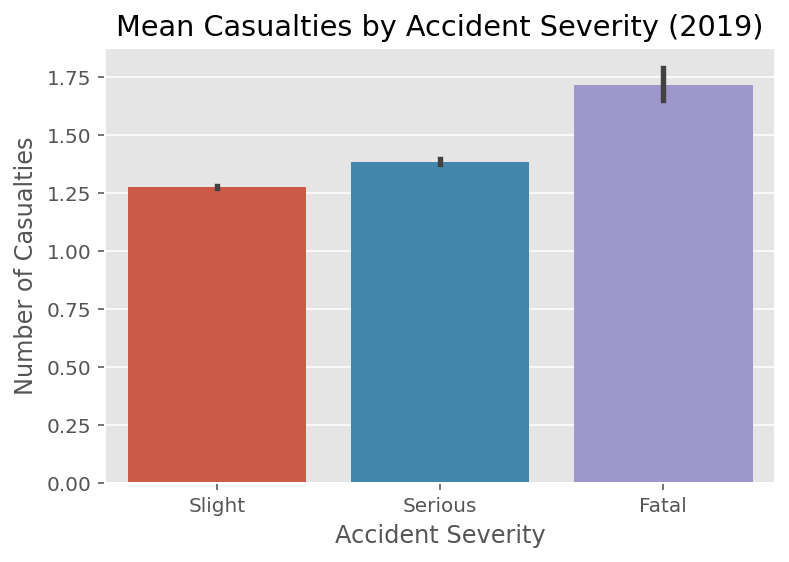

In [79]:
sns.barplot(x='Accident_Severity',
            y='Number_of_Casualties',
            data=Accidents,
            estimator=np.mean)
plt.title("Mean Casualties by Accident Severity (2019)")
plt.ylabel("Number of Casualties")
plt.xlabel("Accident Severity")
plt.show()

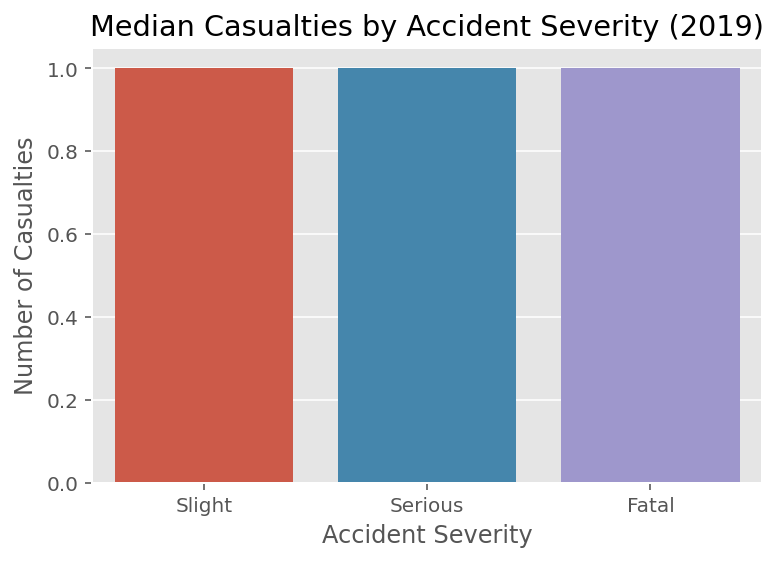

In [80]:
sns.barplot(x='Accident_Severity',
            y='Number_of_Casualties',
            data=Accidents,
            estimator=np.median)
plt.title("Median Casualties by Accident Severity (2019)")
plt.ylabel("Number of Casualties")
plt.xlabel("Accident Severity")
plt.show()

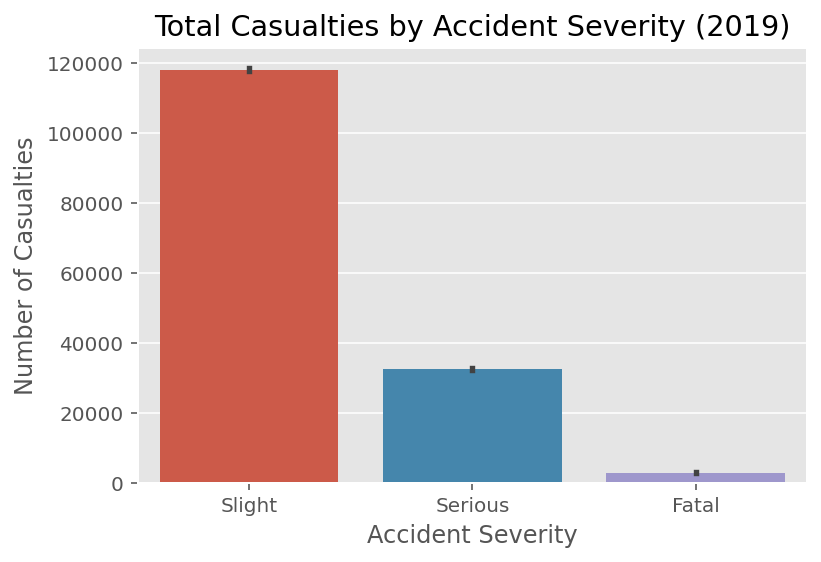

In [81]:
sns.barplot(x='Accident_Severity',
            y='Number_of_Casualties',
            data=Accidents,
            estimator=np.sum)
plt.title("Total Casualties by Accident Severity (2019)")
plt.ylabel("Number of Casualties")
plt.xlabel("Accident Severity")
plt.show()

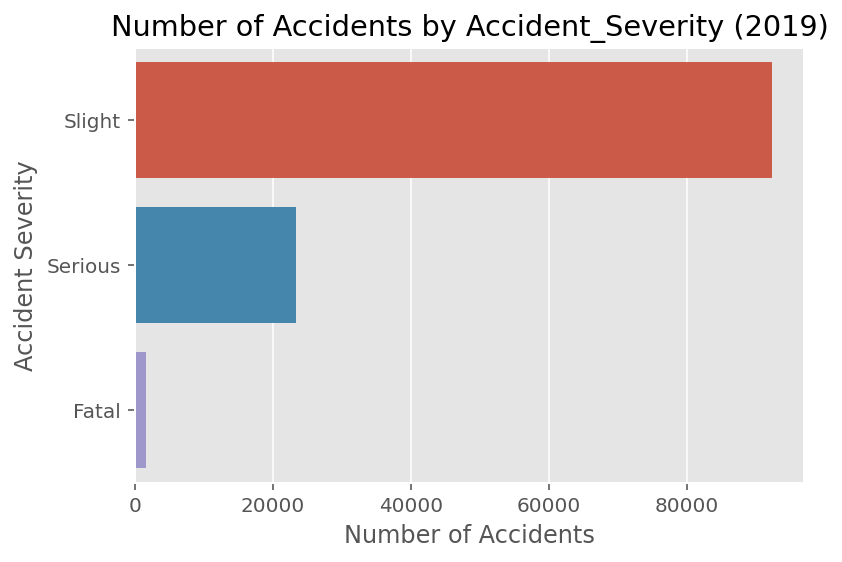

In [82]:
sns.countplot(y='Accident_Severity', data=Accidents)
plt.title('Number of Accidents by Accident_Severity (2019)', color='black')
plt.xlabel("Number of Accidents")
plt.ylabel("Accident Severity")
plt.show()

In [83]:
Accidents['Accident_Severity'].value_counts() * 100/len(Accidents
                                                       )
#calculating the percentage of severity of accidents

Slight     78.661857
Serious    19.927512
Fatal       1.410632
Name: Accident_Severity, dtype: float64

In [84]:
Accidents['Number_of_Casualties'].sum()

153158

In [85]:
Accidents.groupby(['Accident_Severity'])['Number_of_Casualties'].sum() * 100/ Accidents['Number_of_Casualties'].sum()

Accident_Severity
Fatal       1.855600
Serious    21.148095
Slight     76.996304
Name: Number_of_Casualties, dtype: float64

##### (a)	Are there significant hours of the day, and days of the week, on which accidents occur?

In [86]:
#Sorting day of the week according to the accident index
Accidents.groupby('Day_of_Week')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index')

Day_of_Week  Accident_Index
3      Sunday           12935
2    Saturday           15556
1      Monday           16643
5     Tuesday           17598
6   Wednesday           17775
4    Thursday           17973
0      Friday           19056

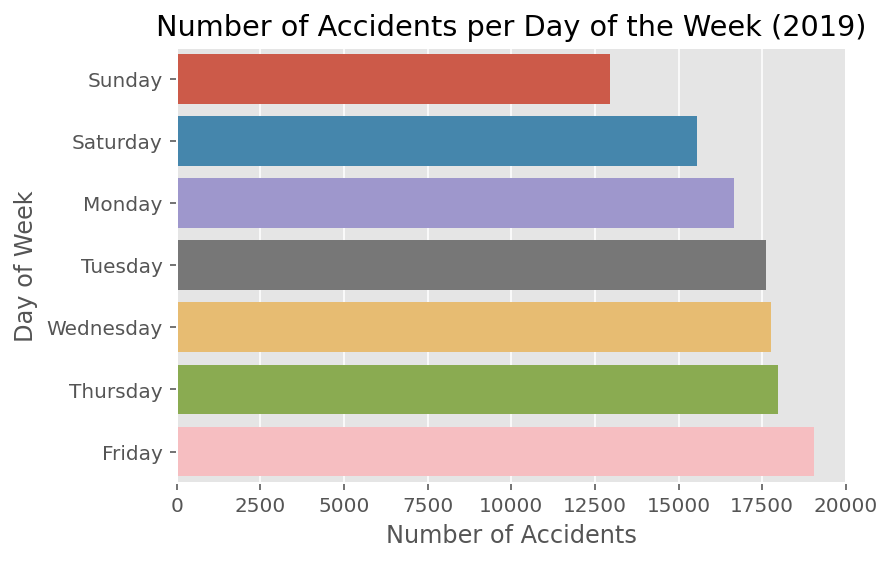

In [87]:
sns.barplot(x='Accident_Index', y='Day_of_Week', data=Accidents.groupby('Day_of_Week')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index'))
plt.title("Number of Accidents per Day of the Week (2019)")
plt.ylabel("Day of Week")
plt.xlabel("Number of Accidents")
plt.show()

### Accident by Time of the Day

In [88]:
#Creating a radian map for time
def get_radian(x):
    h,m = map(int,x)
    return 2 * np.pi * (h + m/60)/24

In [89]:
#creating a group dataframe 
grouped_df = Accidents[-Accidents['Time'].isna()].groupby('Time')['Number_of_Casualties'].sum().reset_index()

In [90]:
grouped_df.head()

Time  Number_of_Casualties
0  00:01                   212
1  00:02                    28
2  00:03                    44
3  00:04                    44
4  00:05                    95

In [91]:
time_series = grouped_df['Time'].str.split(':')
time_series = time_series.apply(get_radian)
time_series.head()

0    0.004363
1    0.008727
2    0.013090
3    0.017453
4    0.021817
Name: Time, dtype: float64

In [92]:

# Method to run this viz for other columns


def plot_by_time_of_the_day(df, time_col_name, plot_col_name, plot_title=None):
    """
    Radial plot by time.

    df: grouped dataframe
    time_col_name: name of the time column in format HH:MM
    plot_col_name: name of the column that contains estimated counts per time instance
    plot_title: title of the plot
    """
    fig = plt.figure(figsize=(7, 7))
    time_series = df[time_col_name].str.split(':')
    time_series = time_series.apply(get_radian)
    ax = plt.subplot(111, projection='polar')
    ax.bar(time_series, df[plot_col_name], width=0.1, alpha=0.3, color='red')

    # clockwise labels
    ax.set_theta_direction(-1)

    # place Zero at 12AM
    ax.set_theta_offset(np.pi / 2)

    # set circumference ticks
    ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))

    # set the label names
    ticks = [
        '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM',
        '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM',
        '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'
    ]
    ax.set_xticklabels(ticks)

    # suppress the radial labels
    plt.setp(ax.get_yticklabels(), visible=False)

    # Radius
    plt.ylim(0, max(df[plot_col_name]))

    plt.title(plot_title, pad=30)

    plt.show()

<Figure size 504x504 with 0 Axes>

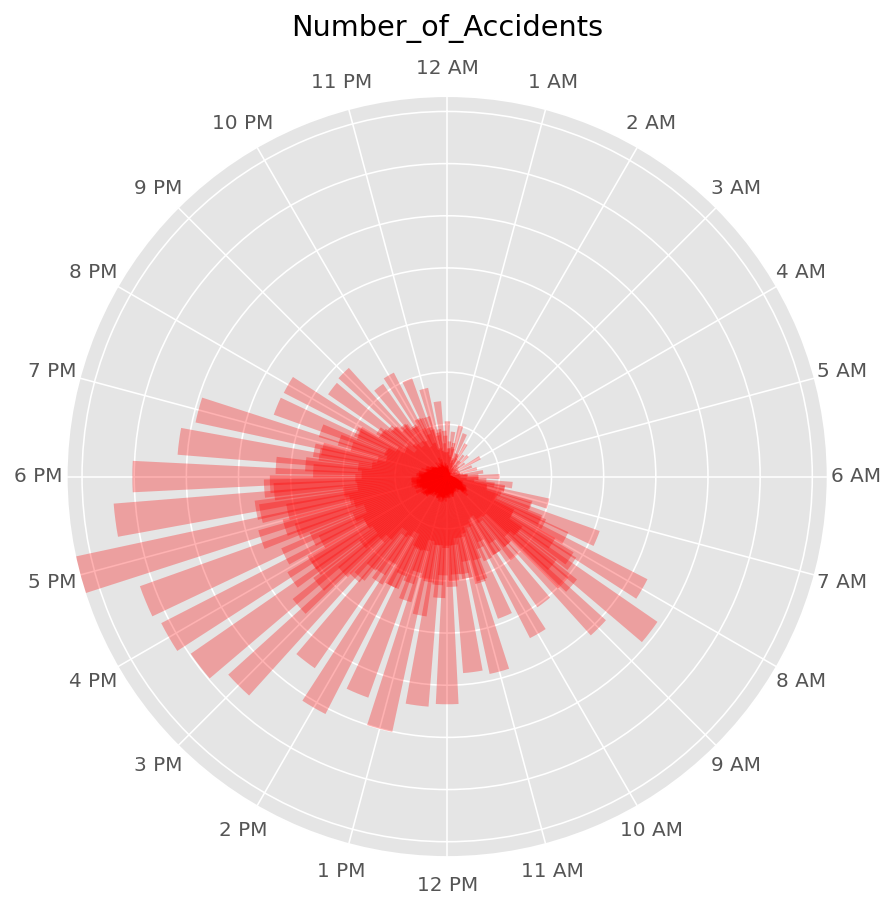

In [93]:
# plotting accidents and the time of occurence

grouped_df = Accidents[-Accidents['Time'].isna(
)].groupby('Time')['Number_of_Casualties'].sum().reset_index()
fig = plt.figure(figsize=(7, 7))
plot_by_time_of_the_day(grouped_df, 'Time', 'Number_of_Casualties',
                        'Number_of_Accidents')

#### (b) For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?

In [94]:
#Merging accident dataframe with vehicles dataframe to get the relevant information on motorbikes
Motorbikes = Accidents.merge(Vehicles,on='Accident_Index',how='right')

In [95]:
#Inspecting the columns of the motorbike df
Motorbikes.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Converted_Time', 'decimal_time',
       'East_North_OSGR', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Lo

In [96]:
#labelling motobikes accident according to the days 
Motorbikes = Motorbikes[(Motorbikes.Vehicle_Type == 2)  | (Motorbikes.Vehicle_Type == 3)|
                        (Motorbikes.Vehicle_Type == 4)  | (Motorbikes.Vehicle_Type ==5 )|
                    (Motorbikes.Vehicle_Type == 23) | (Motorbikes.Vehicle_Type == 97)]
                         
    
Motorbikes["Day_of_Week"] = Motorbikes["Day_of_Week"].replace({1: 'Sunday', 
                                                   2: 'Monday', 
                                                   3: 'Tuesday',
                                                   4: 'Wednesday',
                                                   5: 'Thurstday',
                                                   6: 'Friday',
                                                   7: 'Saturday'})

In [97]:
Motorbikes.dropna(inplace=True)

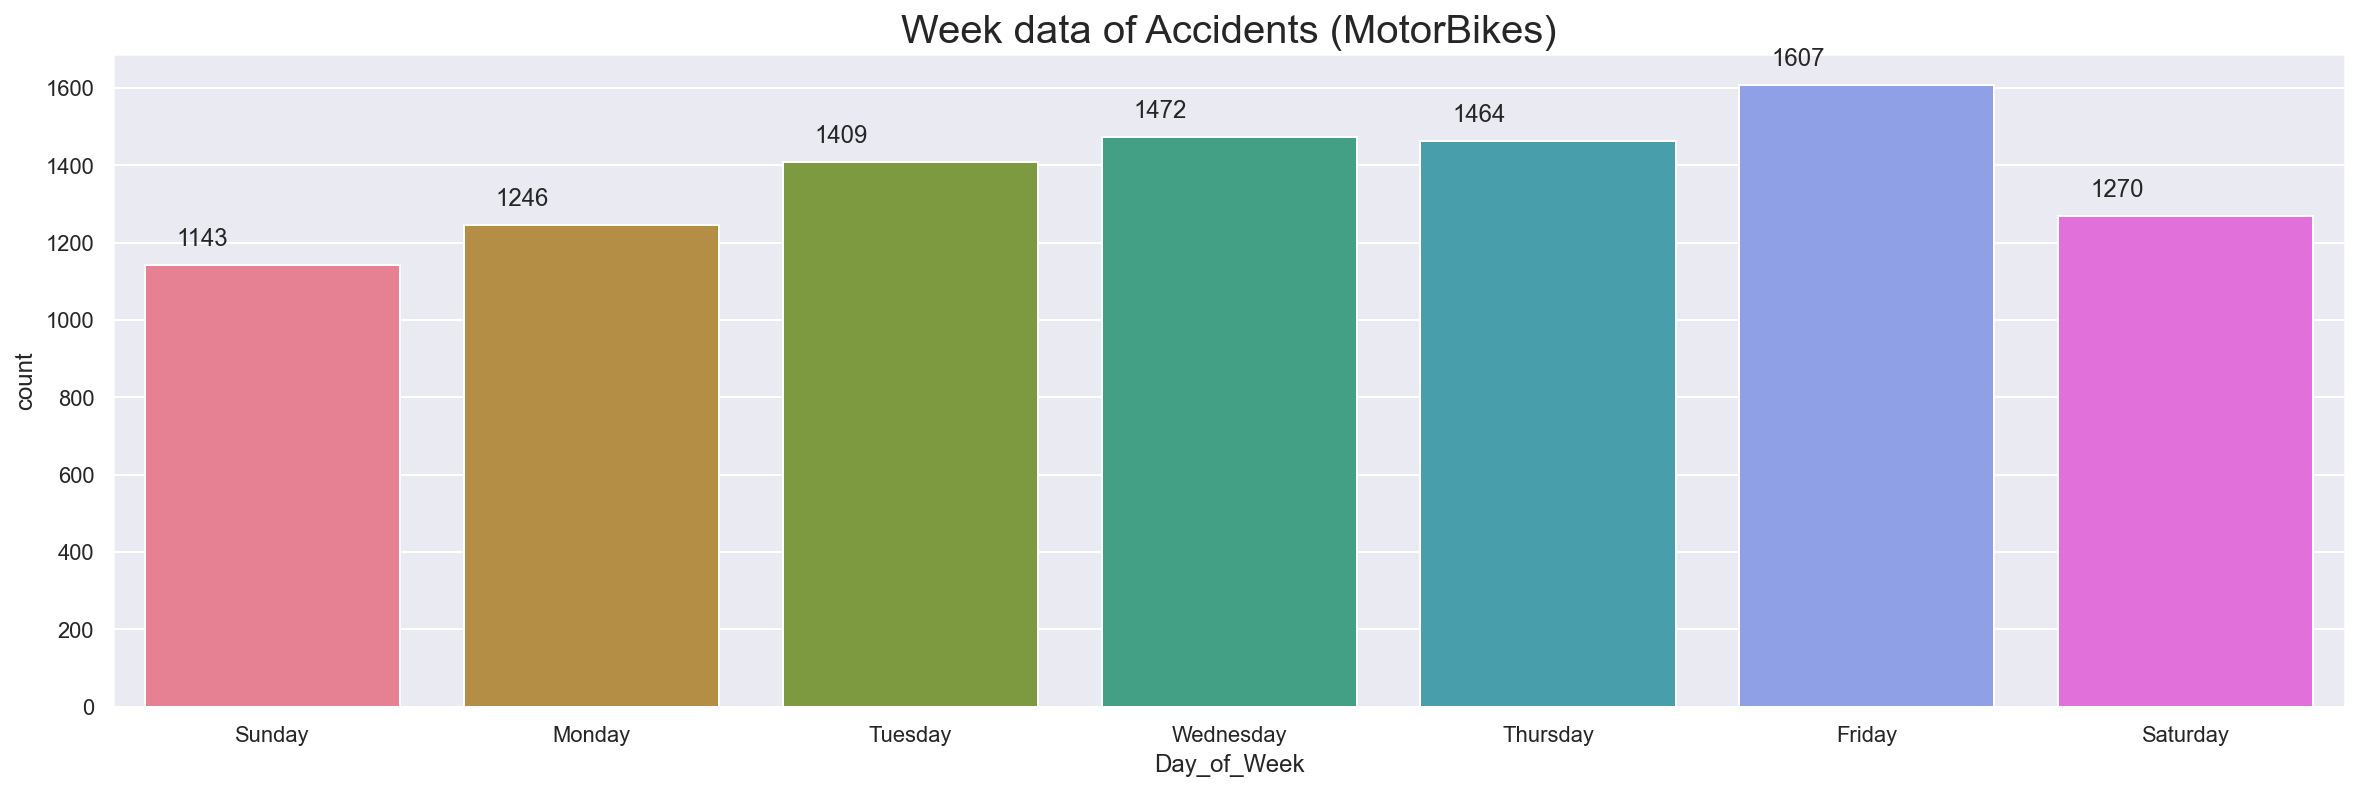

In [98]:
order = ['Sunday', 'Monday', 'Tuesday','Wednesday', 'Thursday','Friday', 'Saturday']
sns.set(rc={'figure.figsize':(20,6)})
sns.color_palette("tab10")
ax=sns.countplot(x='Day_of_Week', 
                 data=Motorbikes, order=order,palette="husl")
plt.title('Week data of Accidents (MotorBikes)',fontsize= 20)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

#### For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [99]:
# There is pedestrian class in casualty class
# according to the lookup table pedastrians belong to the category 3
Casualties["Pedastrian"] = (Casualties["Casualty_Class"] == 3).astype(int) 
Casualties["Under_18"] = ((Casualties["Age_of_Casualty"]) < 18 & (Casualties["Age_of_Casualty"] != -1)).astype(int)
Casualties["Above_65"] = (Casualties["Age_of_Casualty"] > 65).astype(int)

In [100]:
df = pd.DataFrame()
df["Pedastrian"] = Casualties.groupby('Accident_Index')['Pedastrian'].sum().astype(bool).astype(int)
df["Casuality_Under_18"] = Casualties.groupby('Accident_Index')['Under_18'].sum().astype(bool).astype(int)
df["Casuality_Above_65"] = Casualties.groupby('Accident_Index')['Above_65'].sum().astype(bool).astype(int)
df.reset_index(inplace=True)

In [101]:
data = Accidents.merge(Accidents, on='Accident_Index')

In [102]:
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR_x', 'Location_Northing_OSGR_x',
       'Longitude_x', 'Latitude_x', 'Police_Force_x', 'Accident_Severity_x',
       'Number_of_Vehicles_x', 'Number_of_Casualties_x', 'Date_x',
       'Day_of_Week_x', 'Time_x', 'Local_Authority_(District)_x',
       'Local_Authority_(Highway)_x', '1st_Road_Class_x', '1st_Road_Number_x',
       'Road_Type_x', 'Speed_limit_x', 'Junction_Detail_x',
       'Junction_Control_x', '2nd_Road_Class_x', '2nd_Road_Number_x',
       'Pedestrian_Crossing-Human_Control_x',
       'Pedestrian_Crossing-Physical_Facilities_x', 'Light_Conditions_x',
       'Weather_Conditions_x', 'Road_Surface_Conditions_x',
       'Special_Conditions_at_Site_x', 'Carriageway_Hazards_x',
       'Urban_or_Rural_Area_x',
       'Did_Police_Officer_Attend_Scene_of_Accident_x',
       'LSOA_of_Accident_Location_x', 'Converted_Time_x', 'decimal_time_x',
       'East_North_OSGR_x', 'Location_Easting_OSGR_y',
       'Location_Northing_OSGR_y', 'Lo

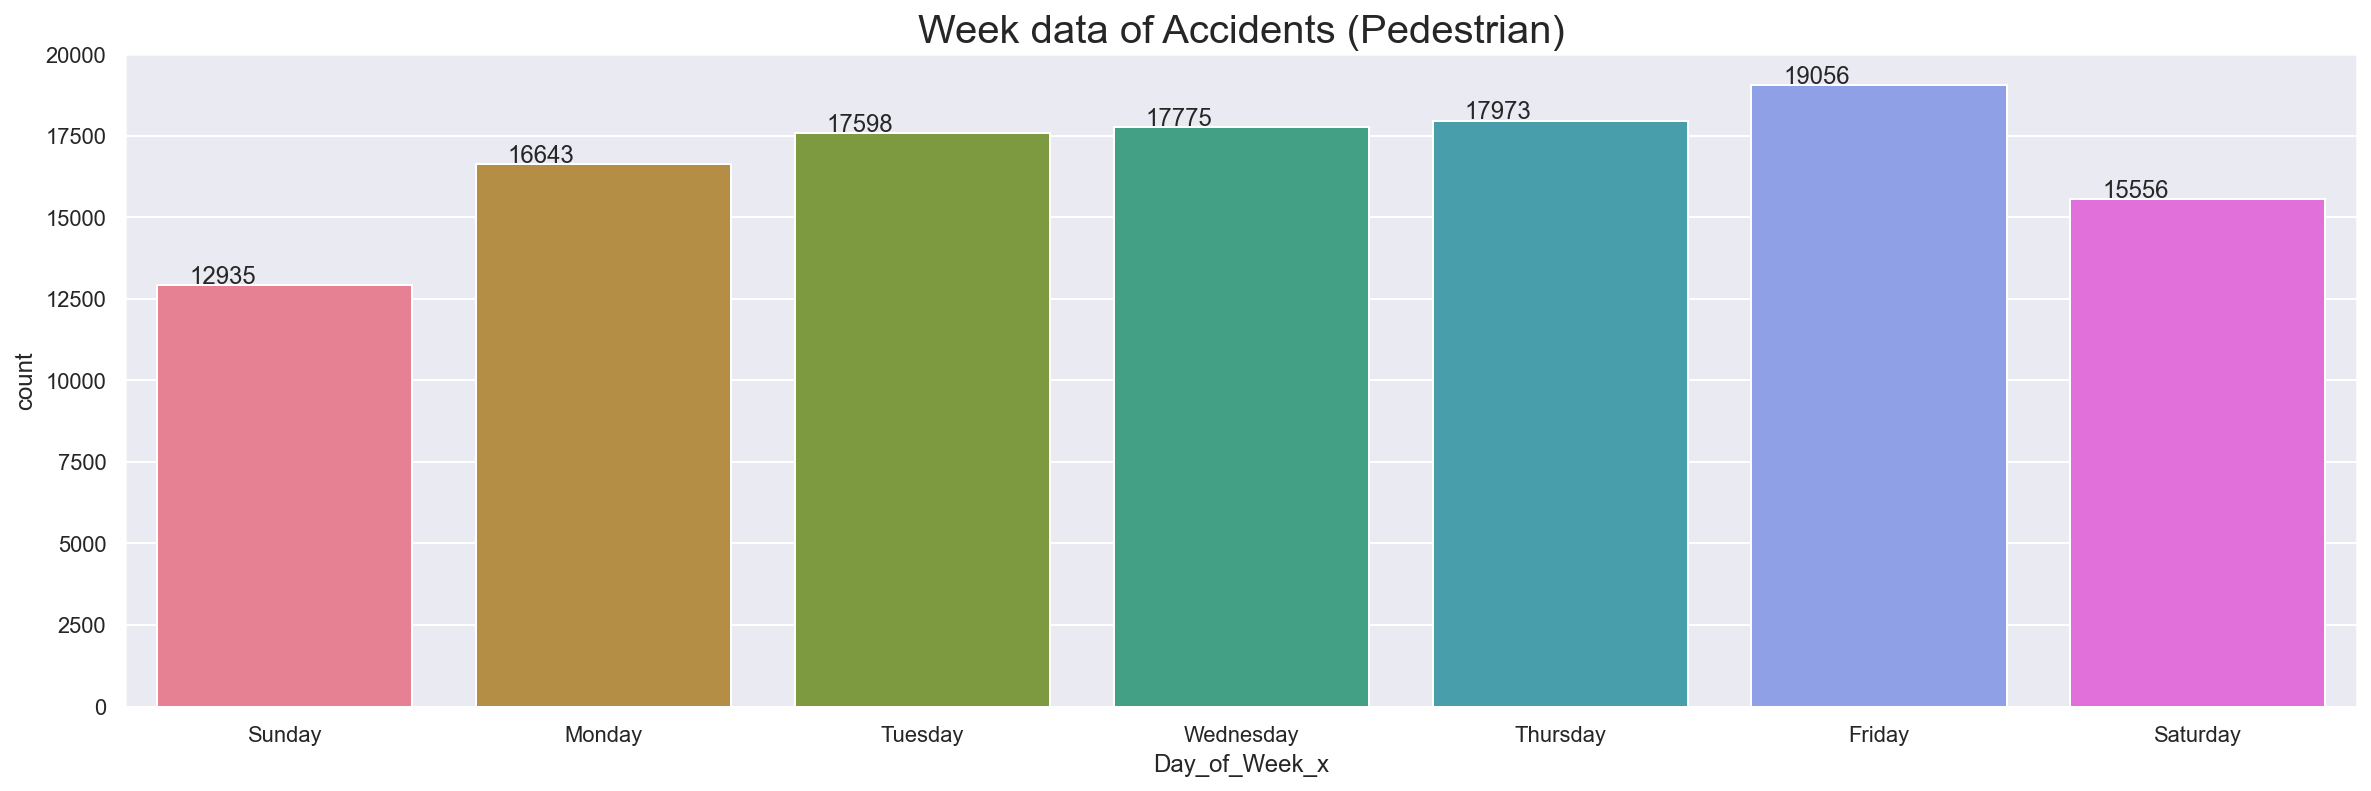

In [103]:
order = ['Sunday', 'Monday', 'Tuesday','Wednesday', 'Thursday','Friday', 'Saturday']
sns.set(rc={'figure.figsize':(20,6)})
sns.color_palette("tab10")
ax=sns.countplot(x='Day_of_Week_x', 
                 data=data, order=order,palette="husl")
plt.title('Week data of Accidents (Pedestrian)',fontsize= 20)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

### (d) What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?

#### At start of daylight savings

In [104]:
#Accidents at the start of daylight savings
startdf = Accidents_modelled[(Accidents_modelled['Date'].isin(['01/04/2019','02/04/2019','03/04/2019','04/04/2019',
                                       '05/04/2019','06/04/2019','07/04/2019']))]
startdf

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
5605    2019010172491               522869.0                179544.0   
5607    2019010172494               523214.0                184176.0   
5608    2019010172496               515076.0                191404.0   
5609    2019010172497               517042.0                177844.0   
5611    2019010172502               545120.0                179678.0   
...               ...                    ...                     ...   
117257  201997UC70204               254386.0                619989.0   
117476  2019983107319               299455.0                575654.0   
117477  2019983107419               302354.0                577792.0   
117478  2019983107719               292895.0                577023.0   
117516  2019984104219               313523.0                582066.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
5605    -0.231178  51.501488             1                  3   
5607    -0.224591  51.543042             1                  3   
5608    -0.339524  51.609721             1                  3   
5609    -0.315653  51.487443             1                  3   
5611     0.089242  51.497421             1                  3   
...           ...        ...           ...                ...   
117257  -4.303986  55.452036            97                  3   
117476  -3.575895  55.065148            98                  3   
117477  -3.531253  55.084932            98                  2   
117478  -3.679079  55.076072            98                  1   
117516  -3.357641  55.125401            98                  2   

        Number_of_Vehicles  Number_of_Casualties        Date  ...  \
5605                     3                     1  01/04/2019  ...   
5607                     2                     2  01/04/2019  ...   
5608                     1                     1  01/04/2019  ...   
5609                     2                     1  01/04/2019  ...   
5611                     2                     1  01/04/2019  ...   
...                    ...                   ...         ...  ...   
117257                   2                     1  05/04/2019  ...   
117476                   2                     1  02/04/2019  ...   
117477                   2                     1  02/04/2019  ...   
117478                   1                     1  06/04/2019  ...   
117516                   1                     1  05/04/2019  ...   

        Pedestrian_Crossing-Human_Control  \
5605                                    0   
5607                                    0   
5608                                    0   
5609                                    0   
5611                                    0   
...                                   ...   
117257                                  0   
117476                                  0   
117477                                  0   
117478                                  0   
117516                                  0   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
5605                                         0                 4   
5607                                         0                 1   
5608                                         0                 4   
5609                                         4                 4   
5611                                         0                 1   
...                                        ...               ...   
117257                                       0                 1   
117476                                       0                 1   
117477                                       0                 1   
117478                                       0                 1   
117516                                       0                 1   

       Weather_Conditions  Road_Surface_Conditions  \
5605                    1                        1   
5607                    1                        1   
5608        

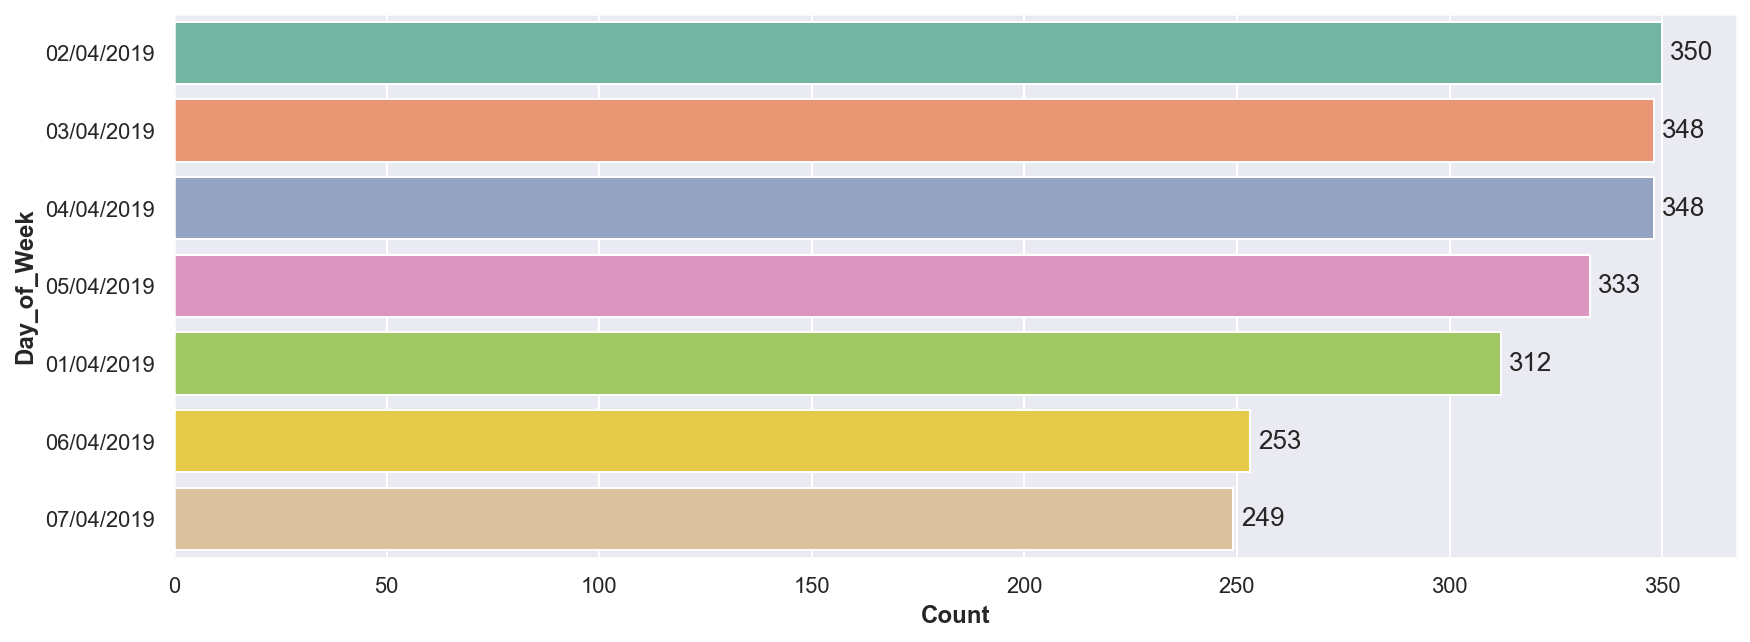

In [105]:
#Count of accidents for daylight 
plt.figure(figsize=(14, 5))
lgtplt = sns.countplot(data = startdf, y = 'Date', palette = 'Set2', order = startdf['Date'].value_counts().index)
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Day_of_Week', fontweight='bold')

for x in lgtplt.patches:
    
    # labelling days of the week
    lgtplt.annotate(
        x.get_width(),                      
        (x.get_width(), x.get_y() + x.get_height() / 2),        
        xytext=(4, 0),          
        textcoords="offset points", 
        va='center',                
        ha='left', fontsize=13) 


(lgtplt.get_figure()).savefig('./day light savings start week.jpg')

#### At end of daylight savings

In [106]:
#Accidents after the end of Daylight savings

enddf = Accidents_modelled[(Accidents_modelled['Date'].isin(['28/10/2019','29/10/2019','30/10/2019','31/10/2019',
                                       '01/11/2019','02/11/2019','03/11/2019']))]
enddf

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
18700   2019010210200               541941.0                158887.0   
20137   2019010214436               540507.0                169241.0   
20139   2019010214446               514880.0                184326.0   
20141   2019010214448               544333.0                184179.0   
20142   2019010214450               525237.0                185720.0   
...               ...                    ...                     ...   
116051  2019970929653               258746.0                665471.0   
116055  2019970933955               251943.0                673105.0   
116059  2019970937555               273232.0                660349.0   
117401  2019980895659               308548.0                569700.0   
117403  2019980896007               245291.0                563396.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
18700    0.035166  51.311401             1                  3   
20137    0.018689  51.404799             1                  3   
20139   -0.344667  51.546145             1                  3   
20141    0.079754  51.538067             1                  3   
20142   -0.194885  51.556473             1                  3   
...           ...        ...           ...                ...   
116051  -4.258507  55.861657            97                  3   
116055  -4.371280  55.928146            97                  2   
116059  -4.024832  55.819695            97                  3   
117401  -3.431659  55.013421            98                  2   
117403  -4.416676  54.941174            98                  3   

        Number_of_Vehicles  Number_of_Casualties        Date  ...  \
18700                    2                     1  31/10/2019  ...   
20137                    1                     1  28/10/2019  ...   
20139                    3                     1  28/10/2019  ...   
20141                    3                     1  28/10/2019  ...   
20142                    2                     1  28/10/2019  ...   
...                    ...                   ...         ...  ...   
116051                   1                     1  01/11/2019  ...   
116055                   2                     2  01/11/2019  ...   
116059                   1                     1  31/10/2019  ...   
117401                   1                     1  29/10/2019  ...   
117403                   3                     2  03/11/2019  ...   

        Pedestrian_Crossing-Human_Control  \
18700                                   0   
20137                                   0   
20139                                   0   
20141                                   0   
20142                                   0   
...                                   ...   
116051                                  0   
116055                                  0   
116059                                  0   
117401                                  0   
117403                                  0   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
18700                                        5                 1   
20137                                        5                 4   
20139                                        0                 4   
20141                                        4                 4   
20142                                        5                 4   
...                                        ...               ...   
116051                                       5                 4   
116055                                       0                 4   
116059                                       0                 1   
117401                                       0                 1   
117403                                       0                 1   

       Weather_Conditions  Road_Surface_Conditions  \
18700                   1                        1   
20137                   8                        1   
20139       

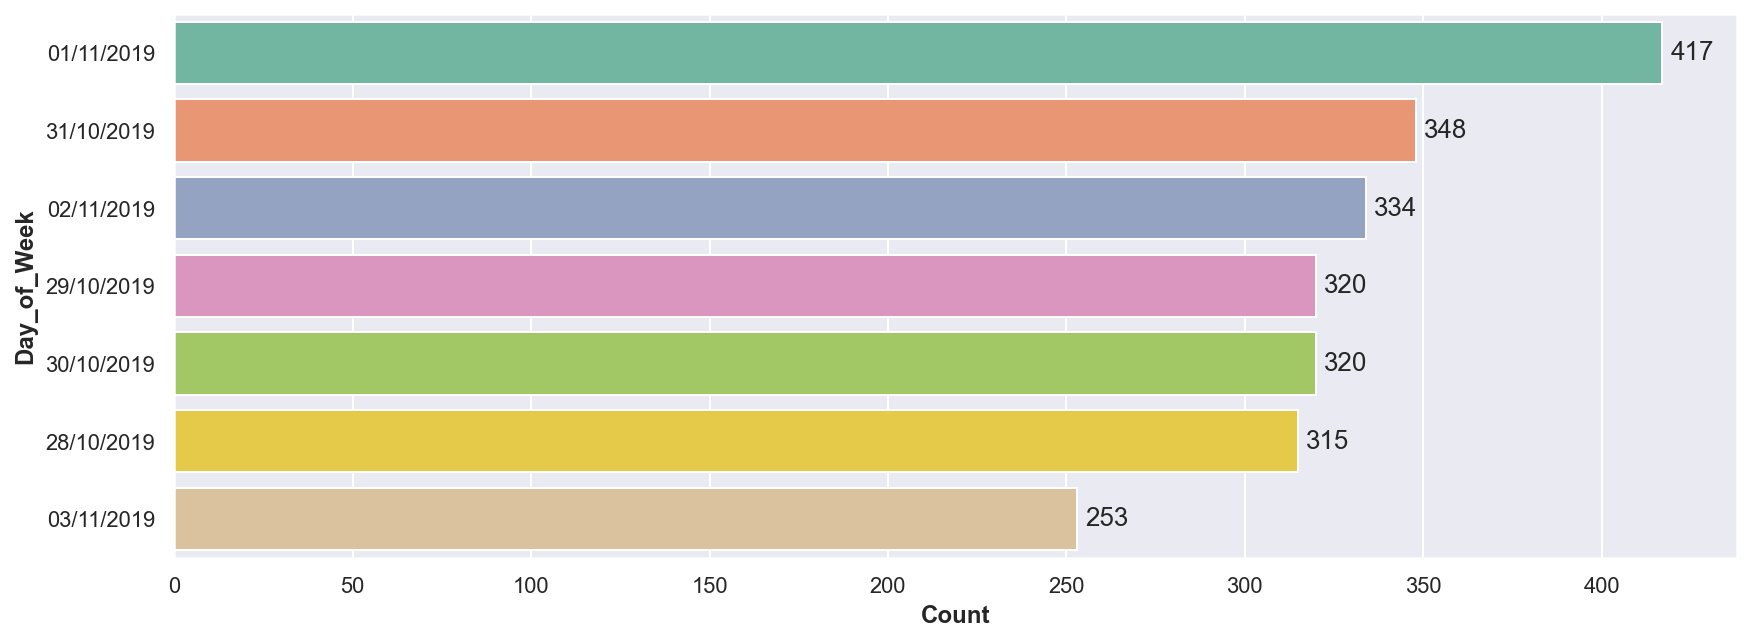

In [107]:
#Count of accidents 
plt.figure(figsize=(14, 5))
endplt = sns.countplot(data = enddf, y = 'Date', palette = 'Set2', order = enddf['Date'].value_counts().index)
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Day_of_Week', fontweight='bold')

for x in endplt.patches:
    
    #label for days of the week
    endplt.annotate(
        x.get_width(),                      
        (x.get_width(), x.get_y() + x.get_height() / 2),        
        xytext=(4, 0),          
        textcoords="offset points", 
        va='center',                
        ha='left', fontsize=13) 


(endplt.get_figure()).savefig('./day light savings end week.jpg')

#### (e) What impact, if any, does sunrise and sunset times have on road traffic accidents?

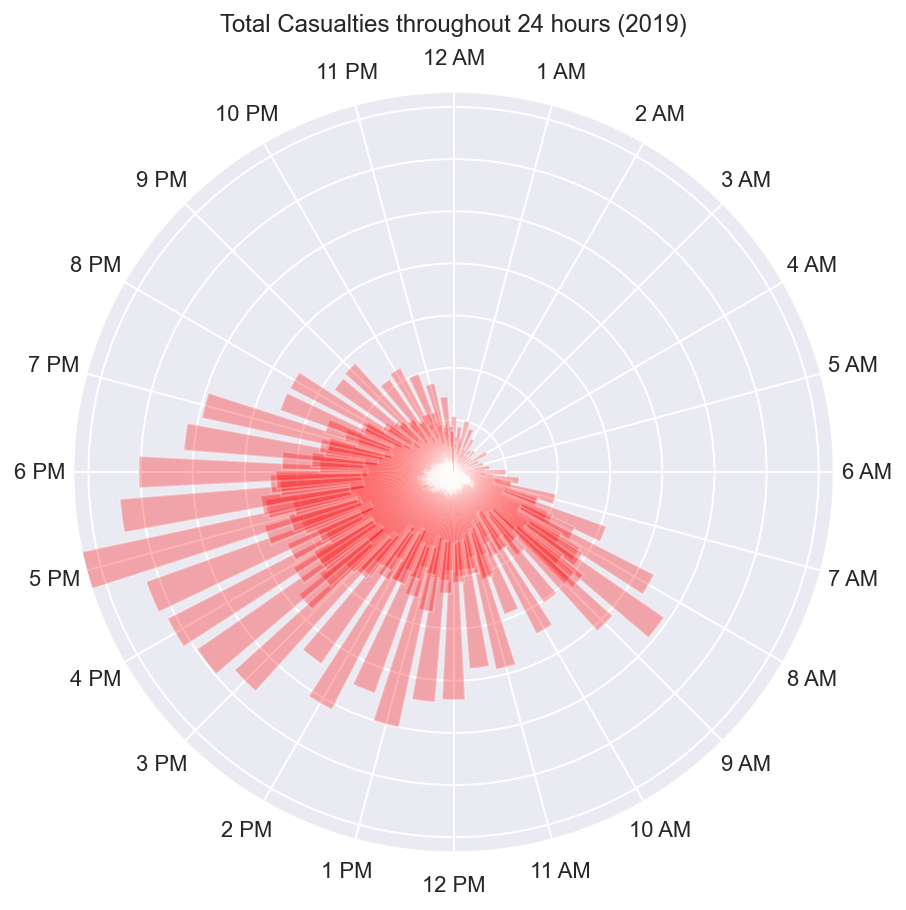

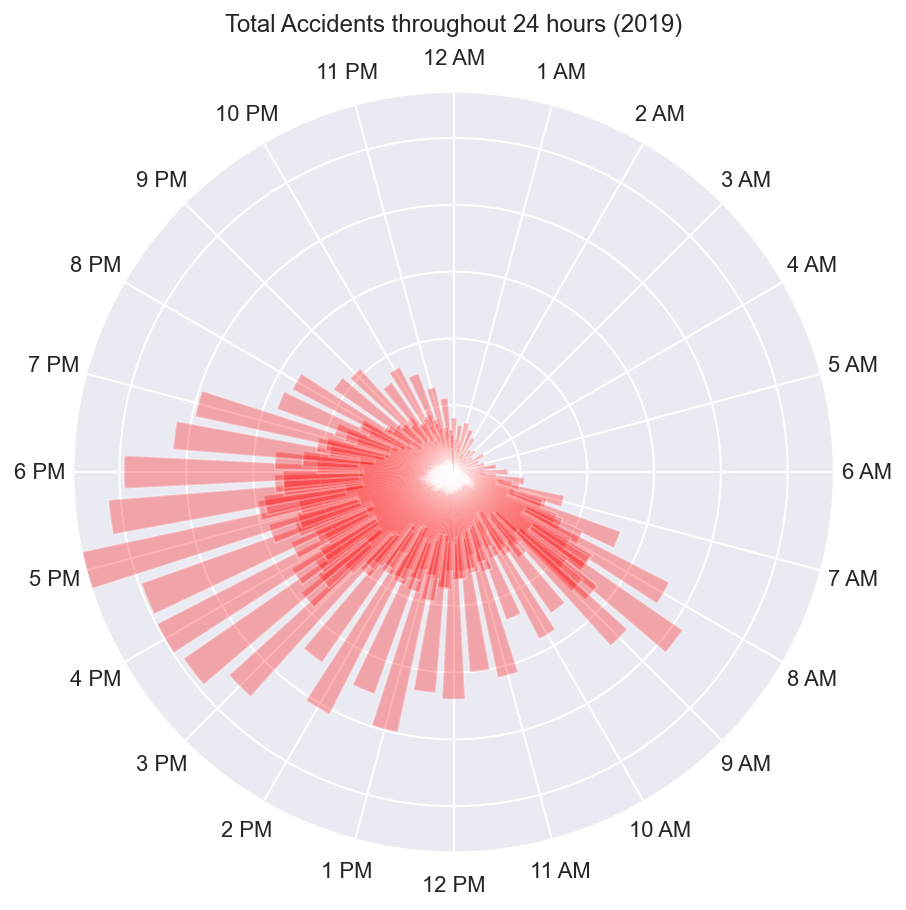

In [108]:
grouped_df1 = Accidents[-Accidents['Time'].isna(
)].groupby('Time')['Number_of_Casualties'].sum().reset_index()
#grouped_df2 = Accidents[-Accidents['Time'].isna(
#)].groupby('Time')['Number_of_Casualties'].mean().reset_index()
grouped_df3 = Accidents[-Accidents['Time'].isna(
)].groupby('Time')['Accident_Index'].count().reset_index()

plot_by_time_of_the_day(grouped_df1, 'Time', 'Number_of_Casualties',
                        'Total Casualties throughout 24 hours (2019)')
#plot_by_time_of_the_day(grouped_df2, 'Time', 'Number_of_Casualties',
#                        'Mean Casualties throughout 24 hours (2019)')
plot_by_time_of_the_day(grouped_df3, 'Time', 'Accident_Index',
                        'Total Accidents throughout 24 hours (2019)')

### (f) Are there particular types of vehicles (colour, makes, etc.) that are more frequently involved in road traffic accidents?

In [109]:
#Join the dataframes and visualize using BAR graph
vehicles_types = pd.DataFrame()

In [110]:
vehicles_types = Accidents.merge(Accidents,on='Accident_Index',how='right')

In [111]:
vehicles_types.columns

Index(['Accident_Index', 'Location_Easting_OSGR_x', 'Location_Northing_OSGR_x',
       'Longitude_x', 'Latitude_x', 'Police_Force_x', 'Accident_Severity_x',
       'Number_of_Vehicles_x', 'Number_of_Casualties_x', 'Date_x',
       'Day_of_Week_x', 'Time_x', 'Local_Authority_(District)_x',
       'Local_Authority_(Highway)_x', '1st_Road_Class_x', '1st_Road_Number_x',
       'Road_Type_x', 'Speed_limit_x', 'Junction_Detail_x',
       'Junction_Control_x', '2nd_Road_Class_x', '2nd_Road_Number_x',
       'Pedestrian_Crossing-Human_Control_x',
       'Pedestrian_Crossing-Physical_Facilities_x', 'Light_Conditions_x',
       'Weather_Conditions_x', 'Road_Surface_Conditions_x',
       'Special_Conditions_at_Site_x', 'Carriageway_Hazards_x',
       'Urban_or_Rural_Area_x',
       'Did_Police_Officer_Attend_Scene_of_Accident_x',
       'LSOA_of_Accident_Location_x', 'Converted_Time_x', 'decimal_time_x',
       'East_North_OSGR_x', 'Location_Easting_OSGR_y',
       'Location_Northing_OSGR_y', 'Lo

In [112]:
EngineCCandAge=Vehicles.loc[:, Vehicles.columns.intersection(['Engine_Capacity_(CC)','Age_of_Vehicle'])]
EngineCCandAge

Engine_Capacity_(CC)  Age_of_Vehicle
0                       1242               4
1                       1242               4
2                       1242               4
3                       1242               4
4                       1242               4
...                      ...             ...
216376                  2198               4
216377                  1997              12
216378                  2967               5
216379                  1597               6
216380                   599              20

[216381 rows x 2 columns]

In [113]:
#importing more libraries for clustering 
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

kmeans=KMeans(n_clusters=10)
kmeans.fit(EngineCCandAge)

In [114]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(EngineCCandAge)

KMeans(n_clusters=10)

In [115]:
labels=kmeans.predict(EngineCCandAge)
centroids = kmeans.cluster_centers_
labels

array([2, 2, 2, ..., 4, 7, 5])

In [116]:
centroids

array([[1.99533988e+03, 8.53569945e+00],
       [9.07796605e+03, 9.53152279e+00],
       [1.11025632e+03, 8.02739573e+00],
       [1.28548985e+04, 5.02442529e+00],
       [2.87722365e+03, 9.60149451e+00],
       [1.82354413e+02, 7.30347640e+00],
       [4.55327163e+03, 6.65758427e+00],
       [1.50629100e+03, 8.18284279e+00],
       [1.08294712e+04, 5.11298077e+00],
       [6.82748533e+03, 7.71009491e+00]])

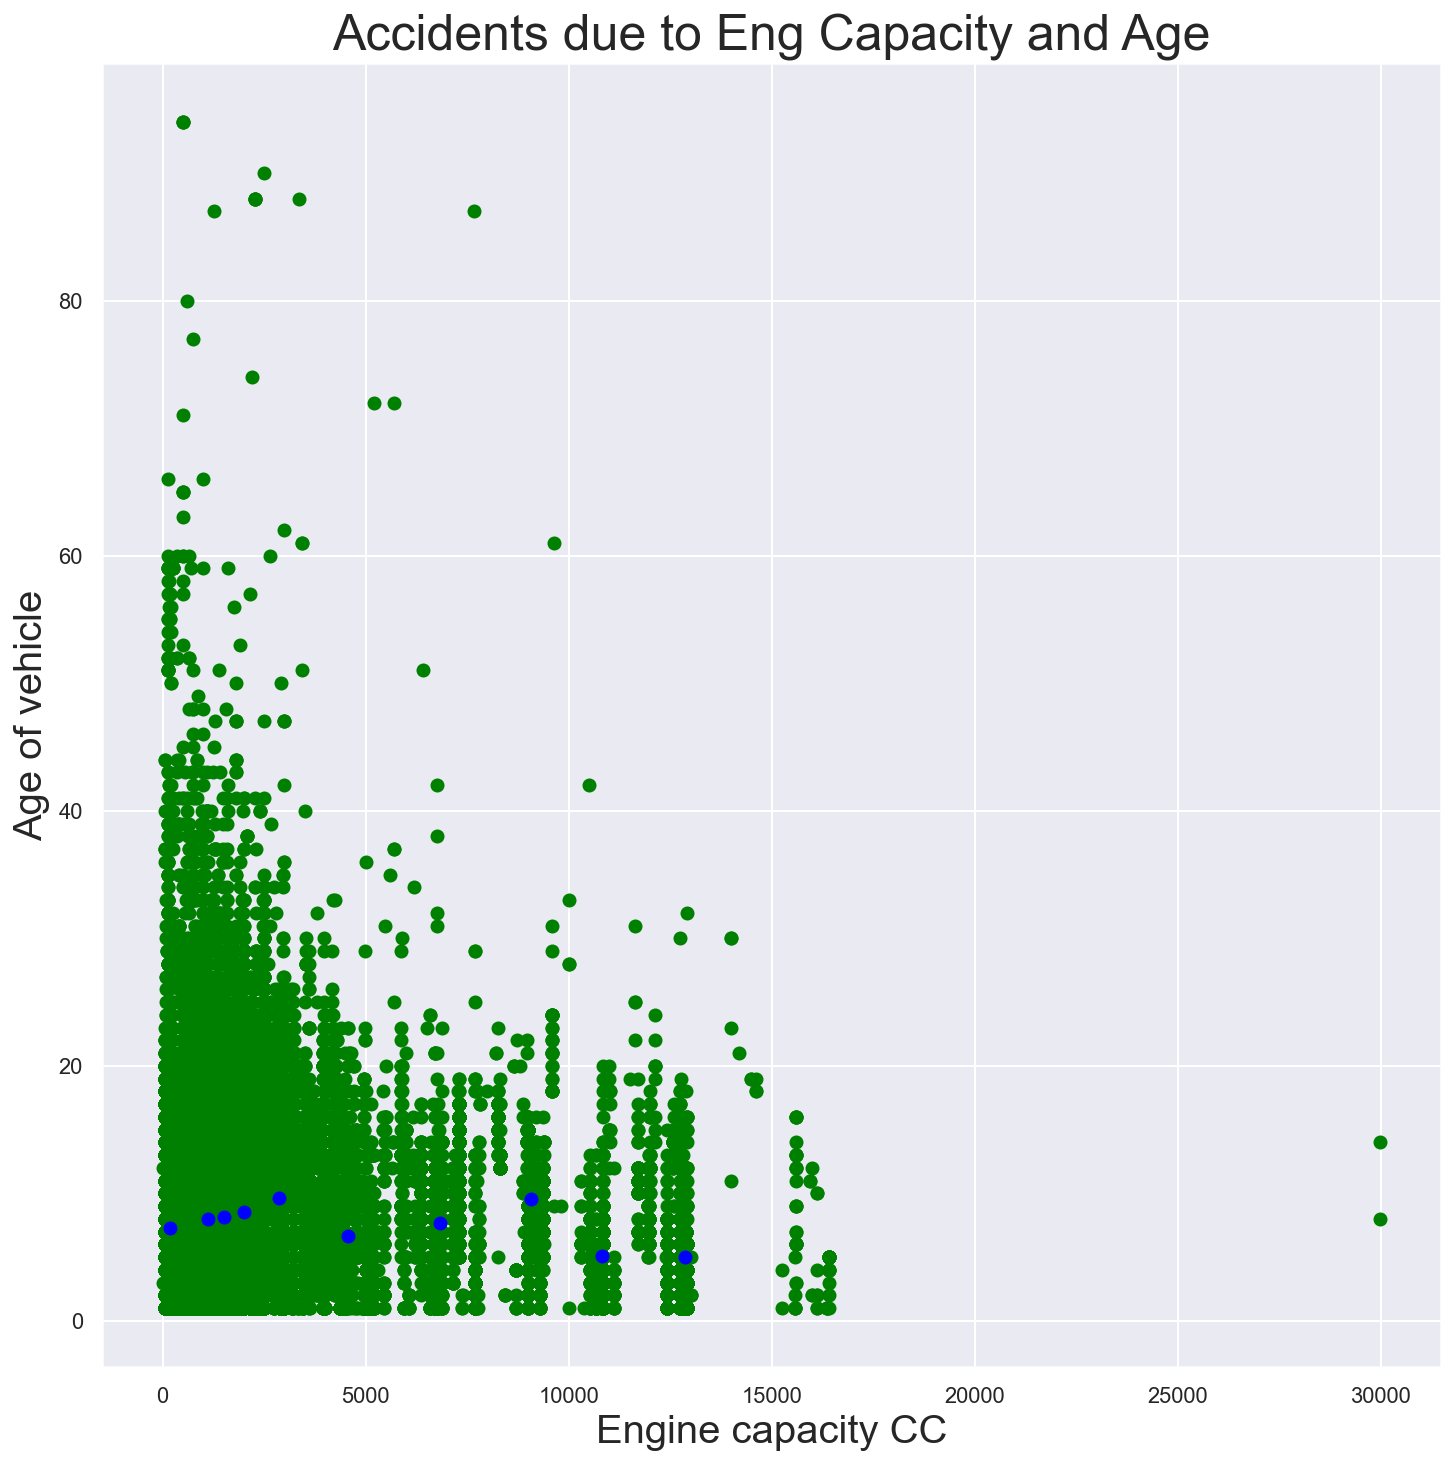

In [117]:
fig = plt.figure(figsize=(12,12))
colors = map(lambda x: colmap[x+1], labels)
plt.xlabel('Engine capacity CC',fontdict = {'fontsize' : 20})
plt.ylabel('Age of vehicle',fontdict = {'fontsize' : 20})
plt.title('Accidents due to Eng Capacity and Age', fontdict = {'fontsize' : 25})
plt.scatter(EngineCCandAge['Engine_Capacity_(CC)'],EngineCCandAge['Age_of_Vehicle'],color="green")
plt.scatter(centroids[:,0],centroids[:,1],color="blue")
plt.show()

In [118]:
#creating a merged database
vehicle_type = [8, 9,10,11,17,19,90,98]
vehicle_list = Vehicles[Vehicles['Vehicle_Type'].isin(vehicle_type)]
vehicle_accident_type_modelled = pd.merge(Accidents_modelled,vehicle_list, on='Accident_Index',how='inner')

In [119]:
vehicle_accident_type_modelled

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010128300               528218.0                180407.0   
2       2019010152270               530219.0                172463.0   
3       2019010152270               530219.0                172463.0   
4       2019010155191               530222.0                182543.0   
...               ...                    ...                     ...   
143238  2019984107019               337522.0                591682.0   
143239  2019984107019               337522.0                591682.0   
143240  2019984107219               318544.0                567087.0   
143241  2019984107219               318544.0                567087.0   
143242  2019984107419               336525.0                584226.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057             1                  3   
1       -0.153842  51.508057             1                  3   
2       -0.127949  51.436208             1                  3   
3       -0.127949  51.436208             1                  3   
4       -0.124193  51.526795             1                  3   
...           ...        ...           ...                ...   
143238  -2.983499  55.215407            98                  3   
143239  -2.983499  55.215407            98                  3   
143240  -3.274645  54.991685            98                  3   
143241  -3.274645  54.991685            98                  3   
143242  -2.997491  55.148292            98                  3   

        Number_of_Vehicles  Number_of_Casualties        Date  ...  \
0                        2                     3  18/02/2019  ...   
1                        2                     3  18/02/2019  ...   
2                        2                     1  15/01/2019  ...   
3                        2                     1  15/01/2019  ...   
4                        2                     1  01/01/2019  ...   
...                    ...                   ...         ...  ...   
143238                   4                     1  30/05/2019  ...   
143239                   4                     1  30/05/2019  ...   
143240                   2                     1  21/06/2019  ...   
143241                   2                     1  21/06/2019  ...   
143242                   1                     1  29/06/2019  ...   

        Journey_Purpose_of_Driver Sex_of_Driver  Age_of_Driver  \
0                               6             1             58   
1                               6             3             35   
2                               6             2             24   
3                               6             3             35   
4                               6             1             45   
...                           ...           ...            ...   
143238                          1             1             36   
143239                          1             1             20   
143240                          6             1             33   
143241                          6             1             61   
143242                          5             1             78   

       Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  \
0                       9                  1242                1   
1                       6                  1242                1   
2                       5                  1242                1   
3                       6                  1242                1   
4                       7                  1242                1   
...                   ...                   ...              ...   
143238                  7                  1968                2   
143239                  4                  2198                2   
143240                  6                  1997                2   
143241                  9                  2967            

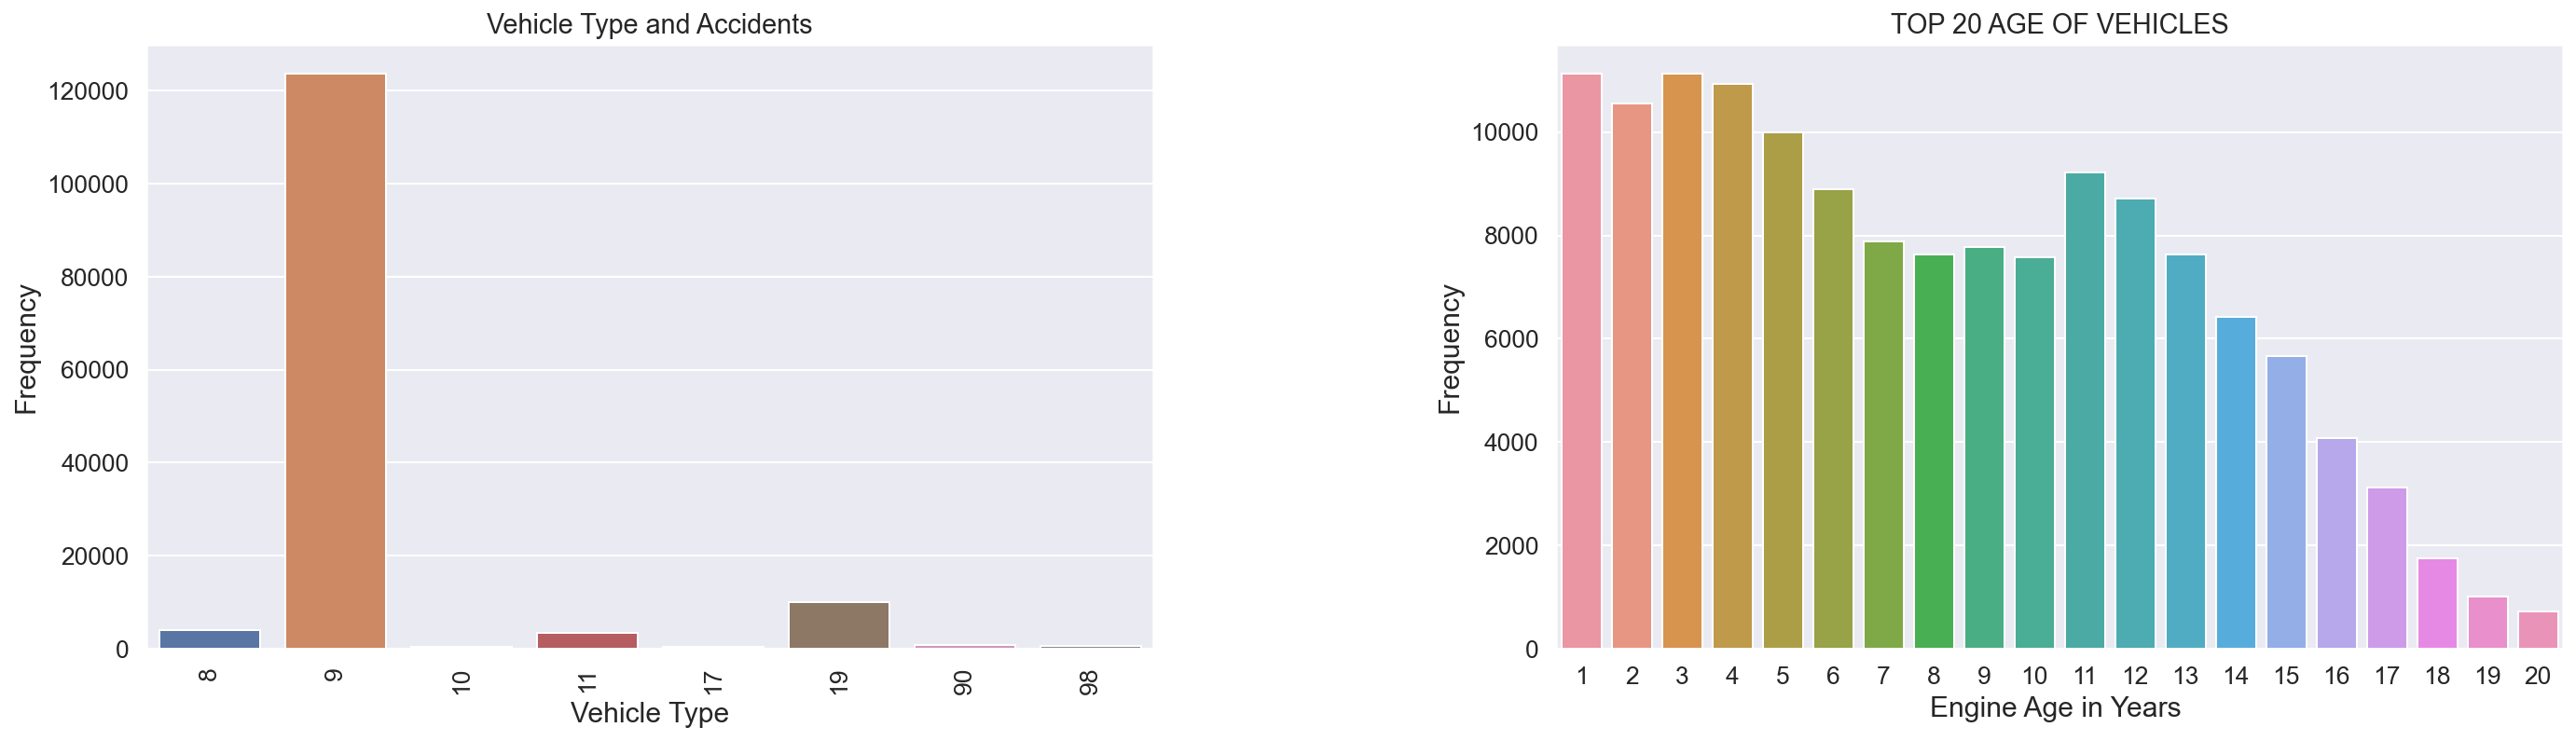

In [120]:
plt.figure(figsize=(12,12))
sns.set(font_scale = 1.2,style='darkgrid')
plt.rcParams['figure.figsize']=[15,15]

#vehicle_cc = dict(vehicle_accident_type['Engine_Capacity_(CC)'].value_counts().head(20))
vehicle_type = dict(vehicle_accident_type_modelled['Vehicle_Type'].value_counts().head(20))
age_vehicle = dict(vehicle_accident_type_modelled['Age_of_Vehicle'].value_counts().head(20))

plt.subplot(2,2,1)
fig1 = sns.barplot(list(vehicle_type.keys()),list(vehicle_type.values()))

fig1.set_title('Vehicle Type and Accidents')
fig1.set_xlabel('Vehicle Type',size='15')
fig1.set_ylabel('Frequency',size='15')
plt.xticks(rotation='90')

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(2,2,2)
fig2 = sns.barplot(list(age_vehicle.keys()),list(age_vehicle.values()))
fig2.set_title('TOP 20 AGE OF VEHICLES')
fig2.set_xlabel('Engine Age in Years ',size='15')
fig2.set_ylabel('Frequency',size='15')
plt.show()

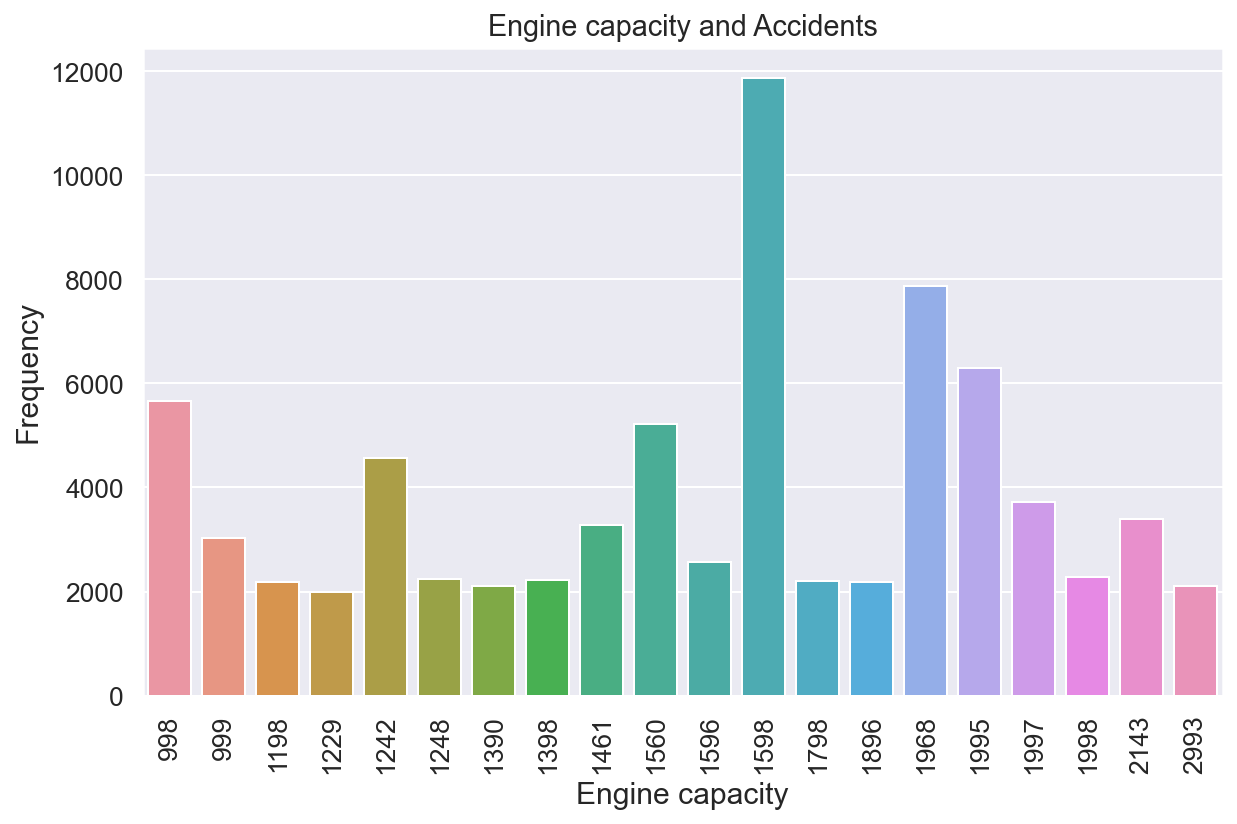

In [121]:
plt.figure(figsize=(12,12))
sns.set(font_scale = 1.2,style='darkgrid')
plt.rcParams['figure.figsize']=[15,15]

vehicle_cc = dict(vehicle_accident_type_modelled['Engine_Capacity_(CC)'].value_counts().head(20))
#vehicle_type = dict(vehicle_accident_type['Vehicle_Type'].value_counts().head(20))
#age_vehicle = dict(vehicle_accident_type['Age_of_Vehicle'].value_counts().head(20))

plt.subplot(2,2,1)
fig1 = sns.barplot(list(vehicle_cc.keys()),list(vehicle_cc.values()))

fig1.set_title('Engine capacity and Accidents')
fig1.set_xlabel('Engine capacity',size='15')
fig1.set_ylabel('Frequency',size='15')
plt.xticks(rotation='90')

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)



#### Other factors resulting in accidents

In [122]:
# Effect of Road types on accidents 
road_type_accidents = Accidents['Road_Type'].value_counts()
road_type_accidents = pd.DataFrame(road_type_accidents)
road_type_accidents = road_type_accidents.reset_index()
road_type_accidents = road_type_accidents.rename({'index':'road type', 'Road_Type': 'accident count'}, axis=1)
road_type_accidents

road type  accident count
0  Single carriageway           85320
1    Dual carriageway           18590
2          Roundabout            6880
3      One way street            2664
4             Unknown            2143
5           Slip road            1939

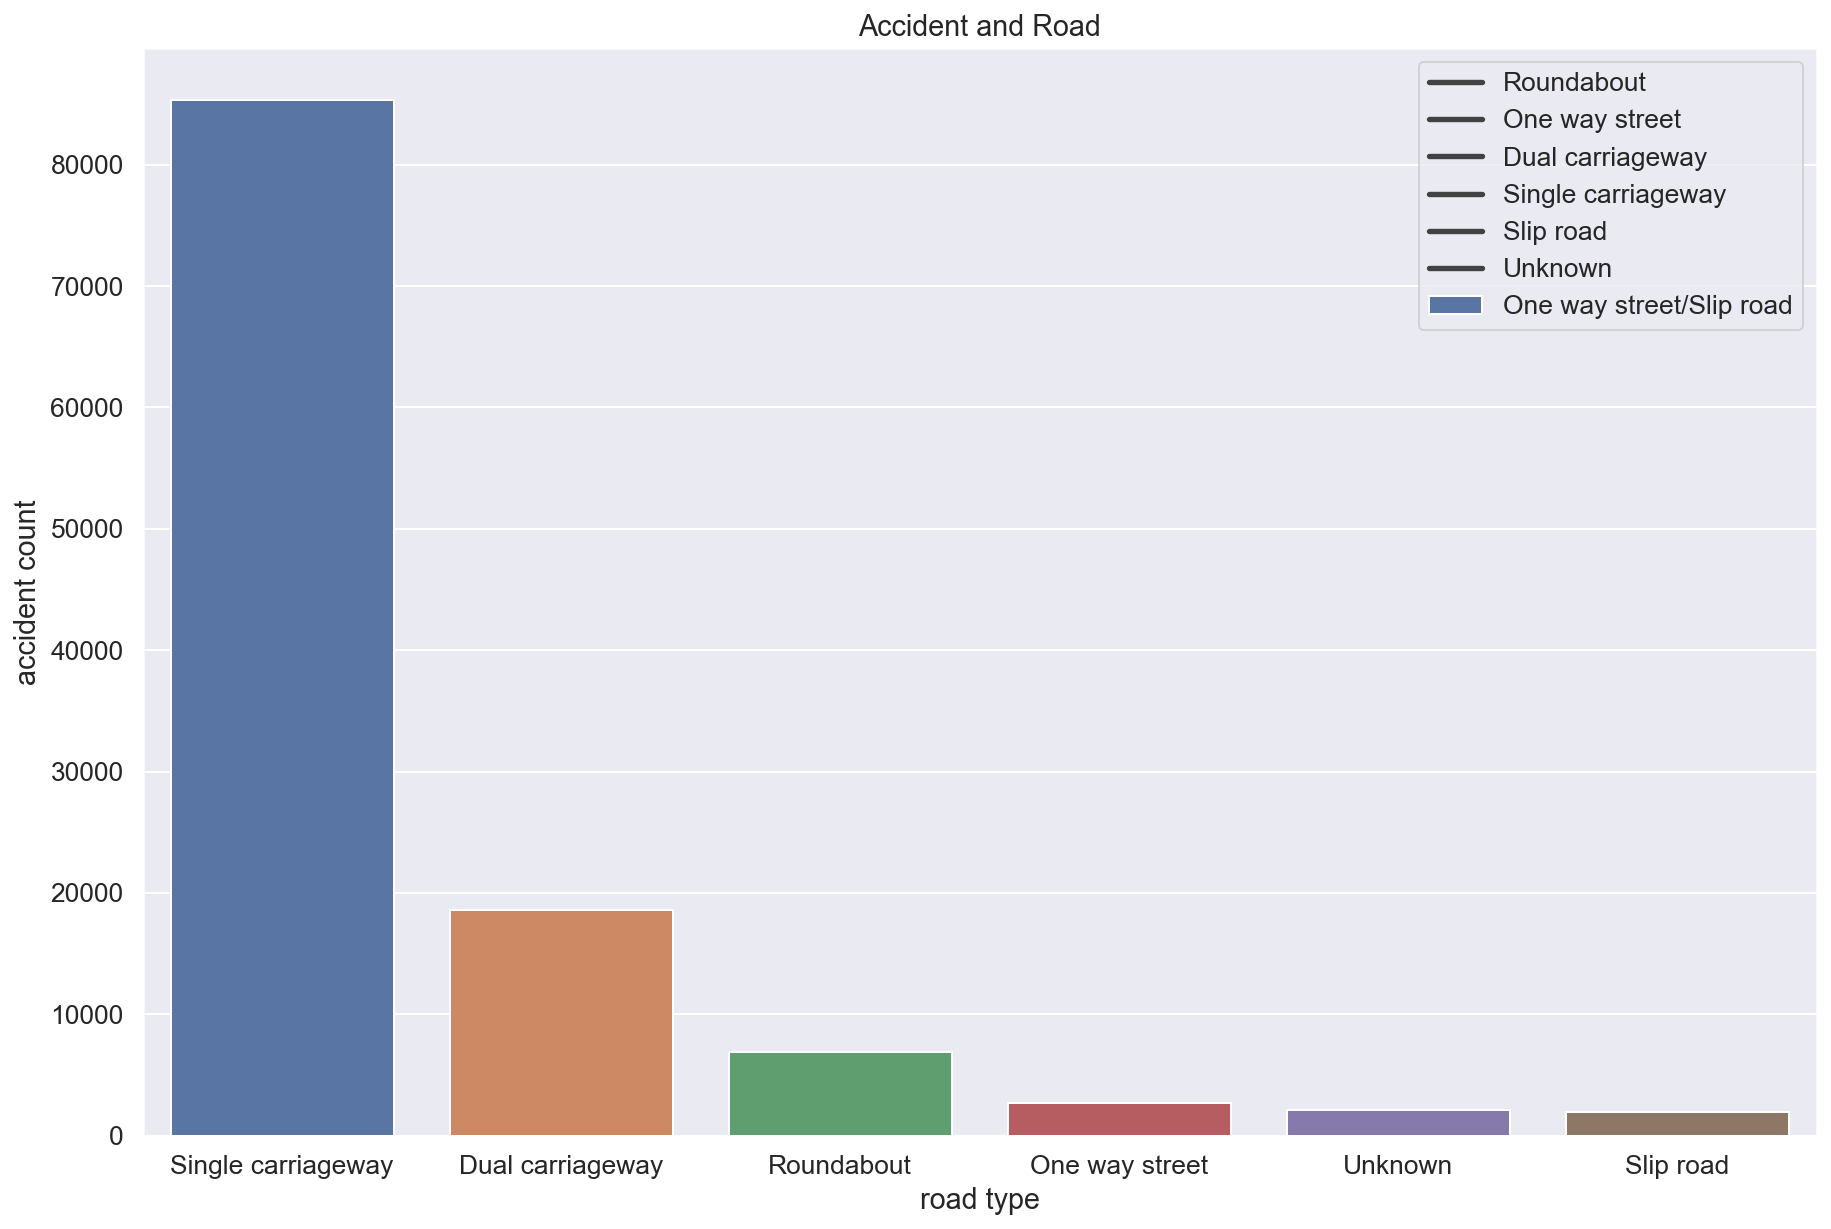

In [123]:
labels=['Roundabout','One way street','Dual carriageway',
           'Single carriageway','Slip road','Unknown','One way street/Slip road']
plt.figure(figsize=(15,10))
sns.barplot(data=road_type_accidents, y=road_type_accidents['accident count'],
           x=road_type_accidents['road type'])
#plt.xticks(ticks=road_type_accidents['road type'],labels=labels, rotation=-90,)
plt.legend(labels)
plt.title('Accident and Road')
plt.show()

<Figure size 864x432 with 0 Axes>

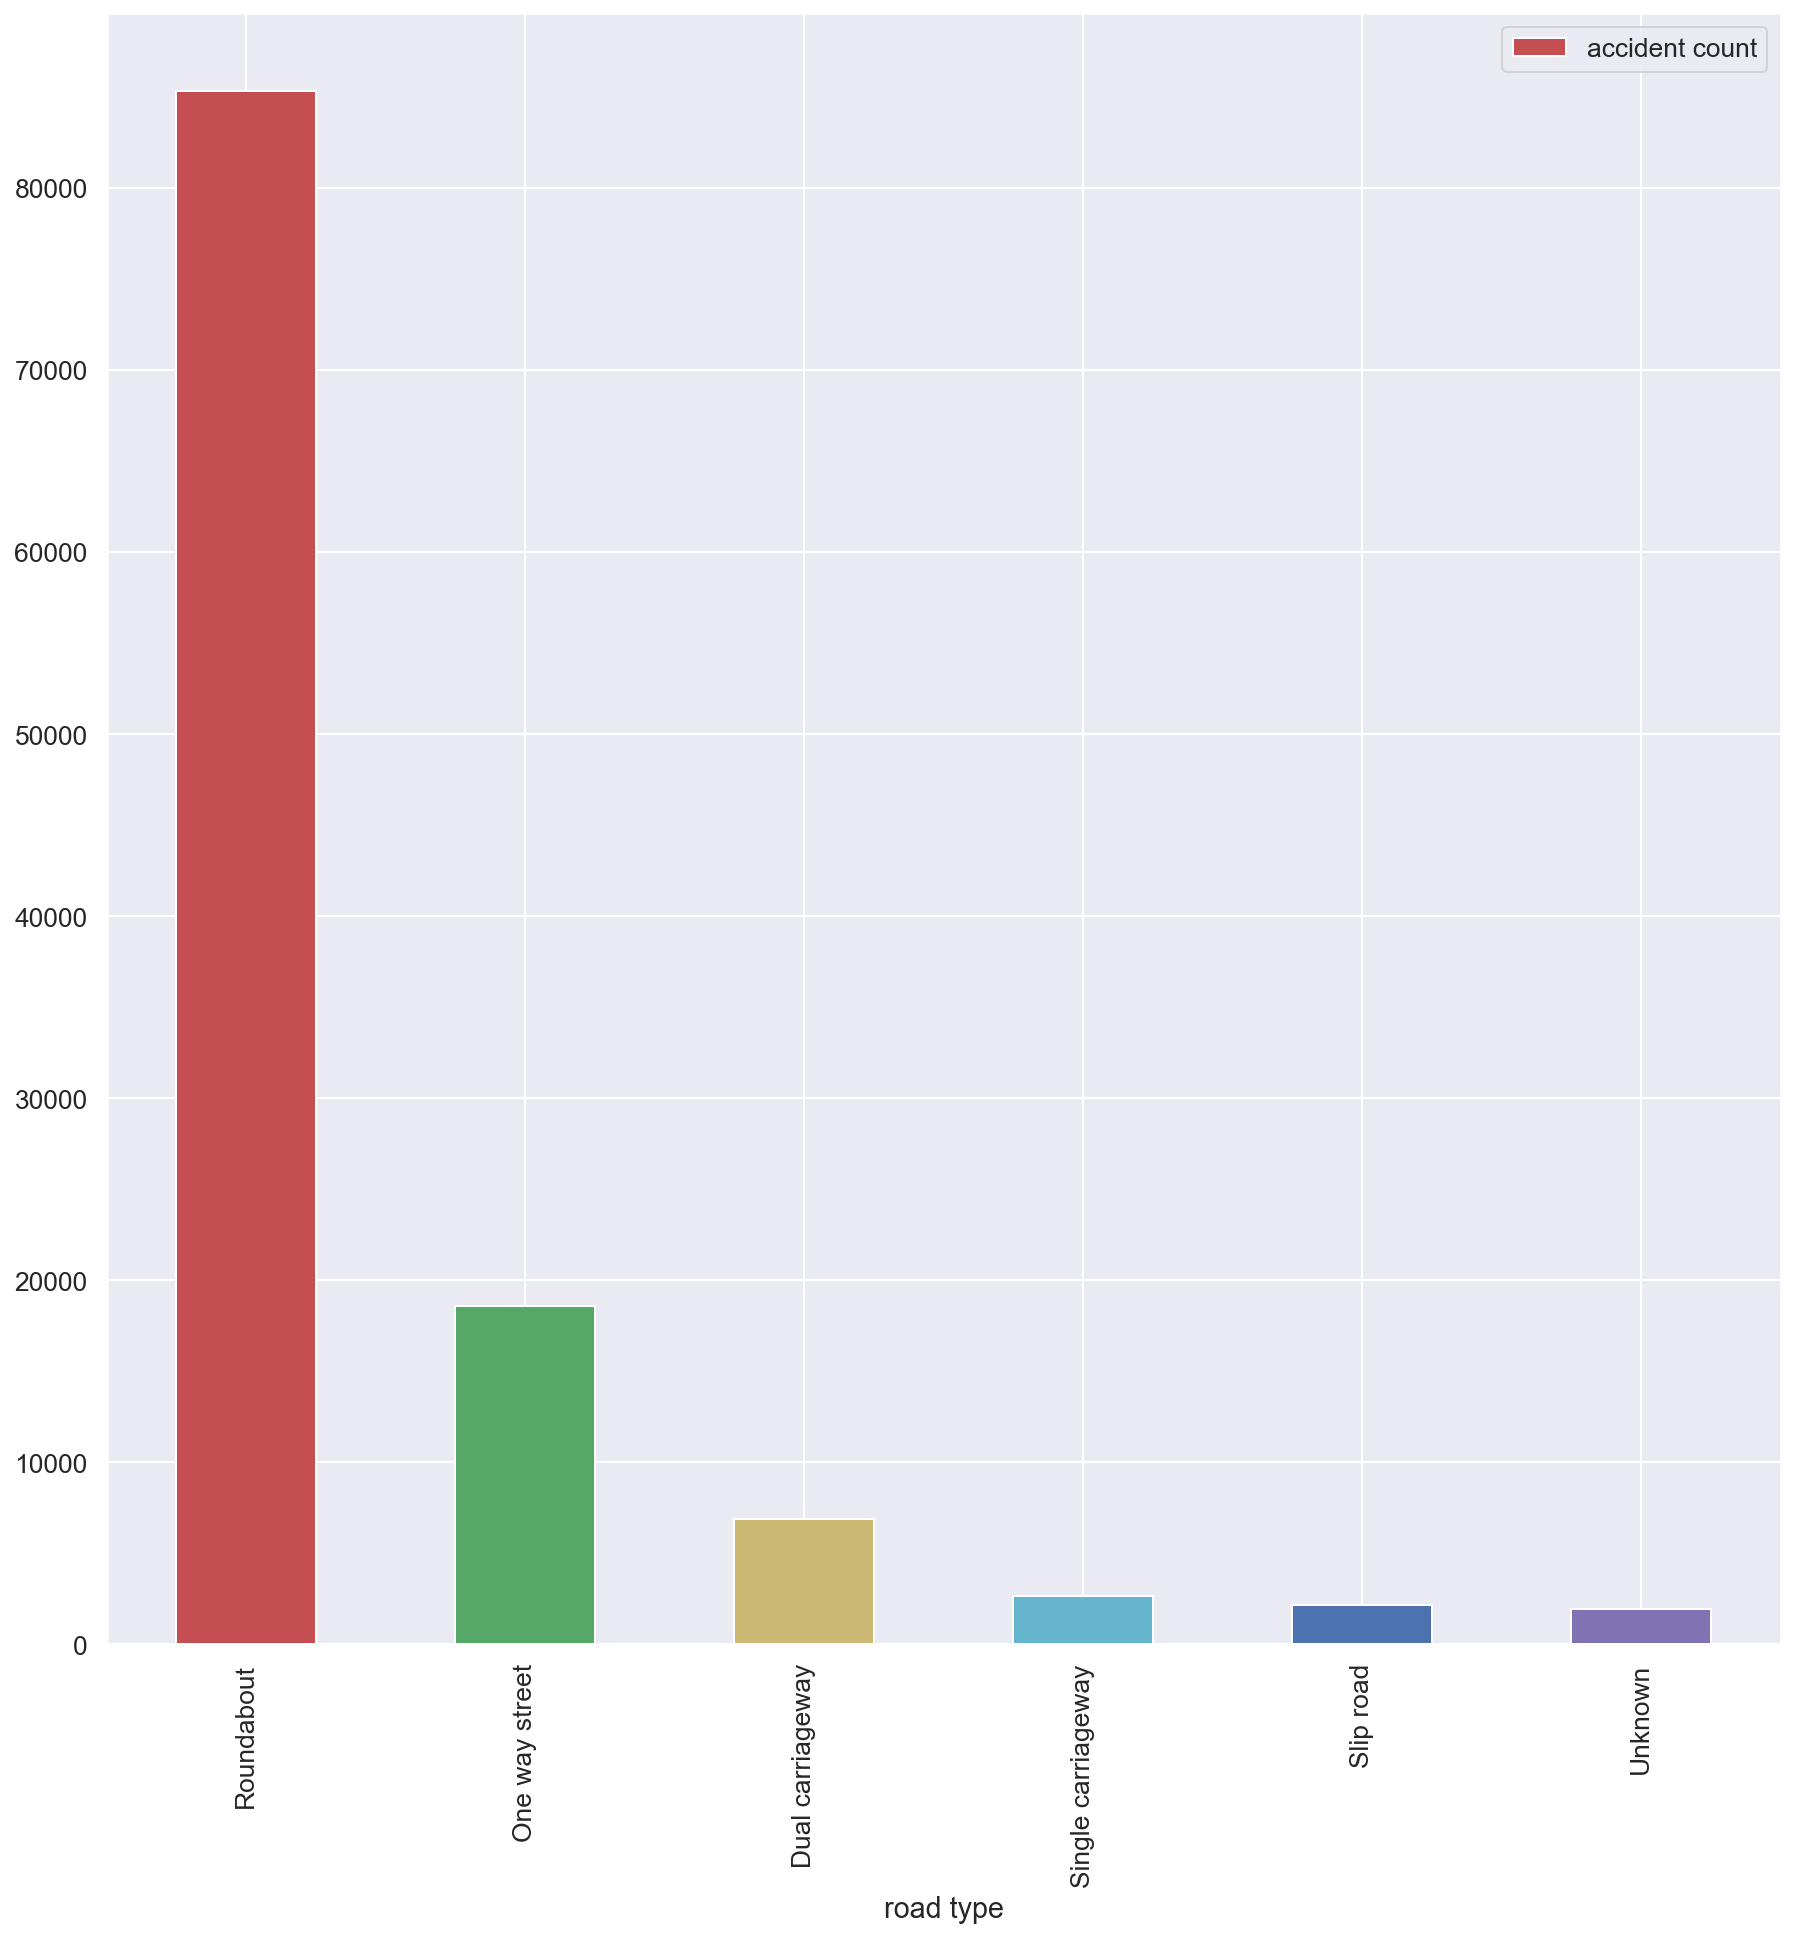

In [124]:
labels=['Roundabout','One way street','Dual carriageway',
           'Single carriageway','Slip road','Unknown',]
plt.figure(figsize=(12,6))
road_type_accidents['road type']= labels
road_type_accidents.plot(x='road type', y='accident count', kind='bar',color=['r','g','y','c','b','m'])
plt.show()

In [125]:
# creating environmental factors and accidents
weather_conditions = Accidents['Weather_Conditions'].value_counts()
weather_conditions = pd.DataFrame(weather_conditions)
weather_conditions = weather_conditions.reset_index()
weather_conditions = weather_conditions.rename({'index':'weather_condition','Weather_Conditions':'accident count'}, axis=1)
weather_conditions

weather_condition  accident count
0                  1           92316
1                  2           15294
2                  9            3436
3                  8            3043
4                  5            1430
5                  4            1230
6                  7             394
7                  3             353
8                  6              40

<Figure size 576x288 with 0 Axes>

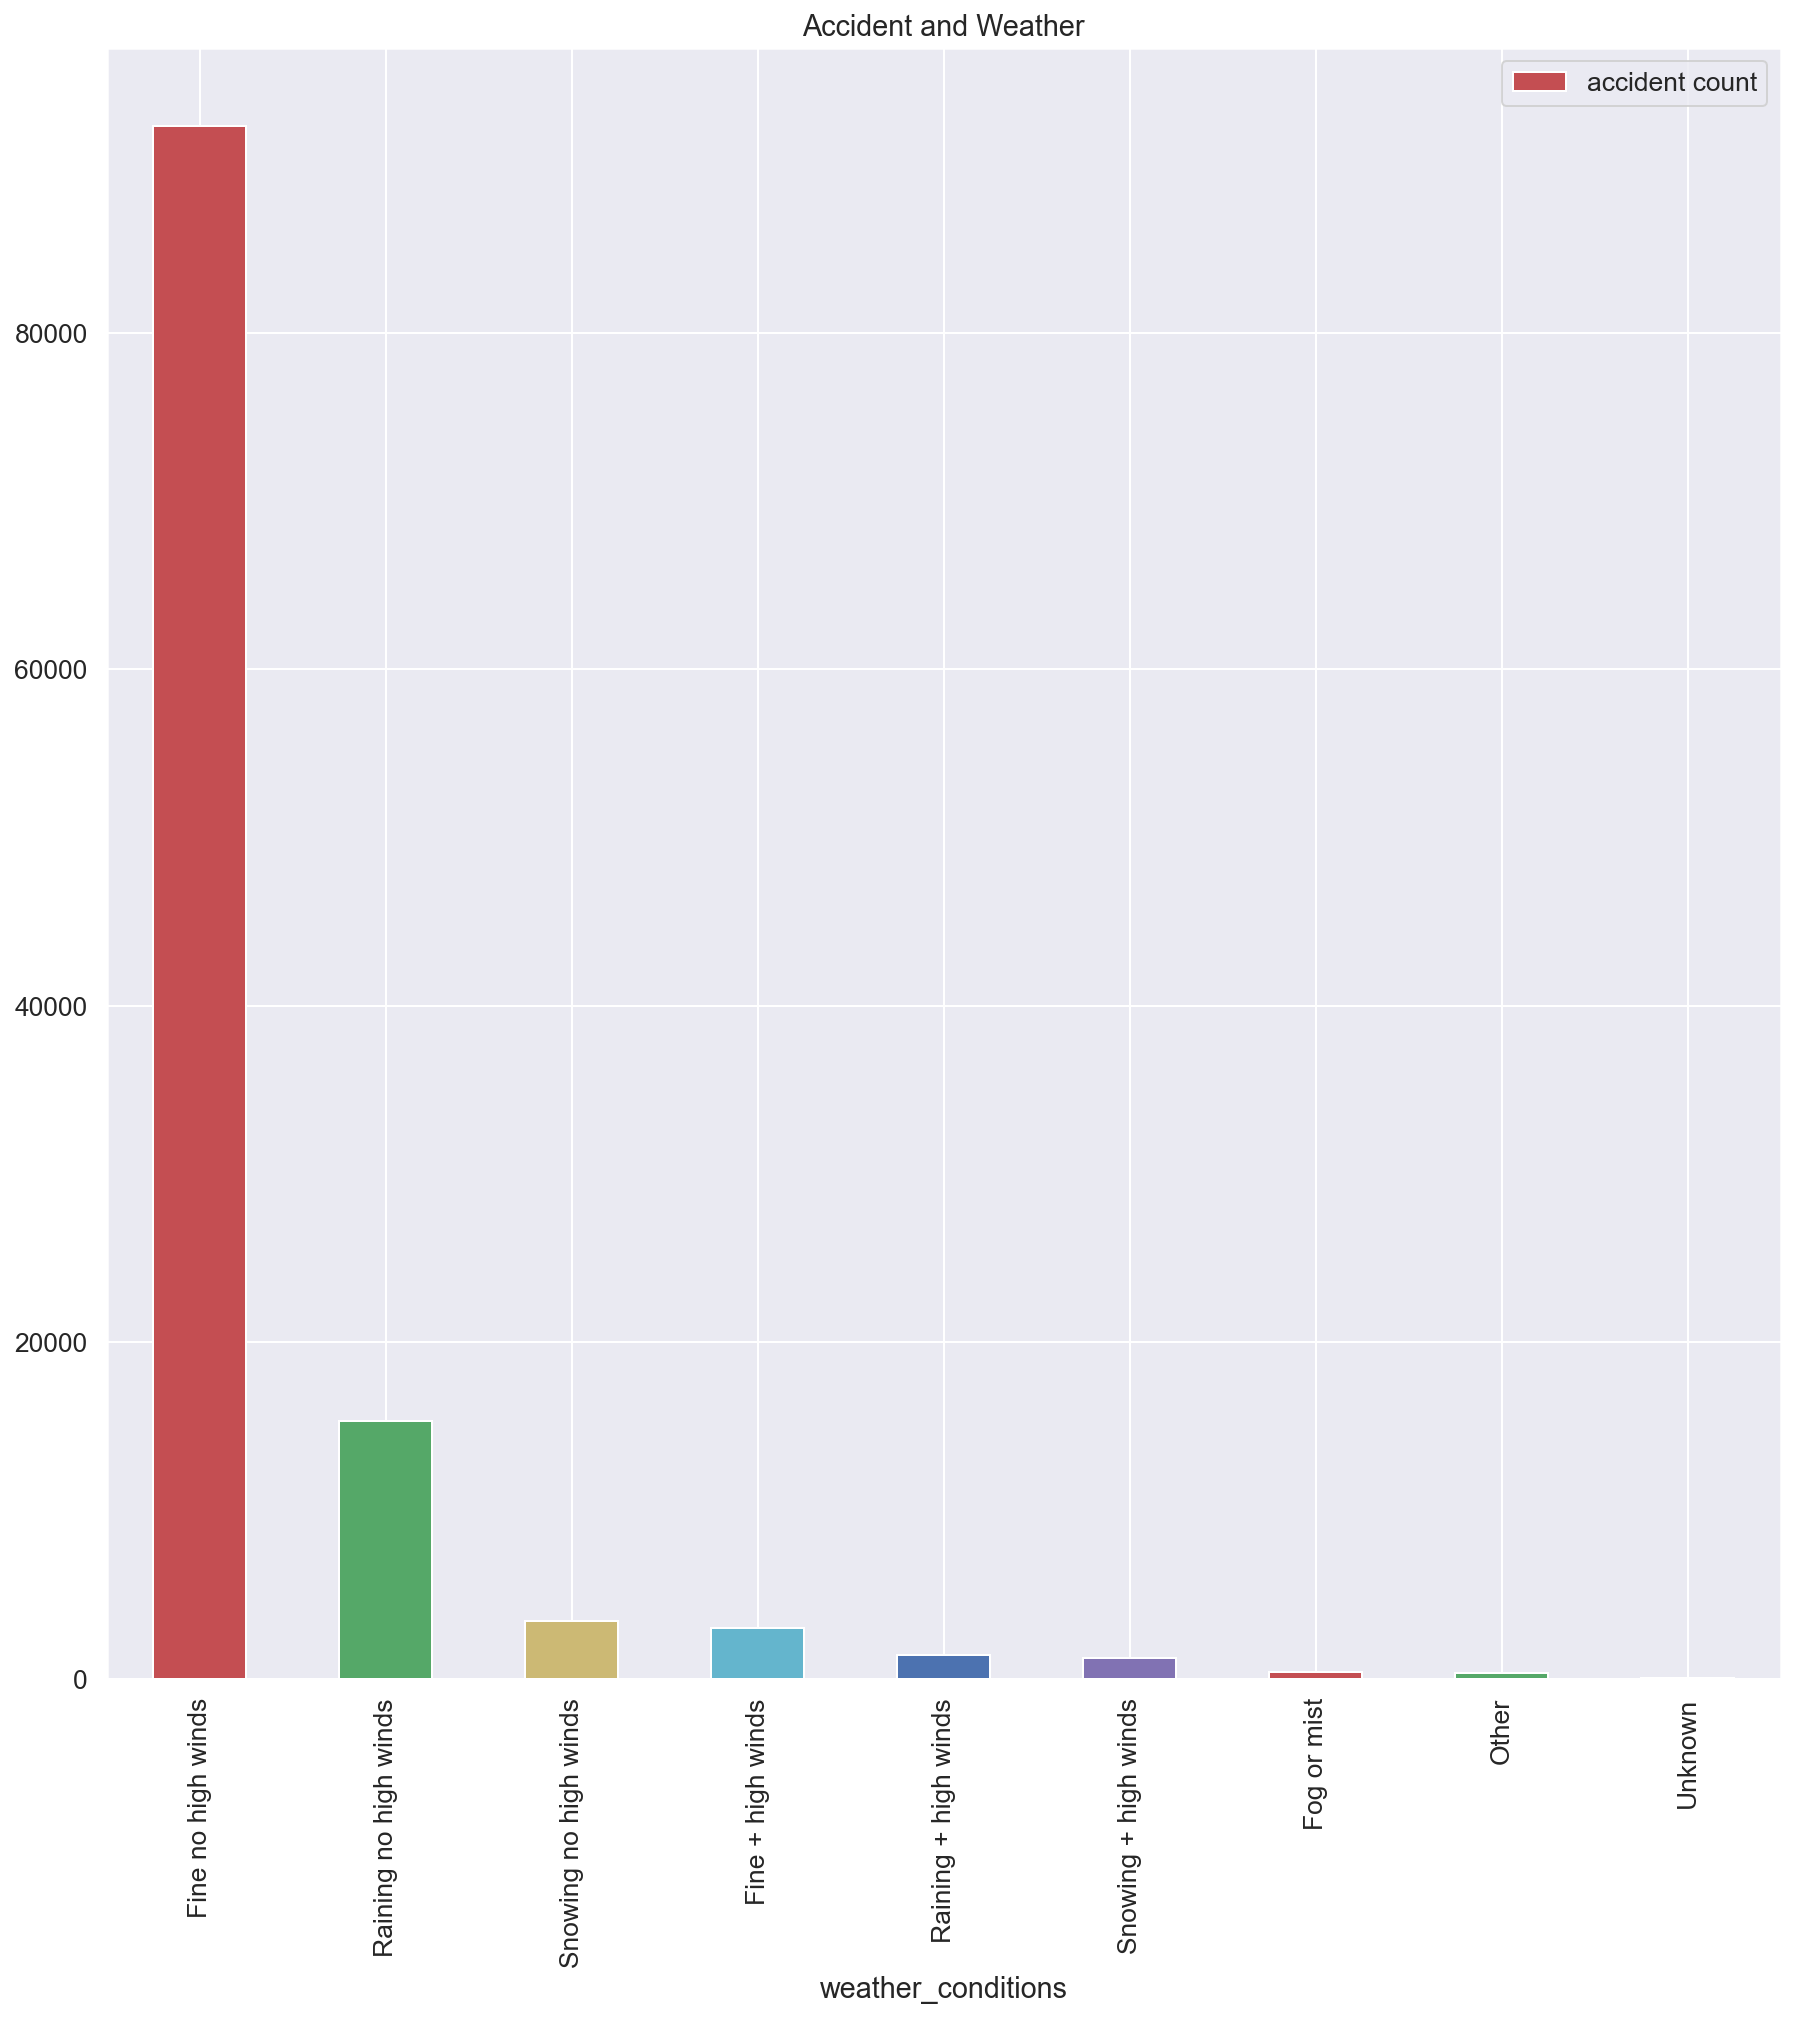

In [126]:
#plotting the graph of weather situations
labels = ['Fine no high winds','Raining no high winds','Snowing no high winds',
          'Fine + high winds','Raining + high winds','Snowing + high winds',
          'Fog or mist','Other','Unknown']
plt.figure(figsize=(8,4))
weather_conditions['weather_conditions']= labels
weather_conditions.plot(x='weather_conditions', y='accident count', kind='bar',color=['r','g','y','c','b','m'])
plt.title('Accident and Weather')
plt.show()

In [127]:
#extracting Accidents and light conditions data
lighting = Accidents['Light_Conditions'].value_counts()
lighting = pd.DataFrame(lighting)
lighting = lighting.reset_index()
lighting = lighting.rename({
    'index':'light_condition','Light_Conditions':'accident count'}, axis=1)
lighting

light_condition  accident count
0                      Daylight           83511
1         Darkness - lights lit           24407
2        Darkness - no lighting            6092
3   Darkness - lighting unknown            2634
4       Darkness - lights unlit             891
5  Data missing or out of range               1

<Figure size 864x360 with 0 Axes>

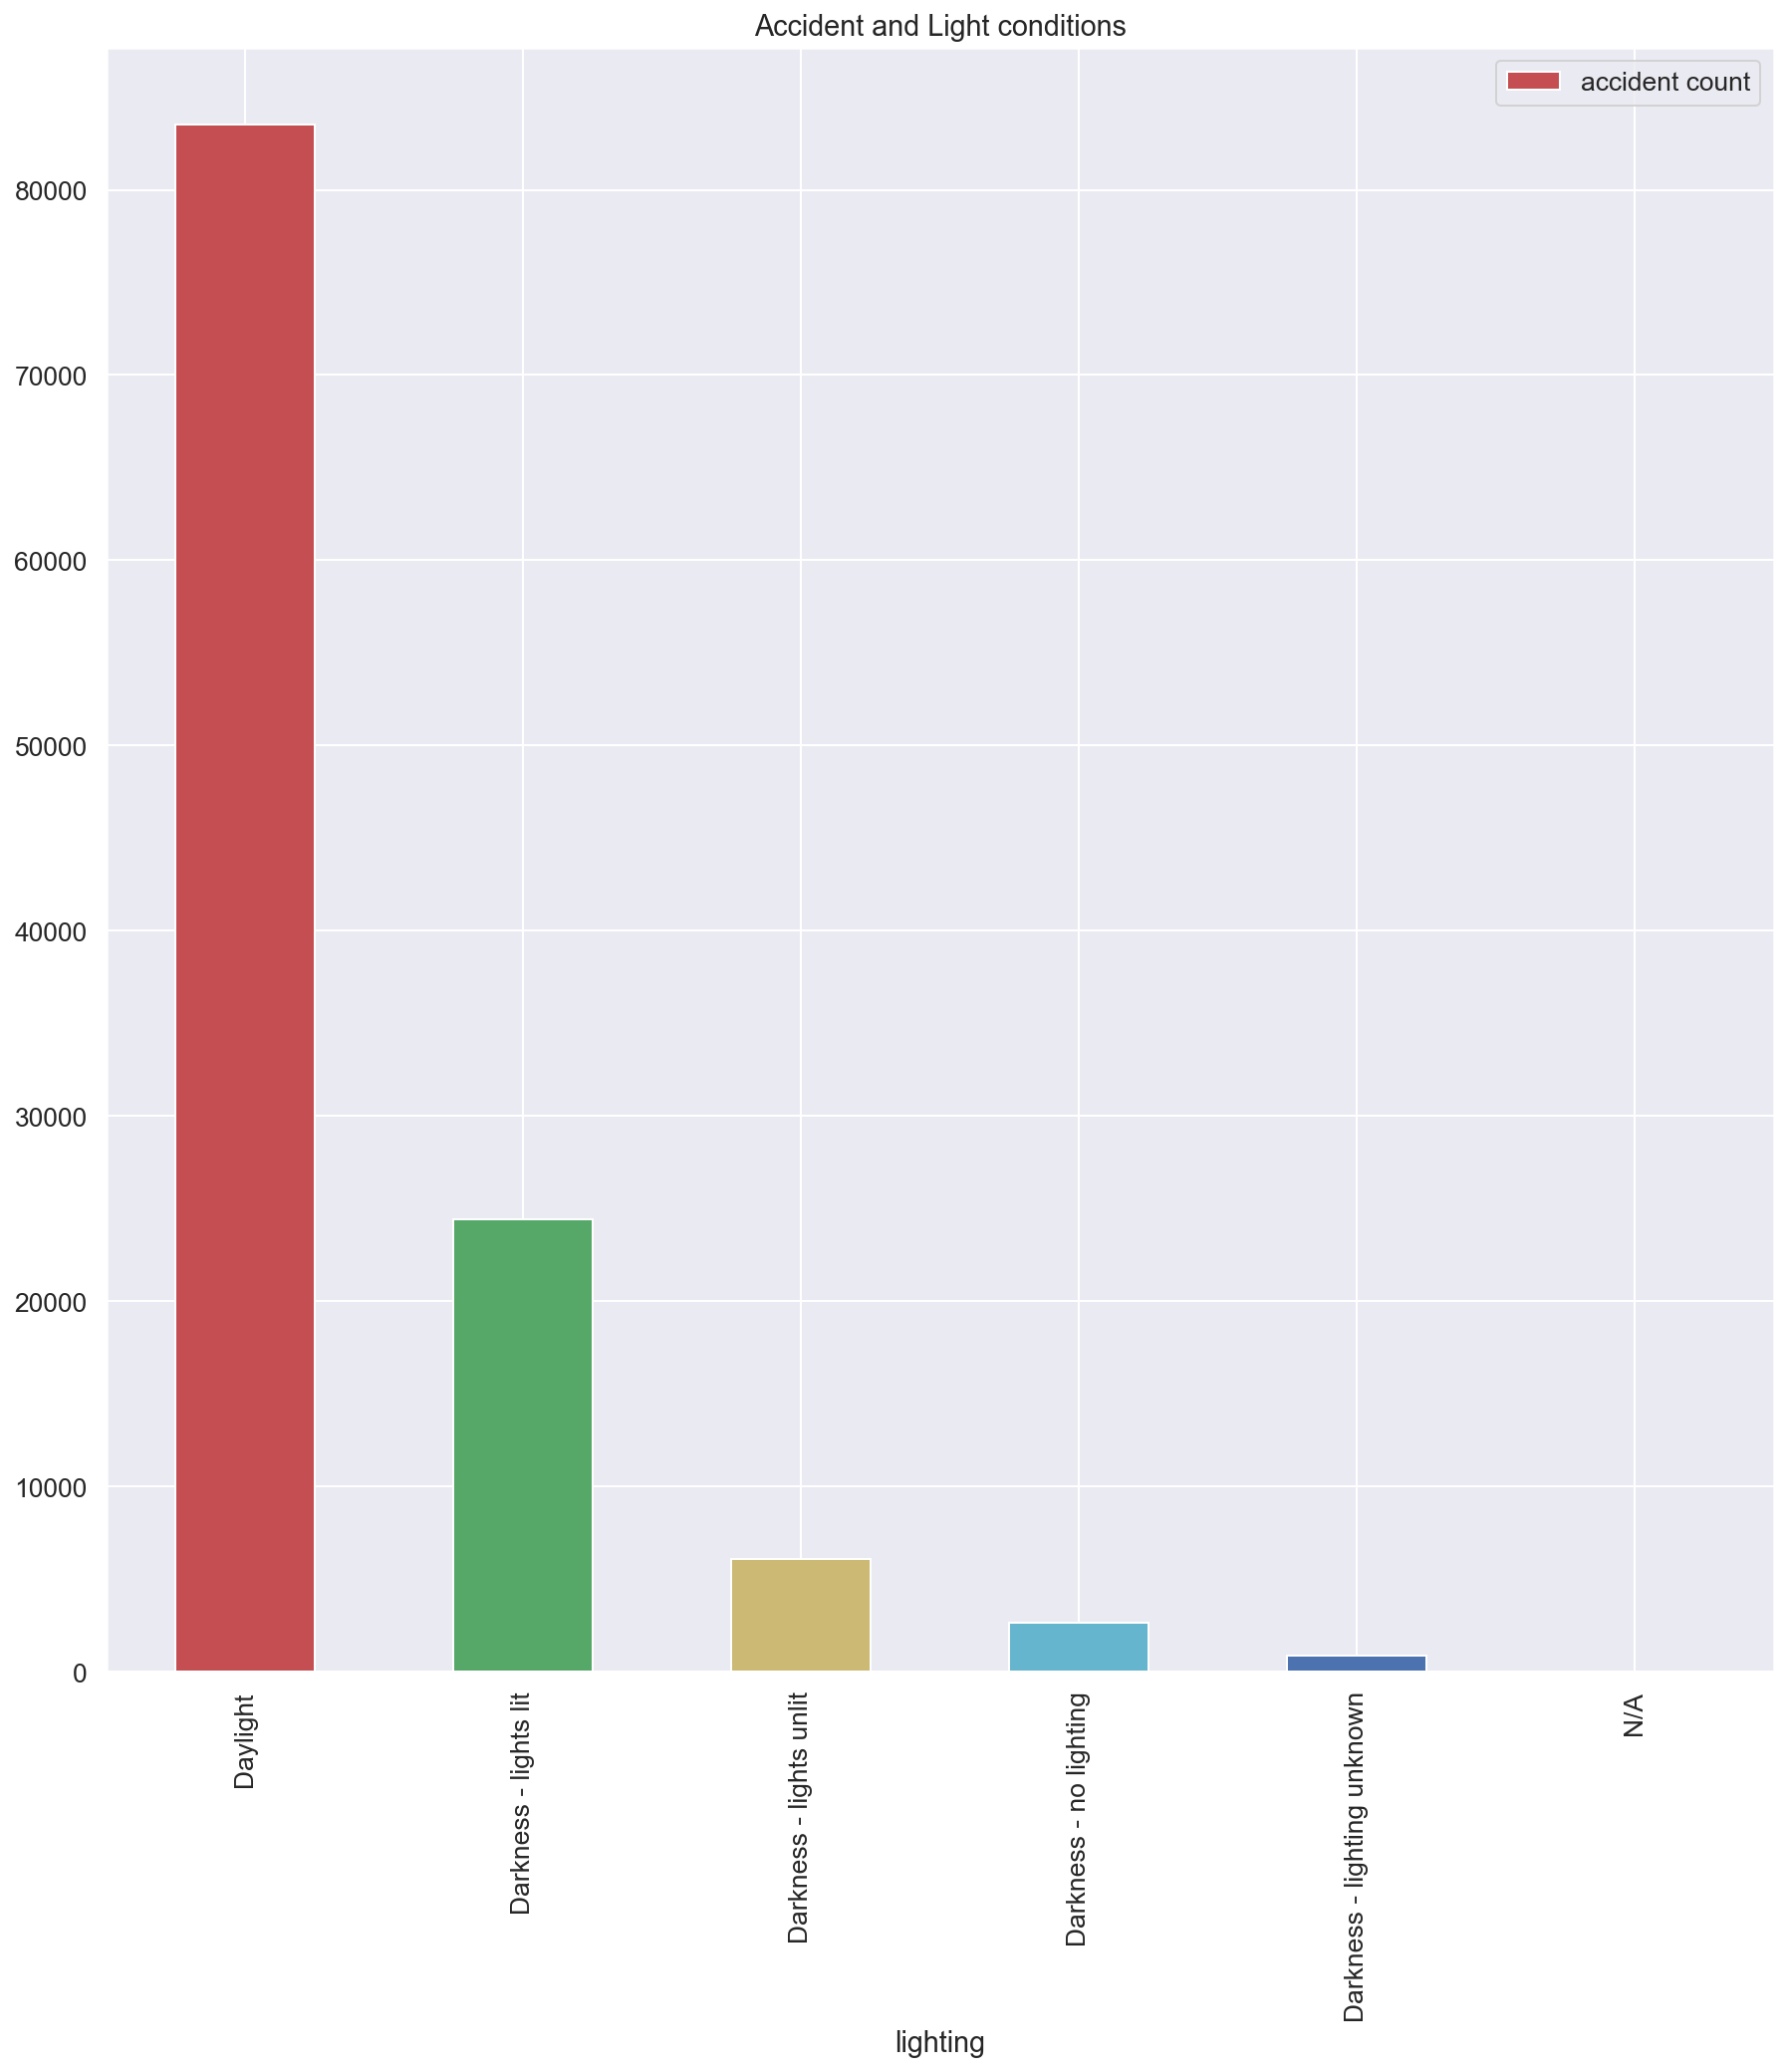

In [128]:
labels = ['Daylight','Darkness - lights lit','Darkness - lights unlit',
          'Darkness - no lighting','Darkness - lighting unknown','N/A']
plt.figure(figsize=(12,5))
#sns.barplot(data=lighting, y=lighting['accident count'],
#           x=lighting['light_condition'])
#plt.xticks(ticks=lighting['light_condition'],labels=labels,rotation=-25,
#          ha='left', rotation_mode='anchor')
lighting['lighting']= labels
lighting.plot(x='lighting', y='accident count', kind='bar',color=['r','g','y','c','b','m'])
plt.title('Accident and Light conditions')
plt.show()

#### (g) Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?

In [129]:
condition_for_accidents=vehicle_accident_type_modelled.loc[:, vehicle_accident_type_modelled.columns.intersection(['Speed_limit','Weather_Conditions'])]
#condition_for_accidents = condition_for_accidents['Speed_limit'].replace("MPH", "0.0", regex=True)
condition_for_accidents

Speed_limit  Weather_Conditions
0                30                   1
1                30                   1
2                30                   1
3                30                   1
4                30                   1
...             ...                 ...
143238           60                   1
143239           60                   1
143240           60                   1
143241           60                   1
143242           30                   1

[143243 rows x 2 columns]

In [130]:
condition_for_accidents

Speed_limit  Weather_Conditions
0                30                   1
1                30                   1
2                30                   1
3                30                   1
4                30                   1
...             ...                 ...
143238           60                   1
143239           60                   1
143240           60                   1
143241           60                   1
143242           30                   1

[143243 rows x 2 columns]

In [131]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(condition_for_accidents)

KMeans(n_clusters=6)

In [132]:
labels = kmeans.predict(condition_for_accidents)
centroids = kmeans.cluster_centers_
labels
centroids

array([[30.        ,  1.6805192 ],
       [60.        ,  1.62109464],
       [19.85214663,  1.82934109],
       [40.        ,  1.5620283 ],
       [70.        ,  1.58578352],
       [50.        ,  1.55084359]])

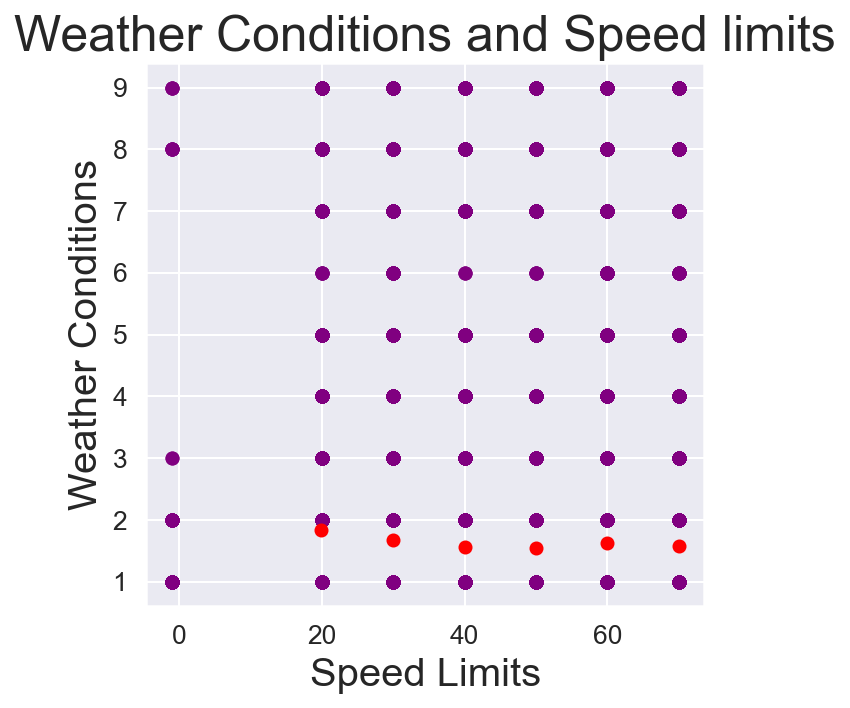

In [133]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
plt.scatter(vehicle_accident_type_modelled['Speed_limit'],vehicle_accident_type_modelled['Weather_Conditions'],color="purple")
plt.scatter(centroids[:,0],centroids[:,1],color="red")
plt.xlabel('Speed Limits',fontdict = {'fontsize' : 20})
plt.ylabel('Weather Conditions',fontdict = {'fontsize' : 20})
plt.title('Weather Conditions and Speed limits', fontdict = {'fontsize' : 25})
plt.show()

In [134]:
columns = ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Police_Force', 'Accident_Severity','Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week','Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)','1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class','2nd_Road_Number', 'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions','Special_Conditions_at_Site', 'Carriageway_Hazards','Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','LSOA_of_Accident_Location',  'decimal_time']
casualties1 = Accidents.drop(columns, axis=1)
casualties1

Longitude   Latitude      Converted_Time  East_North_OSGR
0       -0.153842  51.508057 2022-05-16 17:50:00         708625.0
1       -0.127949  51.436208 2022-05-16 21:45:00         702682.0
2       -0.124193  51.526795 2022-05-16 01:50:00         712765.0
3       -0.191044  51.546387 2022-05-16 01:20:00         710136.0
4       -0.200064  51.541121 2022-05-16 00:40:00         708924.0
...           ...        ...                 ...              ...
117531  -3.368899  55.047323 2022-05-16 01:00:00         886027.0
117532  -2.983499  55.215407 2022-05-16 08:46:00         929204.0
117533  -3.274645  54.991685 2022-05-16 15:30:00         885631.0
117534  -2.997491  55.148292 2022-05-16 14:10:00         920751.0
117535  -3.715064  55.357237 2022-05-16 12:45:00         899731.0

[117536 rows x 4 columns]

In [135]:
columns2=['Converted_Time','month']
casualties2 = casualties1.drop('Converted_Time', axis=1)
casualties2

Longitude   Latitude  East_North_OSGR
0       -0.153842  51.508057         708625.0
1       -0.127949  51.436208         702682.0
2       -0.124193  51.526795         712765.0
3       -0.191044  51.546387         710136.0
4       -0.200064  51.541121         708924.0
...           ...        ...              ...
117531  -3.368899  55.047323         886027.0
117532  -2.983499  55.215407         929204.0
117533  -3.274645  54.991685         885631.0
117534  -2.997491  55.148292         920751.0
117535  -3.715064  55.357237         899731.0

[117536 rows x 3 columns]

In [136]:
casualties3 = casualties2.drop('East_North_OSGR', axis=1)
casualties3

Longitude   Latitude
0       -0.153842  51.508057
1       -0.127949  51.436208
2       -0.124193  51.526795
3       -0.191044  51.546387
4       -0.200064  51.541121
...           ...        ...
117531  -3.368899  55.047323
117532  -2.983499  55.215407
117533  -3.274645  54.991685
117534  -2.997491  55.148292
117535  -3.715064  55.357237

[117536 rows x 2 columns]

In [137]:
kmeans=KMeans(n_clusters=30)
kmeans.fit(casualties3)

KMeans(n_clusters=30)

In [138]:
labels = kmeans.predict(casualties3)
centroids = kmeans.cluster_centers_

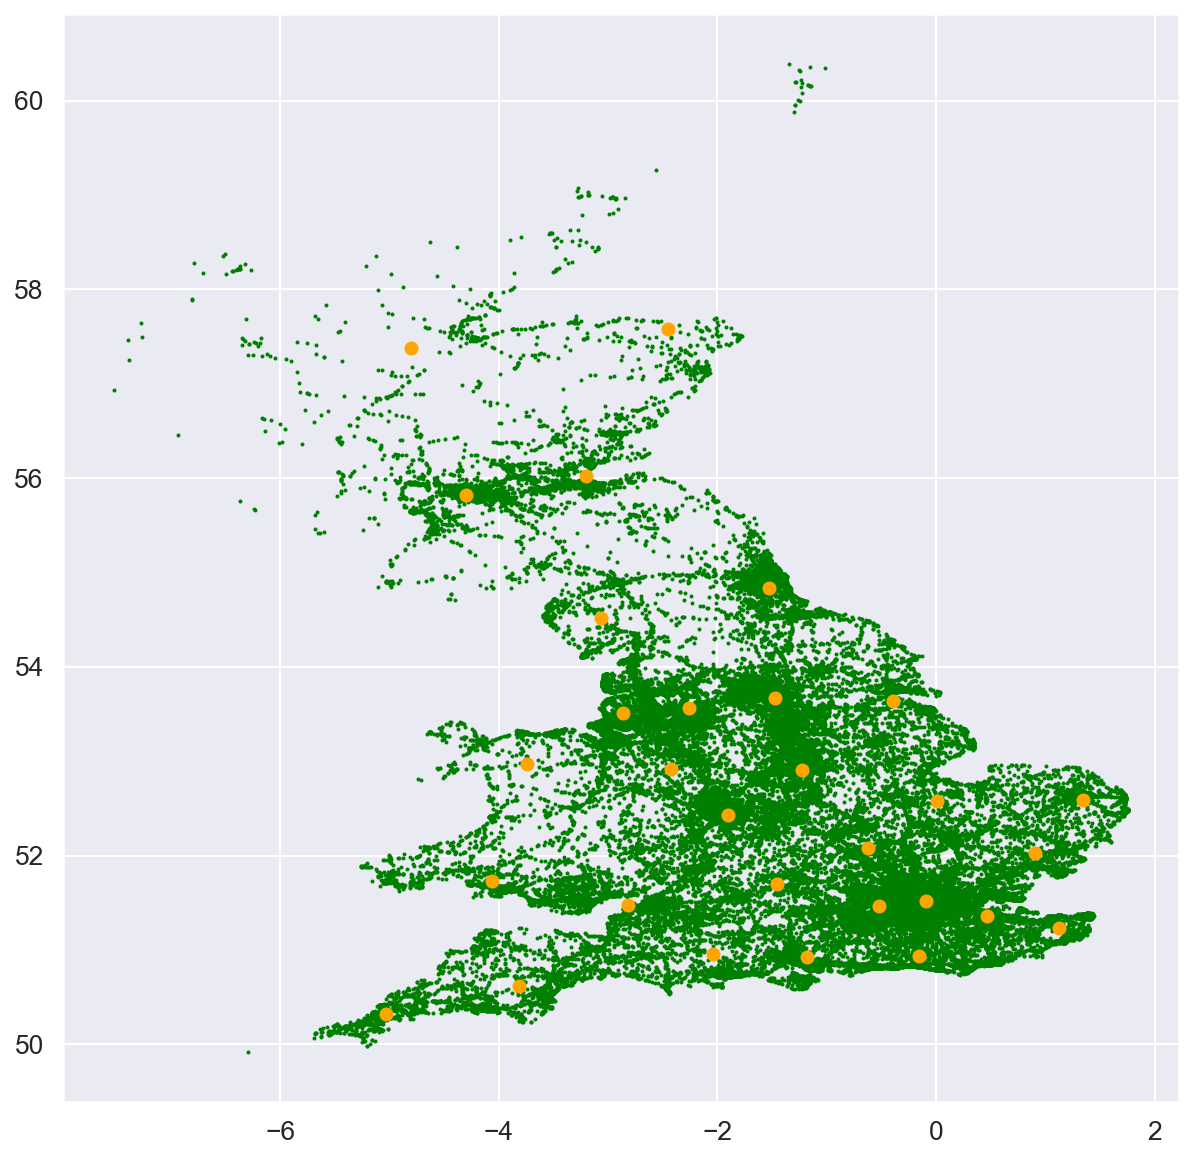

In [139]:
#plotting the graph of accidents in geographical location
fig = plt.figure(figsize=(10,10))
colors = map(lambda x: colmap[x+10], labels)
plt.scatter(casualties3["Longitude"],casualties3["Latitude"],color="green",s=1)
plt.scatter(centroids[:,0],centroids[:,1],color="orange")
plt.show()

In [140]:
kmeans.inertia_

10690.973702956162

In [141]:
#creating variables for association and support rules
Dummy1 = pd.get_dummies(Accidents.Accident_Severity, prefix='Severity')
Dummy2 = pd.get_dummies(Accidents.Speed_limit, prefix='Speed Limit')
Dummy3 = pd.get_dummies(Accidents.Weather_Conditions, prefix='Weather Conditions')

In [142]:
frames=[Dummy1,Dummy2,Dummy3]
Dummy_123=pd.concat(frames,axis=1)
Dummy_123

Severity_Fatal  Severity_Serious  Severity_Slight  Speed Limit_20 MPH  \
0                    0                 0                1                   0   
1                    0                 0                1                   0   
2                    0                 0                1                   0   
3                    0                 1                0                   1   
4                    0                 0                1                   0   
...                ...               ...              ...                 ...   
117531               0                 0                1                   0   
117532               0                 0                1                   0   
117533               0                 0                1                   0   
117534               0                 0                1                   0   
117535               0                 1                0                   0   

        Speed Limit_30 MPH  Speed Limit_40 MPH  Speed Limit_50 MPH  \
0                        1                   0                   0   
1                        1                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        1                   0                   0   
...                    ...                 ...                 ...   
117531                   0                   0                   0   
117532                   0                   0                   0   
117533                   0                   0                   0   
117534                   1                   0                   0   
117535                   0                   0                   0   

        Speed Limit_60 MPH  Speed Limit_70 MPH  \
0                        0                   0   
1                        0                   0   
2                        0                   0   
3                        0                   0   
4                        0                   0   
...                    ...                 ...   
117531                   1                   0   
117532                   1                   0   
117533                   1                   0   
117534                   0                   0   
117535                   1                   0   

        Speed Limit_Data missing or out of range  Weather Conditions_1  \
0                                              0                     1   
1                                              0                     1   
2                                              0                     1   
3                                              0                     1   
4                                              0                     1   
...                                          ...                   ...   
117531                                         0                     1   
117532                                         0                     1   
117533                                         0                     1   
117534                                         0                     1   
117535                                         0                     1   

        Weather Conditions_2  Weather Conditions_3  Weather Conditions_4  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   
...                      ...                   ...                   ...   
117531                     0                     0                     0   
117532                     0                     0                     0   
117533              

In [143]:
apriori(Dummy_123,min_support=0.4,use_colnames=True)

support                                    itemsets
0  0.786619                           (Severity_Slight)
1  0.589649                        (Speed Limit_30 MPH)
2  0.785427                      (Weather Conditions_1)
3  0.474459       (Speed Limit_30 MPH, Severity_Slight)
4  0.614169     (Weather Conditions_1, Severity_Slight)
5  0.465236  (Speed Limit_30 MPH, Weather Conditions_1)

In [144]:
frequent_itemset=apriori(Dummy_123,min_support=0.2,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=0.5)
rules

antecedents  \
0                         (Speed Limit_30 MPH)   
1                            (Severity_Slight)   
2                       (Weather Conditions_1)   
3                            (Severity_Slight)   
4                         (Speed Limit_30 MPH)   
5                       (Weather Conditions_1)   
6   (Speed Limit_30 MPH, Weather Conditions_1)   
7        (Speed Limit_30 MPH, Severity_Slight)   
8      (Weather Conditions_1, Severity_Slight)   
9                         (Speed Limit_30 MPH)   
10                      (Weather Conditions_1)   
11                           (Severity_Slight)   

                                   consequents  antecedent support  \
0                            (Severity_Slight)            0.589649   
1                         (Speed Limit_30 MPH)            0.786619   
2                            (Severity_Slight)            0.785427   
3                       (Weather Conditions_1)            0.786619   
4                       (Weather Conditions_1)            0.589649   
5                         (Speed Limit_30 MPH)            0.785427   
6                            (Severity_Slight)            0.465236   
7                       (Weather Conditions_1)            0.474459   
8                         (Speed Limit_30 MPH)            0.614169   
9      (Weather Conditions_1, Severity_Slight)            0.589649   
10       (Speed Limit_30 MPH, Severity_Slight)            0.785427   
11  (Speed Limit_30 MPH, Weather Conditions_1)            0.786619   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.786619  0.474459    0.804646  1.022918  0.010630    1.092282  
1             0.589649  0.474459    0.603163  1.022918  0.010630    1.034053  
2             0.786619  0.614169    0.781955  0.994072 -0.003663    0.978614  
3             0.785427  0.614169    0.780771  0.994072 -0.003663    0.978762  
4             0.785427  0.465236    0.789005  1.004555  0.002110    1.016956  
5             0.589649  0.465236    0.592335  1.004555  0.002110    1.006588  
6             0.786619  0.373239    0.802257  1.019880  0.007275    1.079083  
7             0.785427  0.373239    0.786662  1.001572  0.000586    1.005787  
8             0.589649  0.373239    0.607713  1.030635  0.011094    1.046048  
9             0.614169  0.373239    0.632985  1.030635  0.011094    1.051266  
10            0.474459  0.373239    0.475205  1.001572  0.000586    1.001421  
11            0.465236  0.373239    0.474485  1.019880  0.007275    1.017600

#### (h) How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

In [145]:
Vehicles.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'],
      dtype='object')

In [146]:
#Merging accident dataframe with vehicles dataframe to get the relevant information on motorbikes
driver = Accidents.merge(Vehicles,on='Accident_Index',how='inner')


In [147]:
driver

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010128300               528218.0                180407.0   
2       2019010152270               530219.0                172463.0   
3       2019010152270               530219.0                172463.0   
4       2019010155191               530222.0                182543.0   
...               ...                    ...                     ...   
175660  2019984107019               337522.0                591682.0   
175661  2019984107219               318544.0                567087.0   
175662  2019984107219               318544.0                567087.0   
175663  2019984107419               336525.0                584226.0   
175664  201998QC01004               291367.0                608364.0   

        Longitude   Latitude           Police_Force Accident_Severity  \
0       -0.153842  51.508057    Metropolitan Police            Slight   
1       -0.153842  51.508057    Metropolitan Police            Slight   
2       -0.127949  51.436208    Metropolitan Police            Slight   
3       -0.127949  51.436208    Metropolitan Police            Slight   
4       -0.124193  51.526795    Metropolitan Police            Slight   
...           ...        ...                    ...               ...   
175660  -2.983499  55.215407  Dumfries and Galloway            Slight   
175661  -3.274645  54.991685  Dumfries and Galloway            Slight   
175662  -3.274645  54.991685  Dumfries and Galloway            Slight   
175663  -2.997491  55.148292  Dumfries and Galloway            Slight   
175664  -3.715064  55.357237  Dumfries and Galloway           Serious   

        Number_of_Vehicles  Number_of_Casualties       Date  ...  \
0                        2                     3 2019-02-18  ...   
1                        2                     3 2019-02-18  ...   
2                        2                     1 2019-01-15  ...   
3                        2                     1 2019-01-15  ...   
4                        2                     1 2019-01-01  ...   
...                    ...                   ...        ...  ...   
175660                   4                     1 2019-05-30  ...   
175661                   2                     1 2019-06-21  ...   
175662                   2                     1 2019-06-21  ...   
175663                   1                     1 2019-06-29  ...   
175664                   1                     1 2019-04-21  ...   

       Journey_Purpose_of_Driver Sex_of_Driver Age_of_Driver  \
0                              6             1            58   
1                              6             3            35   
2                              6             2            24   
3                              6             3            35   
4                              6             1            45   
...                          ...           ...           ...   
175660                         1             1            20   
175661                         6             1            33   
175662                         6             1            61   
175663                         5             1            78   
175664                         6             1            55   

       Age_Band_of_Driver Engine_Capacity_(CC)  Propulsion_Code  \
0                       9                 1242                1   
1                       6                 1242                1   
2                       5                 1242                1   
3                       6                 1242                1   
4                       7                 1242                1   
...                   ...                  ...              ...   
175660                  4                 2198                2   
175661                  6                 1997                2   
175662                  9                 2967                2   
175663   

In [148]:
driver.replace(-1, np.nan, inplace=True)
driver.dropna(inplace=True)

In [149]:
driver = driver.filter( ['Age_of_Driver','Journey_Purpose_of_Driver','Accident_Severity','Sex_of_Driver','Age_of_Vehicle','Driver_Home_Area_Type'], axis=1)
driver

Age_of_Driver  Journey_Purpose_of_Driver Accident_Severity  \
0                  58                          6            Slight   
1                  35                          6            Slight   
4                  45                          6            Slight   
5                  33                          1            Slight   
6                  32                          1           Serious   
...               ...                        ...               ...   
175646             79                          5             Fatal   
175647             29                          1             Fatal   
175661             33                          6            Slight   
175662             61                          6            Slight   
175663             78                          5            Slight   

        Sex_of_Driver  Age_of_Vehicle  Driver_Home_Area_Type  
0                 1.0               4                      1  
1                 3.0               4                      1  
4                 1.0               4                      1  
5                 1.0               4                      1  
6                 1.0               4                      1  
...               ...             ...                    ...  
175646            1.0               7                      2  
175647            1.0               2                      3  
175661            1.0              12                      2  
175662            1.0               5                      3  
175663            1.0               6                      3  

[100260 rows x 6 columns]

In [150]:
driver_new = driver[(driver['Age_of_Driver'] > 0) & (driver['Journey_Purpose_of_Driver'] > 0) & (driver['Sex_of_Driver'] > 0) & (driver['Age_of_Vehicle'] > 0)& (driver['Driver_Home_Area_Type'] > 0)]
driver_new

Age_of_Driver  Journey_Purpose_of_Driver Accident_Severity  \
0                  58                          6            Slight   
1                  35                          6            Slight   
4                  45                          6            Slight   
5                  33                          1            Slight   
6                  32                          1           Serious   
...               ...                        ...               ...   
175646             79                          5             Fatal   
175647             29                          1             Fatal   
175661             33                          6            Slight   
175662             61                          6            Slight   
175663             78                          5            Slight   

        Sex_of_Driver  Age_of_Vehicle  Driver_Home_Area_Type  
0                 1.0               4                      1  
1                 3.0               4                      1  
4                 1.0               4                      1  
5                 1.0               4                      1  
6                 1.0               4                      1  
...               ...             ...                    ...  
175646            1.0               7                      2  
175647            1.0               2                      3  
175661            1.0              12                      2  
175662            1.0               5                      3  
175663            1.0               6                      3  

[100260 rows x 6 columns]

Text(0, 0.5, 'Distribution')

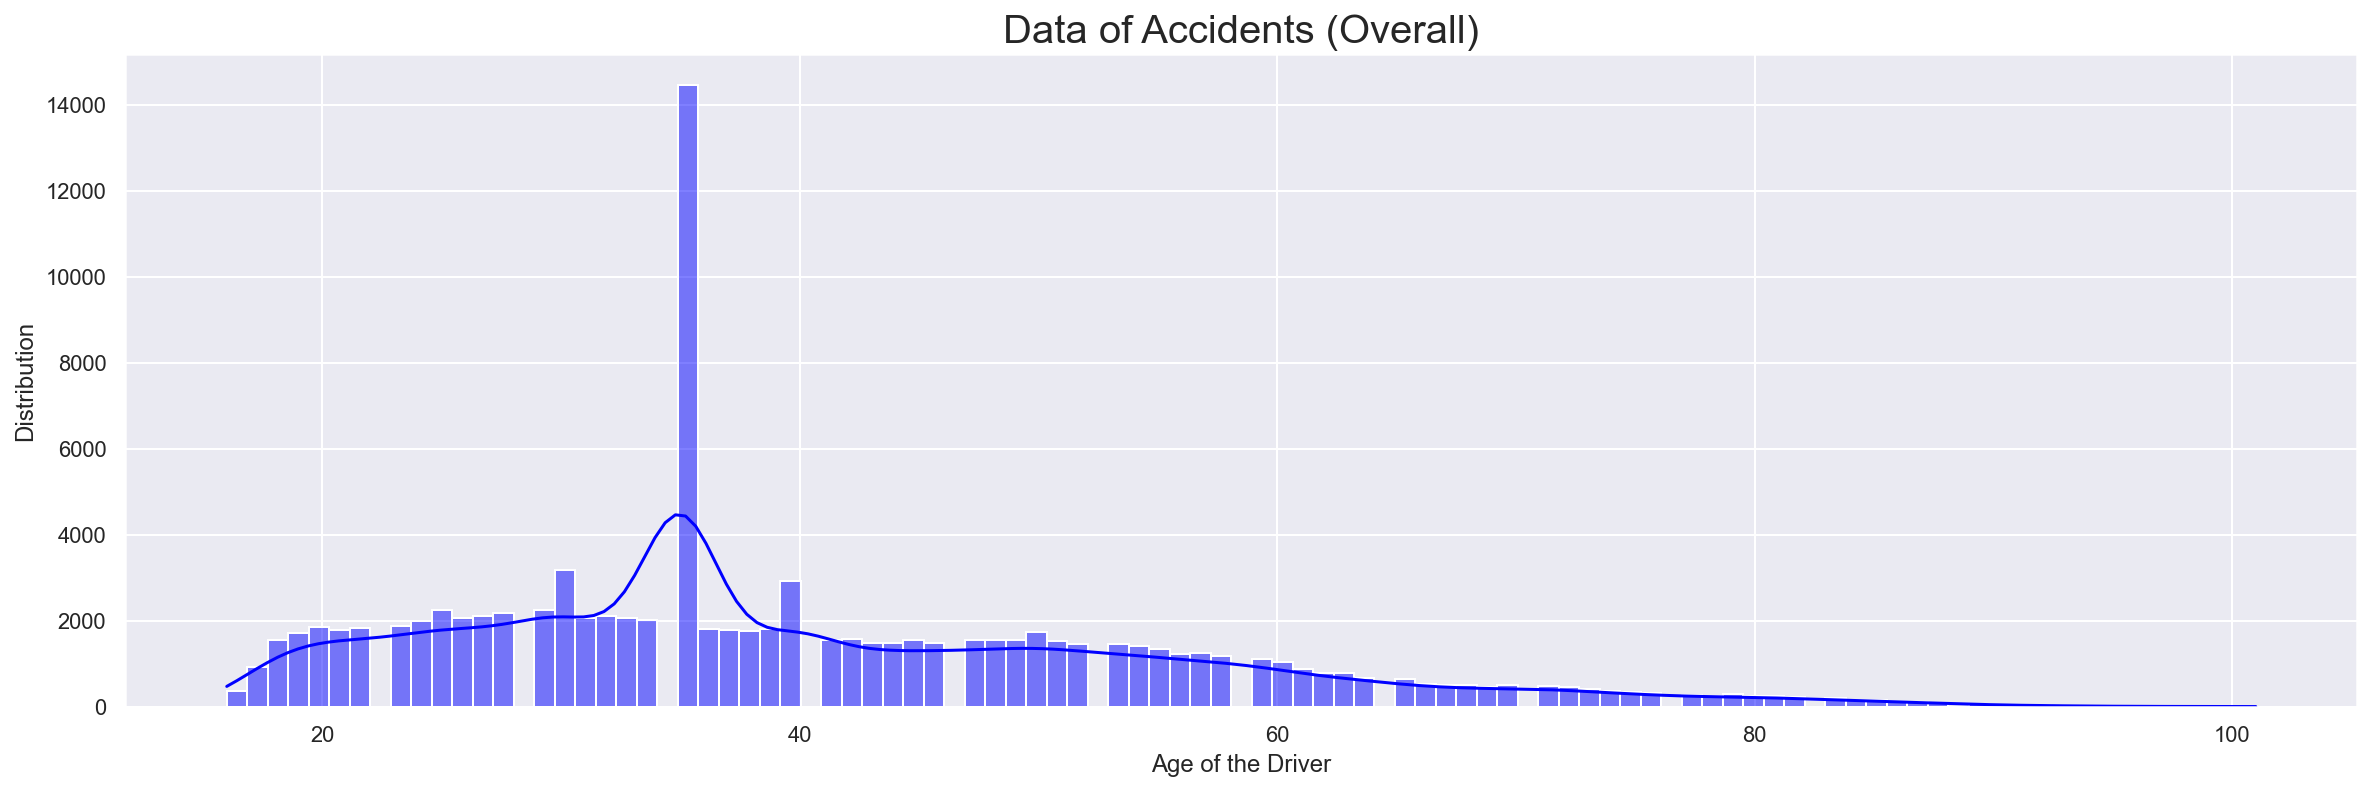

In [151]:
sns.set(rc={'figure.figsize':(20,6)})
sns.color_palette("tab10")
ax=sns.histplot(x='Age_of_Driver', 
                 data=driver,kde=True,cbar=True,color='Blue')
plt.title('Data of Accidents (Overall)',fontsize= 20)
plt.xlabel('Age of the Driver')
plt.ylabel('Distribution')

Text(0.5, 0, 'Purpose')

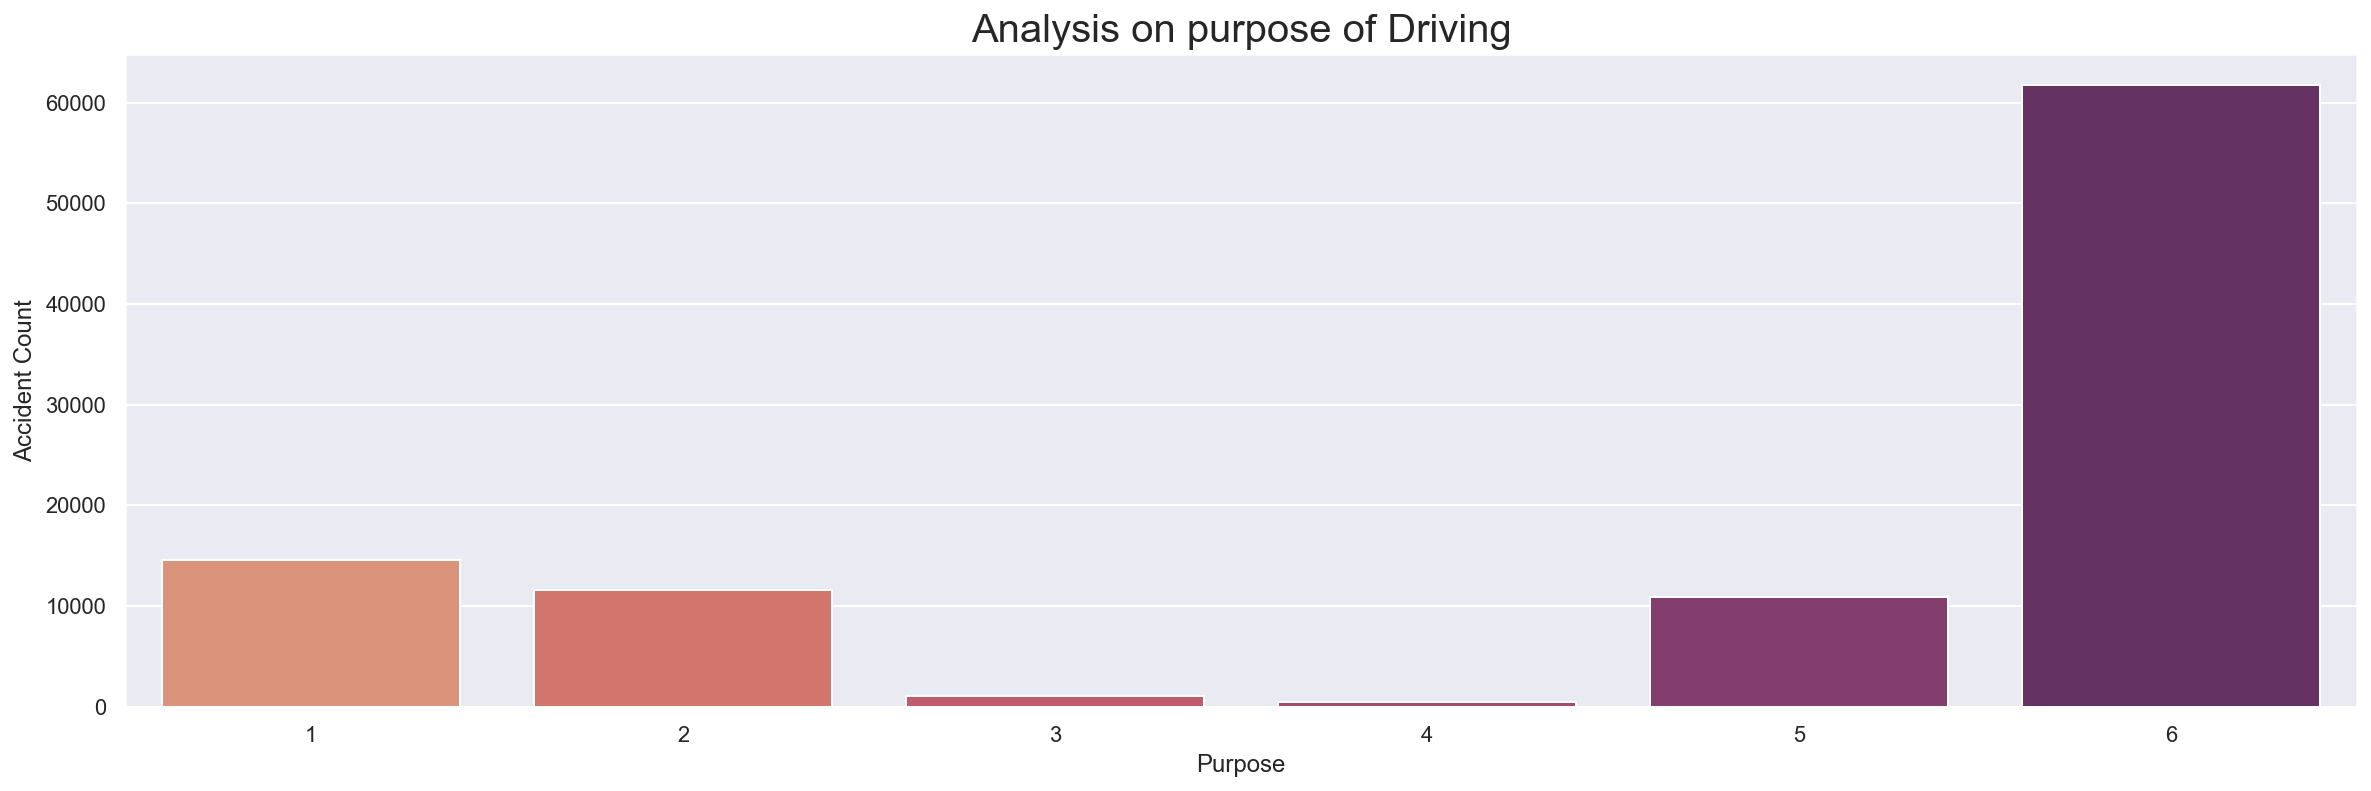

In [152]:
sns.set(rc={'figure.figsize':(20,6)})
sns.color_palette("tab10")
ax=sns.countplot(x='Journey_Purpose_of_Driver', 
                 data=driver,palette="flare",orient='v')
plt.title('Analysis on purpose of Driving',fontsize= 20)

plt.ylabel('Accident Count')
plt.xlabel('Purpose')

#### Applying Machine Learning techniques to predict severity

In [153]:
#Dropping the NULL values for modelling
Accidents_modelled.dropna(axis=True)

Accident_Index  Police_Force  Accident_Severity  Number_of_Vehicles  \
0       2019010128300             1                  3                   2   
1       2019010152270             1                  3                   2   
2       2019010155191             1                  3                   2   
3       2019010155192             1                  2                   1   
4       2019010155194             1                  3                   2   
...               ...           ...                ...                 ...   
117531  2019984106919            98                  3                   1   
117532  2019984107019            98                  3                   4   
117533  2019984107219            98                  3                   2   
117534  2019984107419            98                  3                   1   
117535  201998QC01004            98                  2                   1   

        Number_of_Casualties        Date  Day_of_Week  \
0                          3  18/02/2019            2   
1                          1  15/01/2019            3   
2                          1  01/01/2019            3   
3                          1  01/01/2019            3   
4                          2  01/01/2019            3   
...                      ...         ...          ...   
117531                     1  18/05/2019            7   
117532                     1  30/05/2019            5   
117533                     1  21/06/2019            6   
117534                     1  29/06/2019            7   
117535                     1  21/04/2019            1   

        Local_Authority_(District) Local_Authority_(Highway)  1st_Road_Class  \
0                                1                 E09000033               3   
1                                9                 E09000022               3   
2                                2                 E09000007               4   
3                                2                 E09000007               4   
4                               28                 E09000005               3   
...                            ...                       ...             ...   
117531                         917                 S12000006               4   
117532                         917                 S12000006               3   
117533                         917                 S12000006               4   
117534                         917                 S12000006               6   
117535                         917                 S12000006               3   

        ...  2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0       ...             4202                                  0   
1       ...                0                                 -1   
2       ...                0                                  0   
3       ...              510                                  0   
4       ...                0                                  0   
...     ...              ...                                ...   
117531  ...                0                                  0   
117532  ...                0                                  0   
117533  ...              721                                  0   
117534  ...              723                                  0   
117535  ...                0                                  0   

        Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                             5                 1   
1                                            -1                 4   
2                                             0                 4   
3                                             0                 4   
4                                             0                 4   
...                                         ...               ...   
117531                                        0                 1   
117532                                        0                 1  

In [154]:
Accidents_modelled.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [155]:
Accidents_modelled

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2019010128300               528218.0                180407.0   
1       2019010152270               530219.0                172463.0   
2       2019010155191               530222.0                182543.0   
3       2019010155192               525531.0                184605.0   
4       2019010155194               524920.0                184004.0   
...               ...                    ...                     ...   
117531  2019984106919               312635.0                573392.0   
117532  2019984107019               337522.0                591682.0   
117533  2019984107219               318544.0                567087.0   
117534  2019984107419               336525.0                584226.0   
117535  201998QC01004               291367.0                608364.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057             1                  3   
1       -0.127949  51.436208             1                  3   
2       -0.124193  51.526795             1                  3   
3       -0.191044  51.546387             1                  2   
4       -0.200064  51.541121             1                  3   
...           ...        ...           ...                ...   
117531  -3.368899  55.047323            98                  3   
117532  -2.983499  55.215407            98                  3   
117533  -3.274645  54.991685            98                  3   
117534  -2.997491  55.148292            98                  3   
117535  -3.715064  55.357237            98                  2   

        Number_of_Vehicles  Number_of_Casualties        Date  ...  \
0                        2                     3  18/02/2019  ...   
1                        2                     1  15/01/2019  ...   
2                        2                     1  01/01/2019  ...   
3                        1                     1  01/01/2019  ...   
4                        2                     2  01/01/2019  ...   
...                    ...                   ...         ...  ...   
117531                   1                     1  18/05/2019  ...   
117532                   4                     1  30/05/2019  ...   
117533                   2                     1  21/06/2019  ...   
117534                   1                     1  29/06/2019  ...   
117535                   1                     1  21/04/2019  ...   

        Pedestrian_Crossing-Human_Control  \
0                                       0   
1                                      -1   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
117531                                  0   
117532                                  0   
117533                                  0   
117534                                  0   
117535                                  0   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                            5                 1   
1                                           -1                 4   
2                                            0                 4   
3                                            0                 4   
4                                            0                 4   
...                                        ...               ...   
117531                                       0                 1   
117532                                       0                 1   
117533                                       0                 1   
117534                                       0                 1   
117535                                       0                 1   

       Weather_Conditions  Road_Surface_Conditions  \
0                       1                        1   
1                       1                        1   
2           

In [156]:
features_for_modelling = ['Longitude','Latitude','Police_Force','Number_of_Casualties','Road_Type','Speed_limit',
                          'Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident',
                         'LSOA_of_Accident_Location'
                         ]
target_feature = ['Accident_Severity']

In [157]:
ytarget = Accidents_modelled['Accident_Severity'].values

xfeatures = Accidents_modelled[['Accident_Index','Longitude','Latitude','Police_Force','Number_of_Casualties','Road_Type','Speed_limit',
                          'Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident',
                         ]]

In [158]:
xfeatures.head()

Accident_Index  Longitude   Latitude  Police_Force  Number_of_Casualties  \
0  2019010128300  -0.153842  51.508057             1                     3   
1  2019010152270  -0.127949  51.436208             1                     1   
2  2019010155191  -0.124193  51.526795             1                     1   
3  2019010155192  -0.191044  51.546387             1                     1   
4  2019010155194  -0.200064  51.541121             1                     2   

   Road_Type  Speed_limit  Light_Conditions  Weather_Conditions  \
0          1           30                 1                   1   
1          2           30                 4                   1   
2          6           30                 4                   1   
3          6           20                 4                   1   
4          6           30                 4                   1   

   Road_Surface_Conditions  Did_Police_Officer_Attend_Scene_of_Accident  
0                        1                                            3  
1                        1                                            3  
2                        1                                            1  
3                        1                                            1  
4                        1                                            1

In [159]:
xfeatures.shape

(117536, 11)

In [160]:
ytarget.shape

(117536,)

In [161]:
xfeatures = xfeatures.head(10000)
ytarget = ytarget[:10000]

In [162]:
def get_models():
    models = dict()
    models['Decision Tree'] = DecisionTreeClassifier()
    models['KNearestNeighbor'] = KNeighborsClassifier()
    models['Logistic Regression'] = LogisticRegression()
    models['Naive Bayes'] = GaussianNB()
    models['Random Forest'] =  RandomForestClassifier()
    models['Support Vector - SVM'] =  svm.SVC()
    models['Neural Network'] = MLPClassifier()
    return models


In [163]:
def get_dataset(X_features,y_target):
    from sklearn.model_selection import train_test_split
    X_train, X_validation, y_train, y_validation = train_test_split(X_features,y_target,test_size=.25,random_state=1)
    return X_train, y_train,X_validation,y_validation

In [164]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', 
                             #cv=cv, 
                             n_jobs=-1, error_score='raise')
    return scores

In [165]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [166]:
xfeatures, ytarget, X_validation, y_validation = get_dataset(xfeatures,ytarget)
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names, bar_details = list(), list(), list()
for name, model in models.items():
    print("Running for::",model)
    scores = evaluate_model(model, xfeatures, ytarget)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    bar_details.append(mean(scores))

Running for:: DecisionTreeClassifier()
>Decision Tree 0.738 (0.006)
Running for:: KNeighborsClassifier()
>KNearestNeighbor 0.820 (0.006)
Running for:: LogisticRegression()
>Logistic Regression 0.841 (0.000)
Running for:: GaussianNB()
>Naive Bayes 0.835 (0.005)
Running for:: RandomForestClassifier()
>Random Forest 0.822 (0.004)
Running for:: SVC()
>Support Vector - SVM 0.841 (0.000)
Running for:: MLPClassifier()
>Neural Network 0.704 (0.275)


In [167]:
dt_obj = RandomForestClassifier()
dt_obj.fit(xfeatures,ytarget)
y_pred_rf = dt_obj.predict(X_validation)

Confusion matrix, without normalization
[[   0    0    5]
 [   0   14  357]
 [   2   81 2041]]


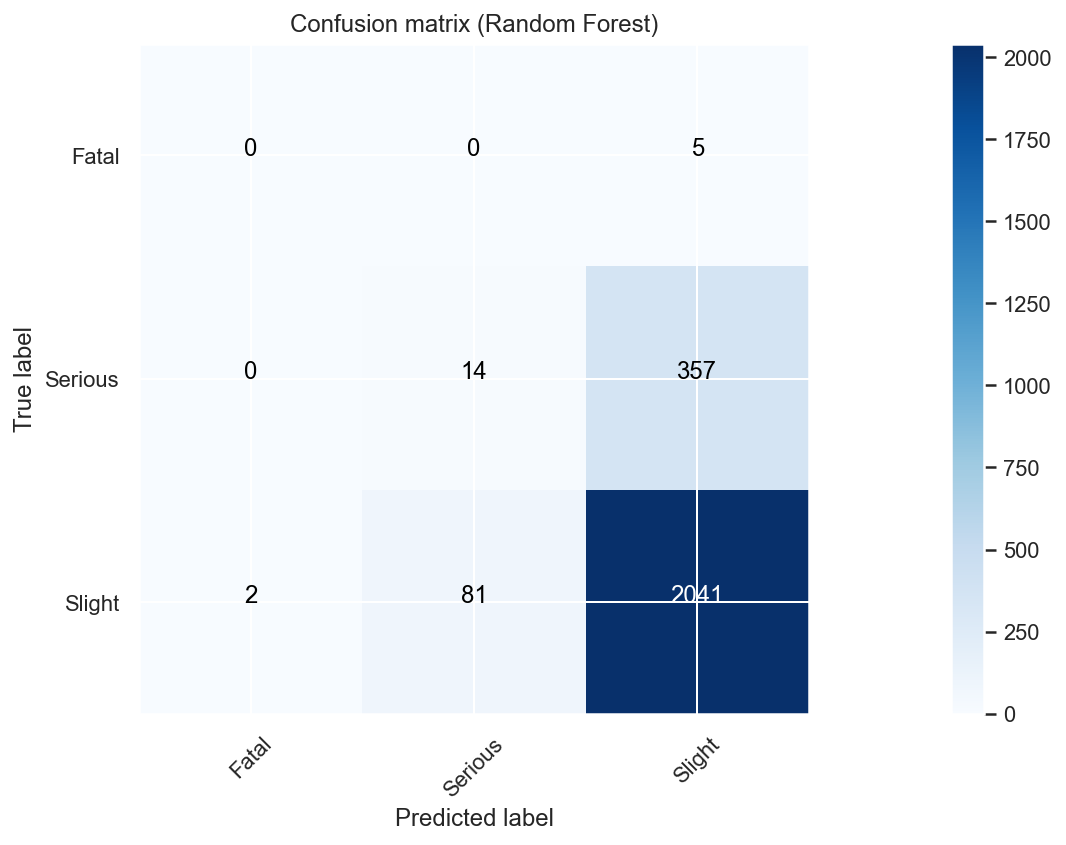

In [168]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_validation, y_pred_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fatal', 'Serious', 'Slight'],normalize=False,
                      title='Confusion matrix (Random Forest)')

Confusion matrix, without normalization
[[   0    0    5]
 [   0    0  371]
 [   0    0 2124]]


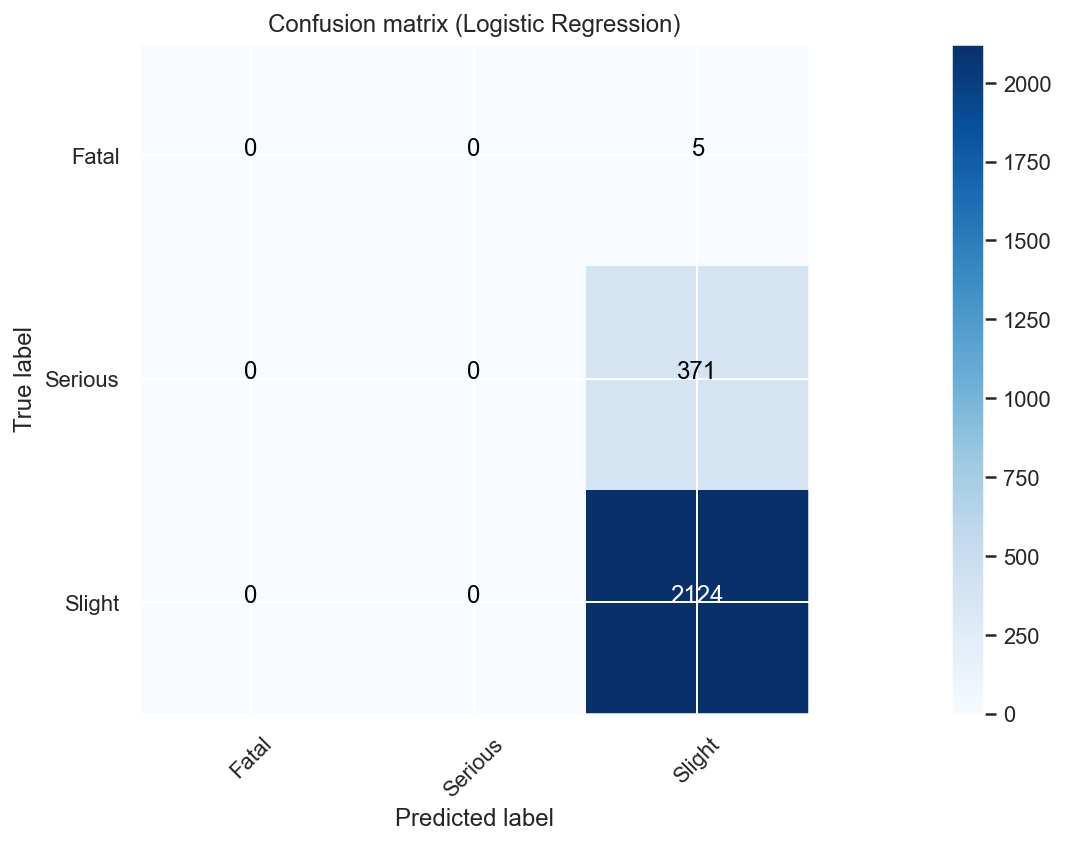

In [169]:
dt_obj = LogisticRegression()
dt_obj.fit(xfeatures,ytarget)
y_pred_lr = dt_obj.predict(X_validation)

cnf_matrix = confusion_matrix(y_validation, y_pred_lr)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fatal', 'Serious', 'Slight'],normalize=False,
                      title='Confusion matrix (Logistic Regression)')

Confusion matrix, without normalization
[[   0    0    5]
 [   0    2  369]
 [   0   16 2108]]


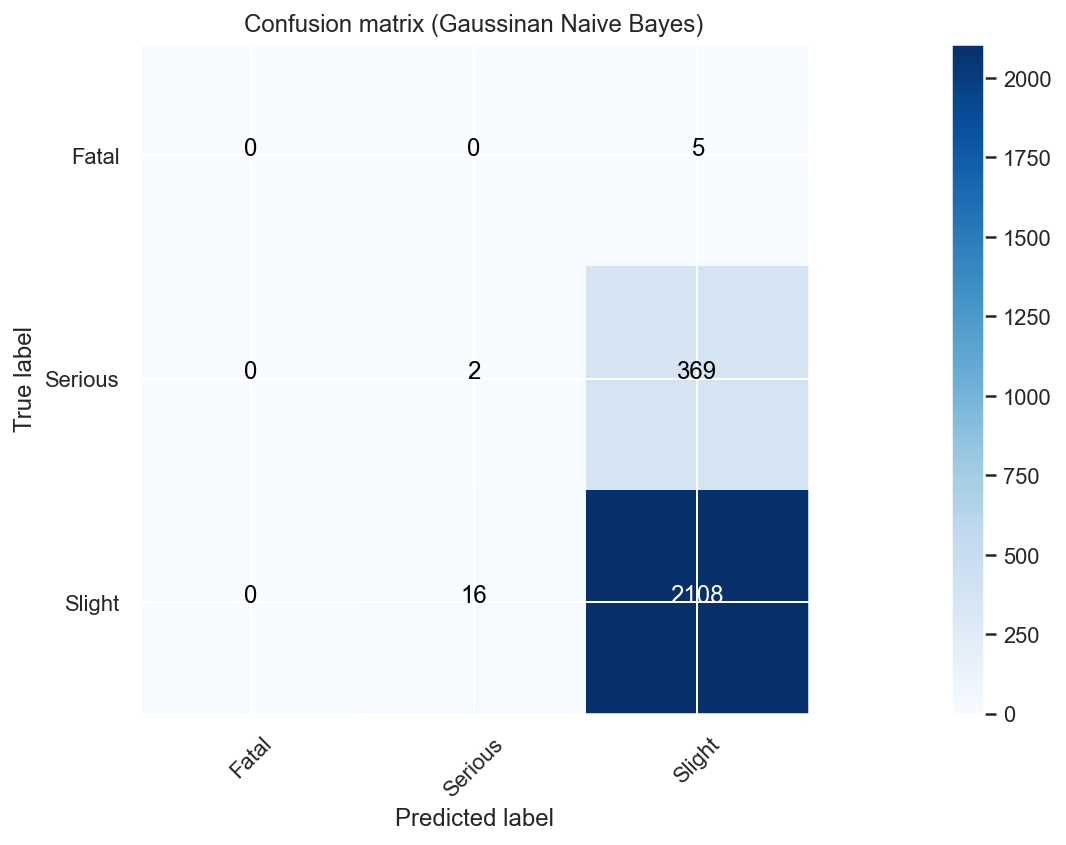

In [170]:
dt_obj = GaussianNB()
dt_obj.fit(xfeatures,ytarget)
y_pred_GB = dt_obj.predict(X_validation)

cnf_matrix = confusion_matrix(y_validation, y_pred_GB)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fatal', 'Serious', 'Slight'],normalize=False,
                      title='Confusion matrix (Gaussinan Naive Bayes)')

Confusion matrix, without normalization
[[   0    0    5]
 [   0   15  356]
 [   0   62 2062]]


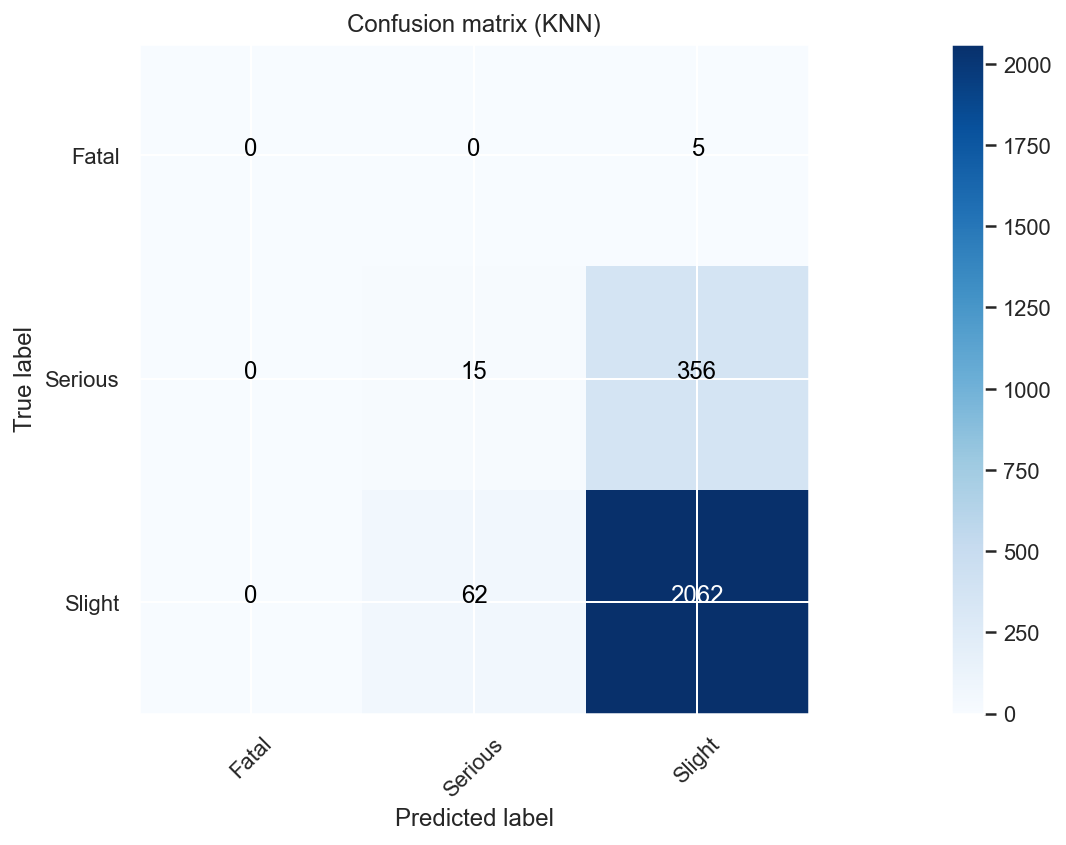

In [171]:
dt_obj = KNeighborsClassifier()
dt_obj.fit(xfeatures,ytarget)
y_pred_KNN = dt_obj.predict(X_validation)

cnf_matrix = confusion_matrix(y_validation, y_pred_KNN)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fatal', 'Serious', 'Slight'],normalize=False,
                      title='Confusion matrix (KNN)')

In [172]:
plot_df = pd.DataFrame(list(zip(names, bar_details)),
               columns =['Model_Name', 'Accuracy'])

<AxesSubplot:xlabel='Model_Name', ylabel='Accuracy'>

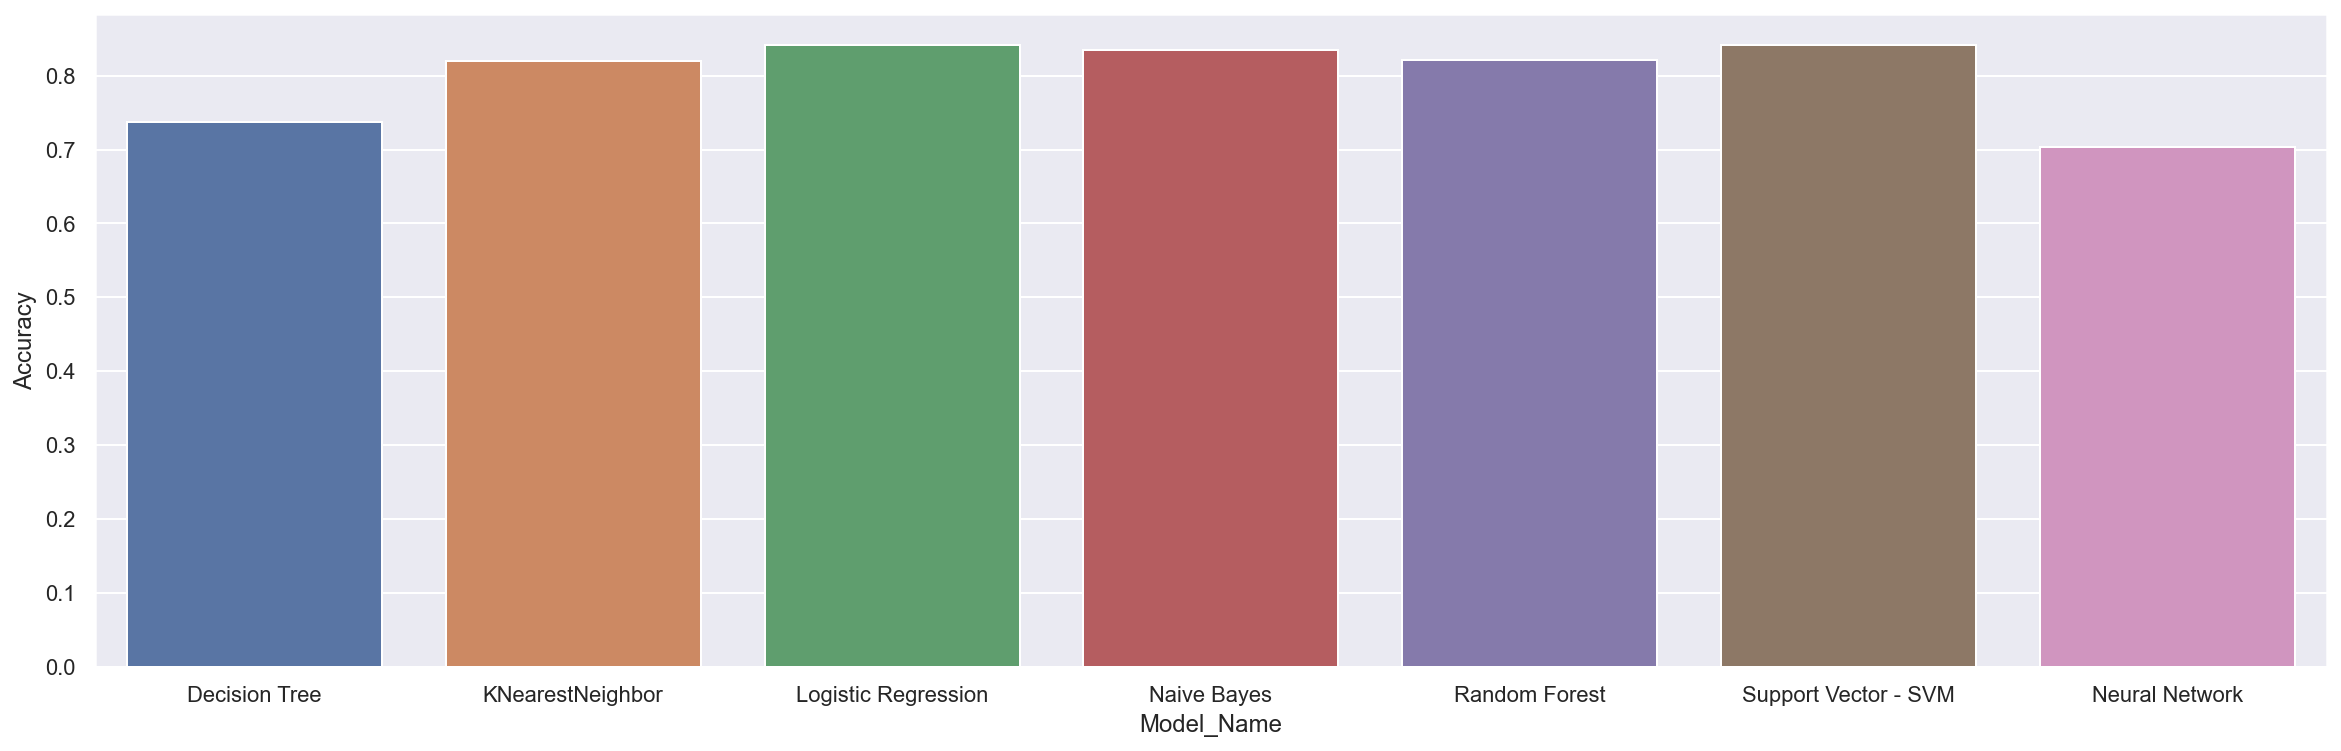

In [173]:
plt.figure(figsize=(20,6))
sns.barplot(data=plot_df,x='Model_Name', y='Accuracy')

In [174]:
clf = DecisionTreeClassifier()
clf.fit(xfeatures, ytarget)
probabilities = clf.predict_proba(X_validation) 
print("Probabilities given by Decision Tree::")
print(probabilities)

Probabilities given by Decision Tree::
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [175]:
print('Defining Stacking Classifier')
from sklearn.ensemble import StackingClassifier

def get_stacking():
    level0 = list()
    level0.append(('dtree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))
    
    level0.append(('RF', RandomForestClassifier()))
    level0.append(('svm', svm.SVC()  ))
    level0.append(('NN', MLPClassifier()))
    
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


Defining Stacking Classifier


In [176]:
stackling = get_stacking()

In [177]:
stacking_accuracy = stackling.fit(xfeatures,ytarget).score(X_validation,y_validation)

print('After applying stacking using LR as Base Classifier it gives::', 
      stacking_accuracy*100)

After applying stacking using LR as Base Classifier it gives:: 84.76


In [178]:
stack = 'Stacked Model'
stack_accuracy = stacking_accuracy
plot_df.loc[len(plot_df.index)] = [stack, stack_accuracy] 

<AxesSubplot:xlabel='Model_Name', ylabel='Accuracy'>

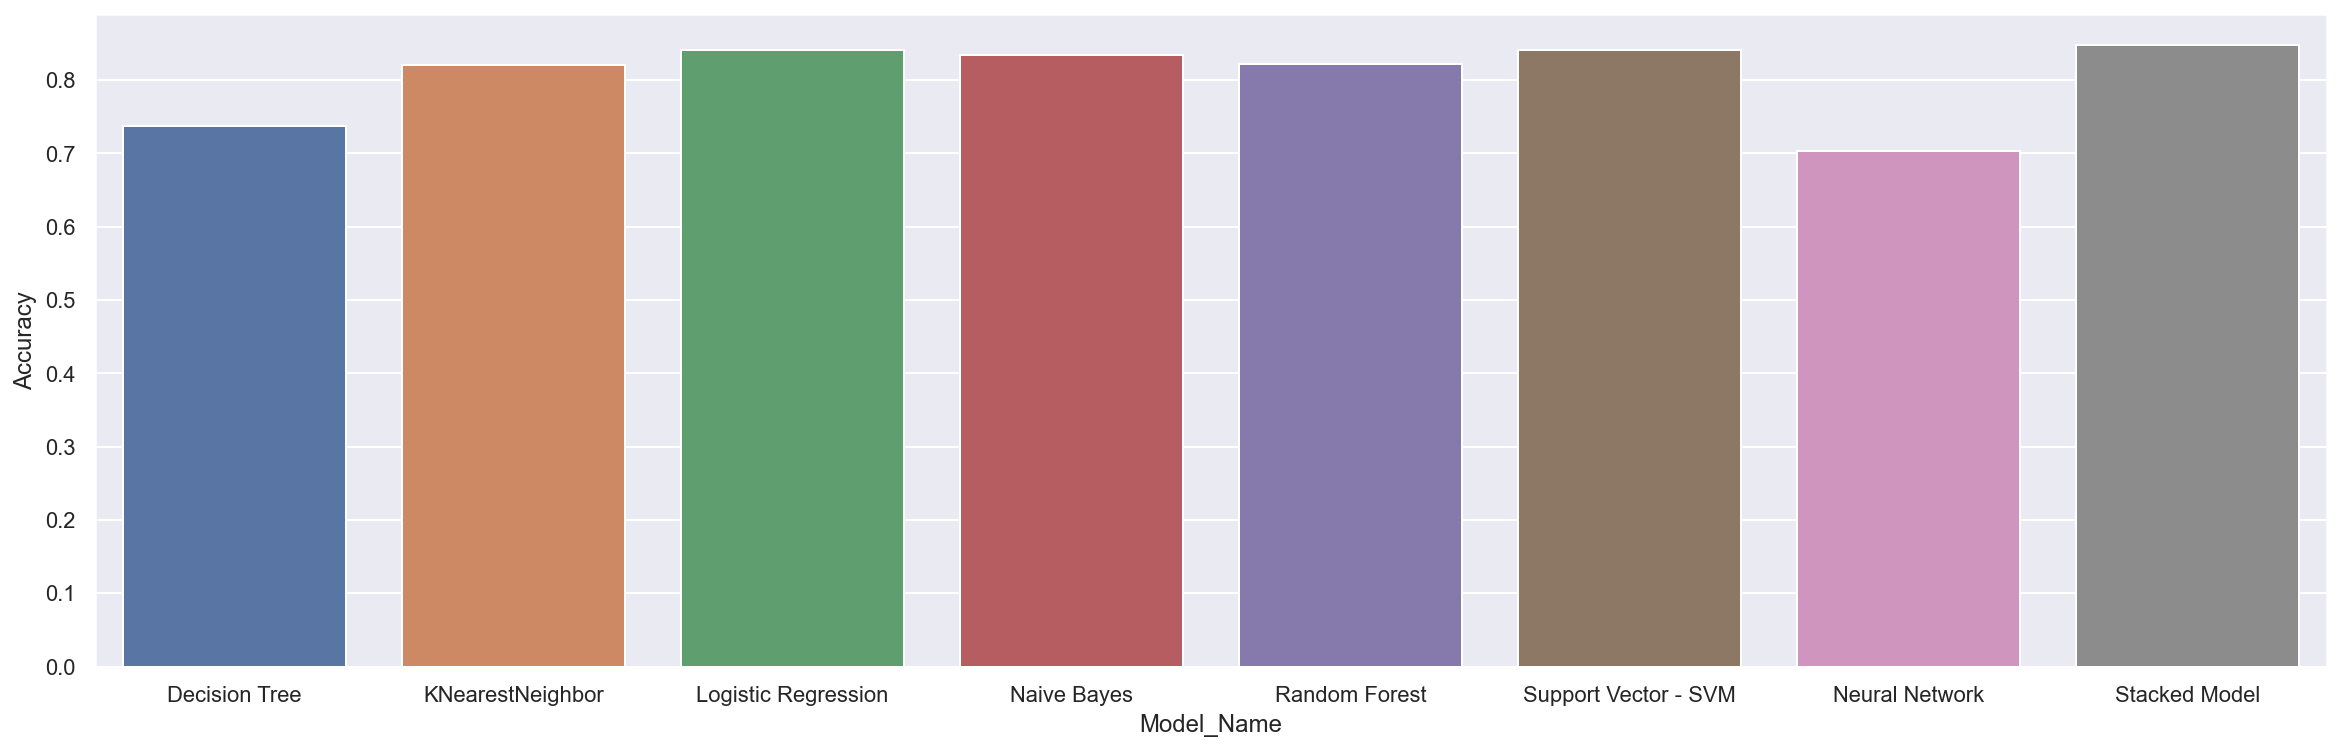

In [179]:
plt.figure(figsize=(20,6))
sns.barplot(data=plot_df,x='Model_Name', y='Accuracy')